### 경사하강법 (Gradient descent)
- 함수의 최솟값을 찾는 알고리즘
- 임의의 위치에서 함수의 기울기를 구한 후, 현재 위치에서 기울기를 빼면 위치가 함수의 최솟값이 있는 방향으로 이동. 이 과정을 반복
- 신경망의 출력과 정답으로 주어진 라벨 간의 차이를 줄여야함, 이 차이를 '신경망의 에러'
- 출력 영향을 주는 것은 학습 데이터 세트의 특성과 신경망의 가중치
- 가중치를 조절하여 신경망의 출력이 기대하는 라벨과 같아지도록 해야함
- 경사하강법을 사용하면 에러가 최소화 되도록 가중치 조정할 수 있음
![비용함수](./비용함수.jpeg)
- 경사 하강법을 사용하여 에러가 최소화되는 방향으로 가중치 W를 조정하기 위해 비용함수의 기울기 사용
- 현재 가중치 값이 가리키는 위치에서 기울기를 구하여 현재 가중치 값에서 기울기를 빼주면 에러가 최소화되는 방향으로 가중치 값이 조정
- 이 과정을 반복하여 최솟값으로 이동
- 반복시 가중치 W를 업데이트. $W_i$는 가중치의 현재 위치고 $W_{i+1}$ 은 다음에 이동하게 되는 가중치 위치
- $\triangledown{error}$ 는 $W_{i}$ 에서 비용함수 기울기, a는 학습률(learning rate)로 한번에 이동하는 거리
$$
W_{i+1} = W_i - {a}\triangledown{error}
$$
- 학습률은(lr) 반복할 때마다 구하게 되는 기울기 값을 얼마만큼 사용하여 다음위치로 이동할지 결정
- a값에 따라 비용함수의 최솟값을 찾는데 걸리는 횟수가 달라짐
- a 값이 너무 크면 빨리 최솟값까지 도달할수 있는 방면 이동거리가 크기 때문에 최소점에 도달하지 못하고 그래프의 양측면을 왔다갔다 할수 있음
- 너무 작으면 도달하는데 걸리는 횟수가 증가

0/1000, x=-10.000000, f(x)=205.000000, gradient=-0.300000,gradient sign=-
50/1000, x=-0.462545, f(x)=9.839400, gradient=-0.109251,gradient sign=-
100/1000, x=3.010707, f(x)=-16.042712, gradient=-0.039786,gradient sign=-
150/1000, x=4.275560, f(x)=-19.475186, gradient=-0.014489,gradient sign=-
200/1000, x=4.736181, f(x)=-19.930399, gradient=-0.005276,gradient sign=-
250/1000, x=4.903925, f(x)=-19.990770, gradient=-0.001921,gradient sign=-
300/1000, x=4.965012, f(x)=-19.998776, gradient=-0.000700,gradient sign=-
350/1000, x=4.987259, f(x)=-19.999838, gradient=-0.000255,gradient sign=-
400/1000, x=4.995360, f(x)=-19.999978, gradient=-0.000093,gradient sign=-
450/1000, x=4.998310, f(x)=-19.999997, gradient=-0.000034,gradient sign=-
500/1000, x=4.999385, f(x)=-20.000000, gradient=-0.000012,gradient sign=-
함수의 최솟값은 x = 4.99950726213442일 떄 입니다.


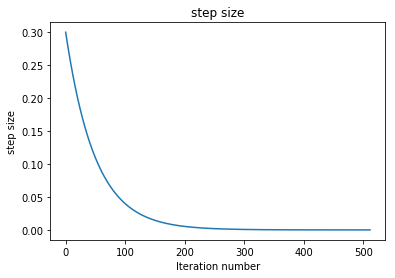

0/1000, x=10.000000, f(x)=5.000000, gradient=0.100000,gradient sign=+
50/1000, x=6.820848, f(x)=-16.684511, gradient=0.036417,gradient sign=+
100/1000, x=5.663098, f(x)=-19.560301, gradient=0.013262,gradient sign=+
150/1000, x=5.241480, f(x)=-19.941687, gradient=0.004830,gradient sign=+
200/1000, x=5.087940, f(x)=-19.992267, gradient=0.001759,gradient sign=+
250/1000, x=5.032025, f(x)=-19.998974, gradient=0.000640,gradient sign=+
300/1000, x=5.011663, f(x)=-19.999864, gradient=0.000233,gradient sign=+
350/1000, x=5.004247, f(x)=-19.999982, gradient=0.000085,gradient sign=+
400/1000, x=5.001547, f(x)=-19.999998, gradient=0.000031,gradient sign=+
450/1000, x=5.000563, f(x)=-20.000000, gradient=0.000011,gradient sign=+
함수의 최솟값은 x = 5.000498954013208일 떄 입니다.


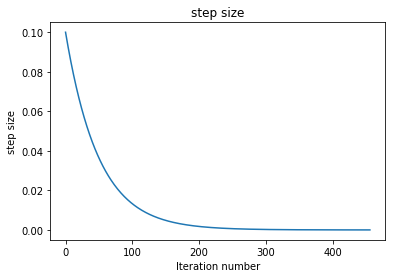

In [5]:
# 경가하강법을 이용하여 최솟값 구함
import matplotlib.pyplot as plt
import numpy as np

# 최솟값을 구할 2차 함수
def f(x):
    return np.power(x-5, 2)-20

# 주어진 2차 함수의 1차 도함수
def f_derivative(x):
    return 2*x-10

# 경사 하강법을 구현한 함수
def gradient_descent(next_x, gamma, precision, max_iteration):
    # 반복할 때마다 이동한 거리의 변화 추이를 살펴보기위해 리스트 저장
    list_step=[]
    
    # 주어진 함수의 최솟값을 찾기위해 최대 max_iteration 만큼 반복
    for i in range(max_iteration):
        
        # 현재위치에서 기울기를 뺀 위치를 업데이트
        # 계산된 위치는 다음 번 반복 시 현재 위치로 사용
        current_x = next_x
        next_x = current_x-gamma*f_derivative(current_x)
        
        # 현재 위치에서 다음 위치까지 이동하는 거리(x좌표 기준)를 측정하여 리스트에 저장
        step=next_x-current_x
        list_step.append(abs(step))
        
        # 50번 반복할 때마다 로그 출력
        if i % 50 == 0:
            print('{}/{}, x={:5.6f}, '.format(i, max_iteration, current_x), end='')
            gradient = gamma*f_derivative(current_x)
            print('f(x)={:5.6f}, gradient={:5.6f},'.format(f(current_x), gradient), end='')
            print('gradient sign={}'.format('+' if f_derivative(current_x) > 0 else '-'))
            
        # 지정한 값보다 이동한 거리가 작아지면 루프를 중지
        if abs(step) <= precision:
            break
    
    # 최종적으로 구한 최솟값 위치에 있는 x 좌표
    print('함수의 최솟값은 x = {}일 떄 입니다.'.format(current_x))
    
    # 이동 거리의 변화 추이를 그래프로 그림
    Figure, ax = plt.subplots(1, 1)
    
    ax.title.set_text('step size')
    ax.plot(list_step)
    ax.set_ylabel('step size')
    ax.set_xlabel('Iteration number')
    
    plt.show()
    
# 시작 위치가 음수인 경우 경사 하강법 수행
gradient_descent(next_x=-10, gamma=0.01, precision=0.00001, max_iteration=1000)

# 시작 위치가 양수인 경우 경사 하강법 수행
gradient_descent(next_x=10, gamma=0.01, precision=0.00001, max_iteration=1000)

### 역전파 알고리즘
- 학습데이터 세트 특성이 산경망의 입력으로 주어질 때 신경망의 출력으로 학습 데이터 세트의 라벨이 출력
- 이때 학습데이터 세트의 특성과 노드간 부여되는 가중치
- 특성은 입력으로 사용, 출력에 영향을 주려면 가중치를 조정

- 가중치 조정을 위해 역전파알고리즘 사용
- 출력 값과 기대하는 출력라벨의 차이를 에러로 보고 역전파 알고리즘으로 신경망의 모든 노드의 에러 측정하여 가중치를 다시 계산
- 이 과정을 반복하면서 가중치는 최적화, 신경망의 에러는 작아짐, 정확도가 향상
- 신경망의 입력으로 다음처럼 m개의 샘플로 구성된 학습 데이터 세트가 주어질 때 역전파 알고리즘을 사용하여 신경망을 학습시키는 방법을 설명
$$
\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), ... (x^{(m)}, y^{(m)}) \}
$$
- 하나의 샘플 (x, y)에 대한 신경망의 비용함수는 다음과 같이 정의
$$
J(W,b;x,y) = \frac{1}{2}||y-h_{W,b}(x)||^2
$$
- m 개의 샘플로 구성된 학습 데이터 세트에 대한 신경망의 비용 함수는 다음과 같음
$$
J(W,b) = \frac{1}{m}\sum_{i=1}^mJ(W,b;x^{(i)},y^{(i)}) = \frac{1}{m}\sum_{i=1}^m(\frac{1}{2}||y-h_{W,b}(x)||^2)
$$
- 비용함수 $J(W,b)$를 최소화하도록 신경망의 파라미터인 가중치 W와 b를 조정하여 신경망을 학습시키는게 목표
- 역전파 알고리즘이 한번 수행될 때마다 신경망의 W와 b 파라미터가 다음과 같이 업데이트
$$
W_{ij}^{(l)} = W_{ij}^{(l)} - \alpha\frac{\partial}{\partial W_{ij}^{(l)}}J(W,b)
$$

$$
b_{i}^{(l)} = b_{i}^{(l)} - \alpha\frac{\partial}{\partial b_{i}^{(l)}}J(W,b)
$$
- 여기서 $\alpha$ 는 학습률 
- $\frac{\partial}{\partial W_{ij}^{(l)}}J(W,b)$ 와 $\frac{\partial}{\partial b_{i}^{(l)}}J(W,b)$ 는 가중치 W, b에 관한 비용 함수의 편미분. 레이어 l의 각 노드가 신경망 출력의 에러에 얼마나 영향을 주는지 측정
$$
\frac{\partial}{\partial W_{ij}^{(l)}}J(W,b) = \frac{1}{m}\sum_{i=1}^m\frac{\partial}{\partial W_{ij}^{(l)}}(W,b;x^{(i)},y^{(i)}) 
$$

$$
\frac{\partial}{\partial b_{i}^{(l)}}J(W,b) = \frac{1}{m}\sum_{i=1}^m\frac{\partial}{\partial b_{i}^{(l)}}(W,b;x^{(i)},y^{(i)}) 
$$

- 역전파 알고리즘은 다음 단계를 거쳐 실행
    - 1) 피드포워드를 실행하여 히든 레이어인 두번째 레이어 $L_2$ 부터 출력 레이어 $L_{nl}$ 까지 (여기서는 $L_3$) 모든 노드 출력을 계산


$$
z_1^{(2)} = W_{11}^{(1)}x_1 + W_{12}^{(1)}x_2 + W_{13}^{(1)}x_3 + b_1^{(1)}
$$

$$
a_1^{(2)} = f(z_1^{(2)})
$$
    
    
$$
z_2^{(2)} = W_{21}^{(1)}x_1 + W_{22}^{(1)}x_2 + W_{23}^{(1)}x_3 + b_2^{(1)}
$$

$$
a_2^{(2)} = f(z_2^{(2)})
$$

$$
z_3^{(2)} = W_{31}^{(1)}x_1 + W_{32}^{(1)}x_2 + W_{33}^{(1)}x_3 + b_3^{(1)}
$$

$$
a_3^{(2)} = f(z_3^{(2)})
$$


$$
z_1^{(3)} = W_{11}^{(2)}a_1^{(2)} + W_{12}^{(2)}a_2^{(2)} + W_{13}^{(2)}a_3^{(2)} + b_1^{(2)}
$$

$$
h_{w,b}(x) = a_1^{(3)} = f(z_1^{(3)})
$$

- 
    - 2) l번째 레이어의 i번째 노드에 대한 에러항을 구함. 각 노드가 전체 신경망의 에러에 영향을 준 양을 측정. 출력 레이어인 경우, 히든 레이어인 경우 구분
        - 2-1) 출력 레이어 ${L_l}$의 i번째 노드에 대한 $\delta_{i}^{(n_l)}$를 구함. 신경망의 출력 $h_{W,b}(x)$ 와 학습 데이터 라벨 y 간의 차이를 측정
$$
\delta_{i}^{(n_l)} = \frac{\partial}{\partial z_{i}^{(n_l)}}J(W,b;x,y) 
= \frac{\partial}{\partial z_{i}^{(n_l)}}\frac{1}{2}||y-h_{w,b}(x)||^2 - (y_i - a_i^{(n_l)})f'(z_i^{(n_l)})
$$

$$
(계산 과정)
$$

$$
\delta_{i}^{(n_l)} = \frac{\partial}{\partial z_{i}^{(n_l)}}(\frac{1}{2}||y-h_{w,b}(x)||^2)
$$

- 
    - 
        - 2-2) 히든 레이어 $L_l$의 i번째 노드에 대해 $\delta_{i}^{(l)}$를 구합니다 (l=nl-1,...n,2). l번째 레이어의 i번째 노드의 출력 $a_i^{(l)}$을 입력으로 사용하는 노드의 오차항의 가중치 평균에 기반하여 $\delta_{i}^{(l)}$를 구합니다

$$
\delta_{i}^{(l)} = \frac{\partial}{\partial z_i^{(l)}}J(W,b;x,y)=(\sum_{j=1}^{S_l+1}W_{ji}^{(l)}\delta_j^{(l+1)})f'(z_i^{(l)})
$$
- 
    - 3) 비용 함수에 대한 편미분을 구합니다. 미분의 연쇄법칙(chain rule)을 사용

[-0.02728535]
[[-0.02728535]]
[0.11966729]
[[0.11966729]]
[0.11691886]
[[0.11691886]]
[0.11811785]
[[0.11811785]]
[-0.02674717]
[[-0.02674717]]
[-0.02253752]
[[-0.02253752]]
0/10000 cost: 0.4298802064090659
[-0.03772505]
[[-0.03772505]]
[0.13231951]
[[0.13231951]]
[0.13067166]
[[0.13067166]]
[0.13131685]
[[0.13131685]]
[-0.0370165]
[[-0.0370165]]
[-0.03309574]
[[-0.03309574]]
[-0.05116757]
[[-0.05116757]]
[0.14227447]
[[0.14227447]]
[0.14163413]
[[0.14163413]]
[0.14181142]
[[0.14181142]]
[-0.05027816]
[[-0.05027816]]
[-0.04744908]
[[-0.04744908]]
[-0.06659507]
[[-0.06659507]]
[0.14751065]
[[0.14751065]]
[0.14744544]
[[0.14744544]]
[0.14741937]
[[0.14741937]]
[-0.06555206]
[[-0.06555206]]
[-0.0646212]
[[-0.0646212]]
[-0.0818351]
[[-0.0818351]]
[0.14764092]
[[0.14764092]]
[0.14756997]
[[0.14756997]]
[0.14766328]
[[0.14766328]]
[-0.08069909]
[[-0.08069909]]
[-0.08199333]
[[-0.08199333]]
[-0.09473441]
[[-0.09473441]]
[0.1443186]
[[0.1443186]]
[0.14383137]
[[0.14383137]]
[0.14425038]
[[0.14

[0.11955864]
[[0.11955864]]
[0.12358202]
[[0.12358202]]
[-0.1215658]
[[-0.1215658]]
[-0.13113629]
[[-0.13113629]]
[-0.12394012]
[[-0.12394012]]
[0.12305054]
[[0.12305054]]
[0.11951965]
[[0.11951965]]
[0.12359167]
[[0.12359167]]
[-0.12152705]
[[-0.12152705]]
[-0.13116525]
[[-0.13116525]]
[-0.12393372]
[[-0.12393372]]
[0.12302594]
[[0.12302594]]
[0.11948033]
[[0.11948033]]
[0.12360154]
[[0.12360154]]
[-0.12148788]
[[-0.12148788]]
[-0.13119435]
[[-0.13119435]]
[-0.1239273]
[[-0.1239273]]
[0.12300108]
[[0.12300108]]
[0.11944068]
[[0.11944068]]
[0.12361164]
[[0.12361164]]
[-0.12144828]
[[-0.12144828]]
[-0.13122357]
[[-0.13122357]]
[-0.12392086]
[[-0.12392086]]
[0.12297596]
[[0.12297596]]
[0.1194007]
[[0.1194007]]
[0.12362197]
[[0.12362197]]
[-0.12140823]
[[-0.12140823]]
[-0.13125292]
[[-0.13125292]]
[-0.12391442]
[[-0.12391442]]
[0.12295058]
[[0.12295058]]
[0.11936039]
[[0.11936039]]
[0.12363253]
[[0.12363253]]
[-0.12136774]
[[-0.12136774]]
[-0.13128241]
[[-0.13128241]]
[-0.12390797]
[[-0.1

[0.1251292]
[[0.1251292]]
[-0.11722015]
[[-0.11722015]]
[-0.13361649]
[[-0.13361649]]
[-0.12345062]
[[-0.12345062]]
[0.12036436]
[[0.12036436]]
[0.11553018]
[[0.11553018]]
[0.12516673]
[[0.12516673]]
[-0.11713265]
[[-0.11713265]]
[-0.13365574]
[[-0.13365574]]
[-0.12344373]
[[-0.12344373]]
[0.12031142]
[[0.12031142]]
[0.11545549]
[[0.11545549]]
[0.12520485]
[[0.12520485]]
[-0.11704418]
[[-0.11704418]]
[-0.13369512]
[[-0.13369512]]
[-0.12343684]
[[-0.12343684]]
[0.12025794]
[[0.12025794]]
[0.11538012]
[[0.11538012]]
[0.12524355]
[[0.12524355]]
[-0.11695475]
[[-0.11695475]]
[-0.13373464]
[[-0.13373464]]
[-0.12342994]
[[-0.12342994]]
[0.12020389]
[[0.12020389]]
[0.11530408]
[[0.11530408]]
[0.12528286]
[[0.12528286]]
[-0.11686433]
[[-0.11686433]]
[-0.13377429]
[[-0.13377429]]
[-0.12342303]
[[-0.12342303]]
[0.12014929]
[[0.12014929]]
[0.11522734]
[[0.11522734]]
[0.12532278]
[[0.12532278]]
[-0.11677293]
[[-0.11677293]]
[-0.13381407]
[[-0.13381407]]
[-0.12341612]
[[-0.12341612]]
[0.12009412]
[

[-0.1098365]
[[-0.1098365]]
[-0.13617369]
[[-0.13617369]]
[-0.12298774]
[[-0.12298774]]
[0.11593407]
[[0.11593407]]
[0.10953235]
[[0.10953235]]
[0.12881749]
[[0.12881749]]
[-0.10967707]
[[-0.10967707]]
[-0.13621594]
[[-0.13621594]]
[-0.12297817]
[[-0.12297817]]
[0.11583768]
[[0.11583768]]
[0.10940645]
[[0.10940645]]
[0.12890374]
[[0.12890374]]
[-0.10951634]
[[-0.10951634]]
[-0.13625808]
[[-0.13625808]]
[-0.12296847]
[[-0.12296847]]
[0.11574041]
[[0.11574041]]
[0.10927958]
[[0.10927958]]
[0.12899097]
[[0.12899097]]
[-0.10935432]
[[-0.10935432]]
[-0.13630009]
[[-0.13630009]]
[-0.12295862]
[[-0.12295862]]
[0.11564224]
[[0.11564224]]
[0.10915174]
[[0.10915174]]
[0.12907916]
[[0.12907916]]
[-0.10919101]
[[-0.10919101]]
[-0.13634197]
[[-0.13634197]]
[-0.12294862]
[[-0.12294862]]
[0.11554319]
[[0.11554319]]
[0.10902293]
[[0.10902293]]
[0.12916832]
[[0.12916832]]
[-0.10902641]
[[-0.10902641]]
[-0.1363837]
[[-0.1363837]]
[-0.12293847]
[[-0.12293847]]
[0.11544324]
[[0.11544324]]
[0.10889314]
[[0

[-0.12187048]
[[-0.12187048]]
[0.10832203]
[[0.10832203]]
[0.10023557]
[[0.10023557]]
[0.13578135]
[[0.13578135]]
[-0.09799593]
[[-0.09799593]]
[-0.13804893]
[[-0.13804893]]
[-0.12183449]
[[-0.12183449]]
[0.1081558]
[[0.1081558]]
[0.10005068]
[[0.10005068]]
[0.1359283]
[[0.1359283]]
[-0.09777357]
[[-0.09777357]]
[-0.13805419]
[[-0.13805419]]
[-0.12179753]
[[-0.12179753]]
[0.10798782]
[[0.10798782]]
[0.09986483]
[[0.09986483]]
[0.13607619]
[[0.13607619]]
[-0.09755064]
[[-0.09755064]]
[-0.1380579]
[[-0.1380579]]
[-0.12175957]
[[-0.12175957]]
[0.10781804]
[[0.10781804]]
[0.099678]
[[0.099678]]
[0.136225]
[[0.136225]]
[-0.09732716]
[[-0.09732716]]
[-0.13806001]
[[-0.13806001]]
[-0.12172059]
[[-0.12172059]]
[0.10764642]
[[0.10764642]]
[0.0994902]
[[0.0994902]]
[0.13637473]
[[0.13637473]]
[-0.09710316]
[[-0.09710316]]
[-0.13806045]
[[-0.13806045]]
[-0.12168057]
[[-0.12168057]]
[0.10747293]
[[0.10747293]]
[0.09930142]
[[0.09930142]]
[0.13652536]
[[0.13652536]]
[-0.09687865]
[[-0.09687865]]
[-

[-0.08409969]
[[-0.08409969]]
[-0.13189004]
[[-0.13189004]]
[-0.11613823]
[[-0.11613823]]
[0.0911121]
[[0.0911121]]
[0.08663911]
[[0.08663911]]
[0.1453657]
[[0.1453657]]
[-0.08390877]
[[-0.08390877]]
[-0.13163417]
[[-0.13163417]]
[-0.11597153]
[[-0.11597153]]
[0.09067038]
[[0.09067038]]
[0.08640808]
[[0.08640808]]
[0.14546871]
[[0.14546871]]
[-0.08371941]
[[-0.08371941]]
[-0.13137413]
[[-0.13137413]]
[-0.11580223]
[[-0.11580223]]
[0.09022183]
[[0.09022183]]
[0.086177]
[[0.086177]]
[0.14556884]
[[0.14556884]]
[-0.08353155]
[[-0.08353155]]
[-0.13111017]
[[-0.13111017]]
[-0.11563034]
[[-0.11563034]]
[0.08976652]
[[0.08976652]]
[0.08594589]
[[0.08594589]]
[0.14566608]
[[0.14566608]]
[-0.08334514]
[[-0.08334514]]
[-0.13084258]
[[-0.13084258]]
[-0.11545589]
[[-0.11545589]]
[0.08930451]
[[0.08930451]]
[0.08571477]
[[0.08571477]]
[0.14576046]
[[0.14576046]]
[-0.08316011]
[[-0.08316011]]
[-0.13057162]
[[-0.13057162]]
[-0.11527888]
[[-0.11527888]]
[0.0888359]
[[0.0888359]]
[0.08548365]
[[0.08548

[-0.11381993]
[[-0.11381993]]
[-0.10012173]
[[-0.10012173]]
[0.05431042]
[[0.05431042]]
[0.07086507]
[[0.07086507]]
[0.148144]
[[0.148144]]
[-0.07048271]
[[-0.07048271]]
[-0.11356941]
[[-0.11356941]]
[-0.09983423]
[[-0.09983423]]
[0.05377641]
[[0.05377641]]
[0.0706132]
[[0.0706132]]
[0.1481463]
[[0.1481463]]
[-0.07024562]
[[-0.07024562]]
[-0.1133191]
[[-0.1133191]]
[-0.09954648]
[[-0.09954648]]
[0.05324562]
[[0.05324562]]
[0.07036069]
[[0.07036069]]
[0.14814768]
[[0.14814768]]
[-0.07000819]
[[-0.07000819]]
[-0.11306899]
[[-0.11306899]]
[-0.09925851]
[[-0.09925851]]
[0.0527181]
[[0.0527181]]
[0.07010754]
[[0.07010754]]
[0.14814815]
[[0.14814815]]
[-0.0697705]
[[-0.0697705]]
[-0.11281909]
[[-0.11281909]]
[-0.09897038]
[[-0.09897038]]
[0.05219391]
[[0.05219391]]
[0.06985378]
[[0.06985378]]
[0.1481477]
[[0.1481477]]
[-0.06953261]
[[-0.06953261]]
[-0.11256938]
[[-0.11256938]]
400/10000 cost: 0.3482790741670857
[-0.09868215]
[[-0.09868215]]
[0.05167313]
[[0.05167313]]
[0.0695994]
[[0.0695994

[-0.09974894]
[[-0.09974894]]
[-0.08407719]
[[-0.08407719]]
[0.02934174]
[[0.02934174]]
[0.05560816]
[[0.05560816]]
[0.14704202]
[[0.14704202]]
[-0.05757989]
[[-0.05757989]]
[-0.09953295]
[[-0.09953295]]
[-0.08383839]
[[-0.08383839]]
[0.02903544]
[[0.02903544]]
[0.05535707]
[[0.05535707]]
[0.14701003]
[[0.14701003]]
[-0.05739968]
[[-0.05739968]]
[-0.09931804]
[[-0.09931804]]
[-0.08360102]
[[-0.08360102]]
[0.02873268]
[[0.02873268]]
[0.05510668]
[[0.05510668]]
[0.14697791]
[[0.14697791]]
[-0.05722108]
[[-0.05722108]]
[-0.09910423]
[[-0.09910423]]
[-0.08336509]
[[-0.08336509]]
[0.02843344]
[[0.02843344]]
[0.05485701]
[[0.05485701]]
[0.14694567]
[[0.14694567]]
[-0.05704407]
[[-0.05704407]]
[-0.09889153]
[[-0.09889153]]
[-0.0831306]
[[-0.0831306]]
[0.02813768]
[[0.02813768]]
[0.05460809]
[[0.05460809]]
[0.14691332]
[[0.14691332]]
[-0.05686868]
[[-0.05686868]]
[-0.09867995]
[[-0.09867995]]
[-0.08289755]
[[-0.08289755]]
[0.02784537]
[[0.02784537]]
[0.05435993]
[[0.05435993]]
[0.14688088]
[[0

[-0.04982915]
[[-0.04982915]]
[-0.08936381]
[[-0.08936381]]
[-0.07273459]
[[-0.07273459]]
[0.01661518]
[[0.01661518]]
[0.04277361]
[[0.04277361]]
[0.14530496]
[[0.14530496]]
[-0.0497296]
[[-0.0497296]]
[-0.08921772]
[[-0.08921772]]
[-0.07257438]
[[-0.07257438]]
[0.01646111]
[[0.01646111]]
[0.04257902]
[[0.04257902]]
[0.1452799]
[[0.1452799]]
[-0.04963121]
[[-0.04963121]]
[-0.08907285]
[[-0.08907285]]
[-0.07241538]
[[-0.07241538]]
[0.01630887]
[[0.01630887]]
[0.04238553]
[[0.04238553]]
[0.14525511]
[[0.14525511]]
[-0.04953397]
[[-0.04953397]]
[-0.08892917]
[[-0.08892917]]
[-0.07225756]
[[-0.07225756]]
[0.01615846]
[[0.01615846]]
[0.04219314]
[[0.04219314]]
[0.14523059]
[[0.14523059]]
[-0.04943786]
[[-0.04943786]]
[-0.0887867]
[[-0.0887867]]
[-0.07210092]
[[-0.07210092]]
[0.01600984]
[[0.01600984]]
[0.04200185]
[[0.04200185]]
[0.14520634]
[[0.14520634]]
[-0.04934289]
[[-0.04934289]]
[-0.08864543]
[[-0.08864543]]
[-0.07194546]
[[-0.07194546]]
[0.01586299]
[[0.01586299]]
[0.04181165]
[[0.0

[0.14425694]
[[0.14425694]]
[-0.04540401]
[[-0.04540401]]
[-0.08229148]
[[-0.08229148]]
[-0.06464744]
[[-0.06464744]]
[0.00971113]
[[0.00971113]]
[0.03253558]
[[0.03253558]]
[0.14424786]
[[0.14424786]]
[-0.04535764]
[[-0.04535764]]
[-0.0822098]
[[-0.0822098]]
[-0.06454648]
[[-0.06454648]]
[0.00963644]
[[0.00963644]]
[0.03240321]
[[0.03240321]]
[0.144239]
[[0.144239]]
[-0.04531184]
[[-0.04531184]]
[-0.08212893]
[[-0.08212893]]
[-0.06444621]
[[-0.06444621]]
[0.00956255]
[[0.00956255]]
[0.03227168]
[[0.03227168]]
[0.14423035]
[[0.14423035]]
[-0.04526659]
[[-0.04526659]]
[-0.08204886]
[[-0.08204886]]
[-0.06434664]
[[-0.06434664]]
[0.00948946]
[[0.00948946]]
[0.03214096]
[[0.03214096]]
[0.14422191]
[[0.14422191]]
[-0.0452219]
[[-0.0452219]]
[-0.0819696]
[[-0.0819696]]
[-0.06424774]
[[-0.06424774]]
[0.00941715]
[[0.00941715]]
[0.03201107]
[[0.03201107]]
[0.14421368]
[[0.14421368]]
[-0.04517775]
[[-0.04517775]]
[-0.08189113]
[[-0.08189113]]
[-0.06414952]
[[-0.06414952]]
[0.00934562]
[[0.00934

[0.00632287]
[[0.00632287]]
[0.0257957]
[[0.0257957]]
[0.14403192]
[[0.14403192]]
[-0.04337424]
[[-0.04337424]]
[-0.07854242]
[[-0.07854242]]
[-0.05947507]
[[-0.05947507]]
[0.00628274]
[[0.00628274]]
[0.02570476]
[[0.02570476]]
[0.1440328]
[[0.1440328]]
[-0.04335232]
[[-0.04335232]]
[-0.07850044]
[[-0.07850044]]
[-0.05940636]
[[-0.05940636]]
[0.00624299]
[[0.00624299]]
[0.02561436]
[[0.02561436]]
[0.14403378]
[[0.14403378]]
[-0.04333065]
[[-0.04333065]]
[-0.07845895]
[[-0.07845895]]
[-0.05933803]
[[-0.05933803]]
[0.00620361]
[[0.00620361]]
[0.02552449]
[[0.02552449]]
[0.14403487]
[[0.14403487]]
[-0.04330923]
[[-0.04330923]]
[-0.07841794]
[[-0.07841794]]
[-0.05927007]
[[-0.05927007]]
[0.00616461]
[[0.00616461]]
[0.02543515]
[[0.02543515]]
[0.14403607]
[[0.14403607]]
[-0.04328806]
[[-0.04328806]]
[-0.07837742]
[[-0.07837742]]
[-0.05920247]
[[-0.05920247]]
[0.00612597]
[[0.00612597]]
[0.02534634]
[[0.02534634]]
[0.14403737]
[[0.14403737]]
[-0.04326714]
[[-0.04326714]]
[-0.07833737]
[[-0.0

[0.02103735]
[[0.02103735]]
[0.14424904]
[[0.14424904]]
[-0.04239085]
[[-0.04239085]]
[-0.07673209]
[[-0.07673209]]
[-0.05579445]
[[-0.05579445]]
[0.00439166]
[[0.00439166]]
[0.02097317]
[[0.02097317]]
[0.14425461]
[[0.14425461]]
[-0.04237974]
[[-0.04237974]]
[-0.07671415]
[[-0.07671415]]
[-0.05574289]
[[-0.05574289]]
[0.00436877]
[[0.00436877]]
[0.02090933]
[[0.02090933]]
[0.14426023]
[[0.14426023]]
[-0.04236873]
[[-0.04236873]]
[-0.07669651]
[[-0.07669651]]
700/10000 cost: 0.2582381622864352
[-0.05569153]
[[-0.05569153]]
[0.00434607]
[[0.00434607]]
[0.02084583]
[[0.02084583]]
[0.1442659]
[[0.1442659]]
[-0.04235784]
[[-0.04235784]]
[-0.07667917]
[[-0.07667917]]
[-0.05564036]
[[-0.05564036]]
[0.00432355]
[[0.00432355]]
[0.02078267]
[[0.02078267]]
[0.14427162]
[[0.14427162]]
[-0.04234705]
[[-0.04234705]]
[-0.07666214]
[[-0.07666214]]
[-0.05558939]
[[-0.05558939]]
[0.00430123]
[[0.00430123]]
[0.02071983]
[[0.02071983]]
[0.14427738]
[[0.14427738]]
[-0.04233637]
[[-0.04233637]]
[-0.0766454

[0.01711112]
[[0.01711112]]
[0.14474922]
[[0.14474922]]
[-0.04179122]
[[-0.04179122]]
[-0.07610895]
[[-0.07610895]]
[-0.05244105]
[[-0.05244105]]
[0.00311951]
[[0.00311951]]
[0.01706637]
[[0.01706637]]
[0.144757]
[[0.144757]]
[-0.04178508]
[[-0.04178508]]
[-0.07610874]
[[-0.07610874]]
[-0.0523996]
[[-0.0523996]]
[0.00310653]
[[0.00310653]]
[0.01702181]
[[0.01702181]]
[0.1447648]
[[0.1447648]]
[-0.04177897]
[[-0.04177897]]
[-0.07610874]
[[-0.07610874]]
[-0.05235823]
[[-0.05235823]]
[0.00309364]
[[0.00309364]]
[0.01697747]
[[0.01697747]]
[0.14477261]
[[0.14477261]]
[-0.0417729]
[[-0.0417729]]
[-0.07610892]
[[-0.07610892]]
[-0.05231695]
[[-0.05231695]]
[0.00308085]
[[0.00308085]]
[0.01693332]
[[0.01693332]]
[0.14478044]
[[0.14478044]]
[-0.04176686]
[[-0.04176686]]
[-0.07610931]
[[-0.07610931]]
[-0.05227577]
[[-0.05227577]]
[0.00306815]
[[0.00306815]]
[0.01688937]
[[0.01688937]]
[0.14478829]
[[0.14478829]]
[-0.04176086]
[[-0.04176086]]
[-0.07610988]
[[-0.07610988]]
[-0.05223467]
[[-0.05223

[-0.05015986]
[[-0.05015986]]
[0.00249958]
[[0.00249958]]
[0.01478185]
[[0.01478185]]
[0.14522972]
[[0.14522972]]
[-0.04147201]
[[-0.04147201]]
[-0.07640239]
[[-0.07640239]]
[-0.05012229]
[[-0.05012229]]
[0.00249092]
[[0.00249092]]
[0.0147472]
[[0.0147472]]
[0.14523812]
[[0.14523812]]
[-0.04146707]
[[-0.04146707]]
[-0.07641227]
[[-0.07641227]]
[-0.05008477]
[[-0.05008477]]
[0.0024823]
[[0.0024823]]
[0.01471269]
[[0.01471269]]
[0.14524654]
[[0.14524654]]
[-0.04146215]
[[-0.04146215]]
[-0.0764223]
[[-0.0764223]]
[-0.05004729]
[[-0.05004729]]
[0.00247375]
[[0.00247375]]
[0.01467832]
[[0.01467832]]
[0.14525496]
[[0.14525496]]
[-0.04145723]
[[-0.04145723]]
[-0.07643249]
[[-0.07643249]]
[-0.05000985]
[[-0.05000985]]
[0.00246525]
[[0.00246525]]
[0.0146441]
[[0.0146441]]
[0.14526339]
[[0.14526339]]
[-0.04145231]
[[-0.04145231]]
[-0.07644282]
[[-0.07644282]]
[-0.04997246]
[[-0.04997246]]
[0.00245681]
[[0.00245681]]
[0.01461001]
[[0.01461001]]
[0.14527182]
[[0.14527182]]
[-0.04144741]
[[-0.04144

[-0.07733585]
[[-0.07733585]]
[-0.04775586]
[[-0.04775586]]
[0.00203368]
[[0.00203368]]
[0.01276494]
[[0.01276494]]
[0.14579133]
[[0.14579133]]
[-0.04114827]
[[-0.04114827]]
[-0.07735452]
[[-0.07735452]]
[-0.04772029]
[[-0.04772029]]
[0.00202804]
[[0.00202804]]
[0.01273811]
[[0.01273811]]
[0.14579986]
[[0.14579986]]
[-0.04114319]
[[-0.04114319]]
[-0.0773733]
[[-0.0773733]]
[-0.04768475]
[[-0.04768475]]
[0.00202243]
[[0.00202243]]
[0.01271138]
[[0.01271138]]
[0.14580839]
[[0.14580839]]
[-0.0411381]
[[-0.0411381]]
[-0.07739221]
[[-0.07739221]]
[-0.04764922]
[[-0.04764922]]
[0.00201685]
[[0.00201685]]
[0.01268474]
[[0.01268474]]
[0.14581692]
[[0.14581692]]
[-0.041133]
[[-0.041133]]
[-0.07741124]
[[-0.07741124]]
[-0.0476137]
[[-0.0476137]]
[0.00201132]
[[0.00201132]]
[0.0126582]
[[0.0126582]]
[0.14582545]
[[0.14582545]]
[-0.04112789]
[[-0.04112789]]
[-0.07743039]
[[-0.07743039]]
900/10000 cost: 0.24381176203070962
[-0.04757821]
[[-0.04757821]]
[0.00200581]
[[0.00200581]]
[0.01263176]
[[0.0

[-0.04078077]
[[-0.04078077]]
[-0.07884012]
[[-0.07884012]]
[-0.04539894]
[[-0.04539894]]
[0.00172487]
[[0.00172487]]
[0.01116164]
[[0.01116164]]
[0.14635568]
[[0.14635568]]
[-0.04077456]
[[-0.04077456]]
[-0.07886624]
[[-0.07886624]]
[-0.045364]
[[-0.045364]]
[0.0017212]
[[0.0017212]]
[0.01114038]
[[0.01114038]]
[0.14636392]
[[0.14636392]]
[-0.04076832]
[[-0.04076832]]
[-0.07889247]
[[-0.07889247]]
[-0.04532907]
[[-0.04532907]]
[0.00171754]
[[0.00171754]]
[0.01111919]
[[0.01111919]]
[0.14637216]
[[0.14637216]]
[-0.04076206]
[[-0.04076206]]
[-0.0789188]
[[-0.0789188]]
[-0.04529413]
[[-0.04529413]]
[0.00171391]
[[0.00171391]]
[0.01109808]
[[0.01109808]]
[0.14638039]
[[0.14638039]]
[-0.04075577]
[[-0.04075577]]
[-0.07894523]
[[-0.07894523]]
[-0.0452592]
[[-0.0452592]]
[0.00171031]
[[0.00171031]]
[0.01107703]
[[0.01107703]]
[0.14638861]
[[0.14638861]]
[-0.04074946]
[[-0.04074946]]
[-0.07897176]
[[-0.07897176]]
[-0.04522428]
[[-0.04522428]]
[0.00170673]
[[0.00170673]]
[0.01105605]
[[0.01105

[[0.00154025]]
[0.00998242]
[[0.00998242]]
[0.14684224]
[[0.14684224]]
[-0.0403451]
[[-0.0403451]]
[-0.08064225]
[[-0.08064225]]
[-0.0432354]
[[-0.0432354]]
[0.00153783]
[[0.00153783]]
[0.0099649]
[[0.0099649]]
[0.14684989]
[[0.14684989]]
[-0.04033713]
[[-0.04033713]]
[-0.08067419]
[[-0.08067419]]
[-0.04320051]
[[-0.04320051]]
[0.00153543]
[[0.00153543]]
[0.00994743]
[[0.00994743]]
[0.14685752]
[[0.14685752]]
[-0.04032913]
[[-0.04032913]]
[-0.08070621]
[[-0.08070621]]
[-0.04316562]
[[-0.04316562]]
[0.00153305]
[[0.00153305]]
[0.00993002]
[[0.00993002]]
[0.14686514]
[[0.14686514]]
[-0.04032109]
[[-0.04032109]]
[-0.08073832]
[[-0.08073832]]
[-0.04313073]
[[-0.04313073]]
[0.00153069]
[[0.00153069]]
[0.00991267]
[[0.00991267]]
[0.14687274]
[[0.14687274]]
[-0.04031302]
[[-0.04031302]]
[-0.08077051]
[[-0.08077051]]
[-0.04309585]
[[-0.04309585]]
[0.00152834]
[[0.00152834]]
[0.00989536]
[[0.00989536]]
[0.14688034]
[[0.14688034]]
[-0.04030491]
[[-0.04030491]]
[-0.08080278]
[[-0.08080278]]
[-0.0

[-0.08292165]
[[-0.08292165]]
[-0.04093354]
[[-0.04093354]]
[0.0014147]
[[0.0014147]]
[0.00891643]
[[0.00891643]]
[0.14732194]
[[0.14732194]]
[-0.03973056]
[[-0.03973056]]
[-0.08295867]
[[-0.08295867]]
[-0.04089871]
[[-0.04089871]]
[0.00141334]
[[0.00141334]]
[0.00890203]
[[0.00890203]]
[0.14732853]
[[0.14732853]]
[-0.03972004]
[[-0.03972004]]
[-0.08299576]
[[-0.08299576]]
[-0.04086389]
[[-0.04086389]]
[0.001412]
[[0.001412]]
[0.00888767]
[[0.00888767]]
[0.1473351]
[[0.1473351]]
[-0.03970948]
[[-0.03970948]]
[-0.08303292]
[[-0.08303292]]
[-0.04082907]
[[-0.04082907]]
[0.00141067]
[[0.00141067]]
[0.00887335]
[[0.00887335]]
[0.14734165]
[[0.14734165]]
[-0.03969888]
[[-0.03969888]]
[-0.08307015]
[[-0.08307015]]
[-0.04079425]
[[-0.04079425]]
[0.00140936]
[[0.00140936]]
[0.00885907]
[[0.00885907]]
[0.14734818]
[[0.14734818]]
[-0.03968823]
[[-0.03968823]]
[-0.08310745]
[[-0.08310745]]
[-0.04075943]
[[-0.04075943]]
[0.00140806]
[[0.00140806]]
[0.00884483]
[[0.00884483]]
[0.14735469]
[[0.14735

[0.00799776]
[[0.00799776]]
[0.14773167]
[[0.14773167]]
[-0.03888488]
[[-0.03888488]]
[-0.08570425]
[[-0.08570425]]
[-0.03847461]
[[-0.03847461]]
[0.00135187]
[[0.00135187]]
[0.00798584]
[[0.00798584]]
[0.14773669]
[[0.14773669]]
[-0.0388711]
[[-0.0388711]]
[-0.08574544]
[[-0.08574544]]
[-0.03844027]
[[-0.03844027]]
[0.00135145]
[[0.00135145]]
[0.00797395]
[[0.00797395]]
[0.14774168]
[[0.14774168]]
[-0.03885727]
[[-0.03885727]]
[-0.08578667]
[[-0.08578667]]
[-0.03840595]
[[-0.03840595]]
[0.00135104]
[[0.00135104]]
[0.00796209]
[[0.00796209]]
[0.14774664]
[[0.14774664]]
[-0.03884339]
[[-0.03884339]]
[-0.08582795]
[[-0.08582795]]
[-0.03837164]
[[-0.03837164]]
[0.00135065]
[[0.00135065]]
[0.00795026]
[[0.00795026]]
[0.14775158]
[[0.14775158]]
[-0.03882946]
[[-0.03882946]]
[-0.08586928]
[[-0.08586928]]
[-0.03833735]
[[-0.03833735]]
[0.00135026]
[[0.00135026]]
[0.00793846]
[[0.00793846]]
[0.14775649]
[[0.14775649]]
[-0.03881548]
[[-0.03881548]]
[-0.08591065]
[[-0.08591065]]
[-0.03830306]
[[

[0.14801829]
[[0.14801829]]
[-0.0377779]
[[-0.0377779]]
[-0.08873222]
[[-0.08873222]]
[-0.03607313]
[[-0.03607313]]
[0.00135218]
[[0.00135218]]
[0.00721161]
[[0.00721161]]
[0.14802125]
[[0.14802125]]
[-0.0377604]
[[-0.0377604]]
[-0.08877613]
[[-0.08877613]]
[-0.03603995]
[[-0.03603995]]
[0.00135262]
[[0.00135262]]
[0.00720164]
[[0.00720164]]
[0.14802417]
[[0.14802417]]
[-0.03774285]
[[-0.03774285]]
[-0.08882006]
[[-0.08882006]]
[-0.03600678]
[[-0.03600678]]
[0.00135307]
[[0.00135307]]
[0.00719169]
[[0.00719169]]
[0.14802706]
[[0.14802706]]
[-0.03772525]
[[-0.03772525]]
[-0.08886403]
[[-0.08886403]]
[-0.03597364]
[[-0.03597364]]
[0.00135353]
[[0.00135353]]
[0.00718176]
[[0.00718176]]
[0.14802992]
[[0.14802992]]
[-0.03770759]
[[-0.03770759]]
[-0.08890801]
[[-0.08890801]]
[-0.03594051]
[[-0.03594051]]
[0.00135401]
[[0.00135401]]
[0.00717185]
[[0.00717185]]
[0.14803275]
[[0.14803275]]
[-0.03768988]
[[-0.03768988]]
[-0.08895203]
[[-0.08895203]]
[-0.03590741]
[[-0.03590741]]
[0.00135449]
[[0

[-0.09149623]
[[-0.09149623]]
[-0.03405944]
[[-0.03405944]]
[0.00140227]
[[0.00140227]]
[0.00663463]
[[0.00663463]]
[0.14813899]
[[0.14813899]]
[-0.03657107]
[[-0.03657107]]
[-0.09154132]
[[-0.09154132]]
[-0.03402776]
[[-0.03402776]]
[0.00140347]
[[0.00140347]]
[0.00662596]
[[0.00662596]]
[0.14813979]
[[0.14813979]]
[-0.03655022]
[[-0.03655022]]
[-0.09158642]
[[-0.09158642]]
[-0.03399612]
[[-0.03399612]]
[0.00140467]
[[0.00140467]]
[0.00661732]
[[0.00661732]]
[0.14814055]
[[0.14814055]]
[-0.03652932]
[[-0.03652932]]
[-0.09163153]
[[-0.09163153]]
[-0.03396449]
[[-0.03396449]]
[0.00140589]
[[0.00140589]]
[0.00660869]
[[0.00660869]]
[0.14814128]
[[0.14814128]]
[-0.03650836]
[[-0.03650836]]
[-0.09167664]
[[-0.09167664]]
[-0.0339329]
[[-0.0339329]]
[0.00140712]
[[0.00140712]]
[0.00660008]
[[0.00660008]]
[0.14814197]
[[0.14814197]]
[-0.03648736]
[[-0.03648736]]
[-0.09172177]
[[-0.09172177]]
[-0.03390134]
[[-0.03390134]]
[0.00140837]
[[0.00140837]]
[0.00659148]
[[0.00659148]]
[0.14814262]
[[0

[-0.03188367]
[[-0.03188367]]
[0.00151877]
[[0.00151877]]
[0.00606197]
[[0.00606197]]
[0.14810353]
[[0.14810353]]
[-0.03496728]
[[-0.03496728]]
[-0.09475123]
[[-0.09475123]]
[-0.03185415]
[[-0.03185415]]
[0.00152088]
[[0.00152088]]
[0.00605447]
[[0.00605447]]
[0.14810167]
[[0.14810167]]
[-0.034943]
[[-0.034943]]
[-0.09479632]
[[-0.09479632]]
[-0.03182465]
[[-0.03182465]]
[0.001523]
[[0.001523]]
[0.00604698]
[[0.00604698]]
[0.14809977]
[[0.14809977]]
[-0.03491868]
[[-0.03491868]]
[-0.09484139]
[[-0.09484139]]
[-0.03179519]
[[-0.03179519]]
[0.00152514]
[[0.00152514]]
[0.00603951]
[[0.00603951]]
[0.14809783]
[[0.14809783]]
[-0.03489431]
[[-0.03489431]]
[-0.09488646]
[[-0.09488646]]
[-0.03176576]
[[-0.03176576]]
[0.00152729]
[[0.00152729]]
[0.00603205]
[[0.00603205]]
[0.14809585]
[[0.14809585]]
[-0.03486991]
[[-0.03486991]]
[-0.09493151]
[[-0.09493151]]
[-0.03173637]
[[-0.03173637]]
[0.00152946]
[[0.00152946]]
[0.0060246]
[[0.0060246]]
[0.14809384]
[[0.14809384]]
[-0.03484546]
[[-0.0348454

[[-0.03330665]]
[-0.09764921]
[[-0.09764921]]
[-0.03000614]
[[-0.03000614]]
[0.00168751]
[[0.00168751]]
[0.00559497]
[[0.00559497]]
[0.14789837]
[[0.14789837]]
[-0.03327993]
[[-0.03327993]]
[-0.09769309]
[[-0.09769309]]
[-0.02997883]
[[-0.02997883]]
[0.00169053]
[[0.00169053]]
[0.0055883]
[[0.0055883]]
[0.14789398]
[[0.14789398]]
[-0.03325318]
[[-0.03325318]]
[-0.09773694]
[[-0.09773694]]
[-0.02995154]
[[-0.02995154]]
[0.00169357]
[[0.00169357]]
[0.00558163]
[[0.00558163]]
[0.14788956]
[[0.14788956]]
[-0.0332264]
[[-0.0332264]]
[-0.09778077]
[[-0.09778077]]
[-0.02992429]
[[-0.02992429]]
[0.00169662]
[[0.00169662]]
[0.00557498]
[[0.00557498]]
[0.1478851]
[[0.1478851]]
[-0.03319959]
[[-0.03319959]]
[-0.09782457]
[[-0.09782457]]
[-0.02989707]
[[-0.02989707]]
[0.00169969]
[[0.00169969]]
[0.00556834]
[[0.00556834]]
[0.1478806]
[[0.1478806]]
[-0.03317275]
[[-0.03317275]]
[-0.09786835]
[[-0.09786835]]
[-0.02986989]
[[-0.02986989]]
[0.00170277]
[[0.00170277]]
[0.0055617]
[[0.0055617]]
[0.14787

[[-0.03168527]]
[-0.10018471]
[[-0.10018471]]
[-0.02845249]
[[-0.02845249]]
[0.00189027]
[[0.00189027]]
[0.00521828]
[[0.00521828]]
[0.14757672]
[[0.14757672]]
[-0.03165714]
[[-0.03165714]]
[-0.10022662]
[[-0.10022662]]
[-0.02842717]
[[-0.02842717]]
[0.00189413]
[[0.00189413]]
[0.00521217]
[[0.00521217]]
[0.14757019]
[[0.14757019]]
[-0.031629]
[[-0.031629]]
[-0.10026848]
[[-0.10026848]]
[-0.02840188]
[[-0.02840188]]
[0.00189801]
[[0.00189801]]
[0.00520607]
[[0.00520607]]
[0.14756363]
[[0.14756363]]
[-0.03160084]
[[-0.03160084]]
[-0.10031031]
[[-0.10031031]]
[-0.02837663]
[[-0.02837663]]
[0.0019019]
[[0.0019019]]
[0.00519998]
[[0.00519998]]
[0.14755704]
[[0.14755704]]
[-0.03157266]
[[-0.03157266]]
[-0.10035209]
[[-0.10035209]]
[-0.02835141]
[[-0.02835141]]
[0.0019058]
[[0.0019058]]
[0.00519389]
[[0.00519389]]
[0.14755041]
[[0.14755041]]
[-0.03154447]
[[-0.03154447]]
[-0.10039383]
[[-0.10039383]]
[-0.02832623]
[[-0.02832623]]
[0.00190972]
[[0.00190972]]
[0.00518782]
[[0.00518782]]
[0.147

[0.14711855]
[[0.14711855]]
[-0.02991939]
[[-0.02991939]]
[-0.1027]
[[-0.1027]]
[-0.0269451]
[[-0.0269451]]
[0.00215584]
[[0.00215584]]
[0.00485402]
[[0.00485402]]
[0.14711008]
[[0.14711008]]
[-0.0298907]
[[-0.0298907]]
[-0.10273908]
[[-0.10273908]]
[-0.02692181]
[[-0.02692181]]
[0.00216055]
[[0.00216055]]
[0.00484837]
[[0.00484837]]
[0.14710158]
[[0.14710158]]
[-0.02986202]
[[-0.02986202]]
[-0.10277811]
[[-0.10277811]]
[-0.02689855]
[[-0.02689855]]
[0.00216526]
[[0.00216526]]
[0.00484272]
[[0.00484272]]
[0.14709304]
[[0.14709304]]
[-0.02983333]
[[-0.02983333]]
[-0.10281708]
[[-0.10281708]]
[-0.02687532]
[[-0.02687532]]
[0.00216999]
[[0.00216999]]
[0.00483708]
[[0.00483708]]
[0.14708448]
[[0.14708448]]
[-0.02980464]
[[-0.02980464]]
[-0.10285601]
[[-0.10285601]]
[-0.02685212]
[[-0.02685212]]
[0.00217473]
[[0.00217473]]
[0.00483144]
[[0.00483144]]
[0.14707589]
[[0.14707589]]
[-0.02977595]
[[-0.02977595]]
[-0.10289488]
[[-0.10289488]]
[-0.02682895]
[[-0.02682895]]
[0.00217949]
[[0.0021794

[0.00249148]
[[0.00249148]]
[0.00449326]
[[0.00449326]]
[0.14649168]
[[0.14649168]]
[-0.02800553]
[[-0.02800553]]
[-0.10519979]
[[-0.10519979]]
[-0.02545244]
[[-0.02545244]]
[0.00249692]
[[0.00249692]]
[0.00448798]
[[0.00448798]]
[0.1464815]
[[0.1464815]]
[-0.02797725]
[[-0.02797725]]
[-0.1052352]
[[-0.1052352]]
[-0.02543117]
[[-0.02543117]]
[0.00250237]
[[0.00250237]]
[0.00448269]
[[0.00448269]]
[0.1464713]
[[0.1464713]]
[-0.02794899]
[[-0.02794899]]
[-0.10527054]
[[-0.10527054]]
[-0.02540994]
[[-0.02540994]]
[0.00250783]
[[0.00250783]]
[0.00447742]
[[0.00447742]]
[0.14646108]
[[0.14646108]]
[-0.02792074]
[[-0.02792074]]
[-0.10530584]
[[-0.10530584]]
[-0.02538873]
[[-0.02538873]]
[0.0025133]
[[0.0025133]]
[0.00447214]
[[0.00447214]]
[0.14645084]
[[0.14645084]]
[-0.02789251]
[[-0.02789251]]
[-0.10534107]
[[-0.10534107]]
[-0.02536755]
[[-0.02536755]]
[0.00251878]
[[0.00251878]]
[0.00446688]
[[0.00446688]]
[0.14644058]
[[0.14644058]]
[-0.02786428]
[[-0.02786428]]
[-0.10537624]
[[-0.10537

[-0.02397241]
[[-0.02397241]]
[0.00291427]
[[0.00291427]]
[0.00411438]
[[0.00411438]]
[0.14568862]
[[0.14568862]]
[-0.02596014]
[[-0.02596014]]
[-0.10765946]
[[-0.10765946]]
[-0.02395311]
[[-0.02395311]]
[0.00292019]
[[0.00292019]]
[0.00410942]
[[0.00410942]]
[0.14567719]
[[0.14567719]]
[-0.0259333]
[[-0.0259333]]
[-0.10769044]
[[-0.10769044]]
[-0.02393384]
[[-0.02393384]]
[0.00292611]
[[0.00292611]]
[0.00410447]
[[0.00410447]]
[0.14566574]
[[0.14566574]]
[-0.02590648]
[[-0.02590648]]
[-0.10772136]
[[-0.10772136]]
[-0.02391459]
[[-0.02391459]]
[0.00293204]
[[0.00293204]]
[0.00409952]
[[0.00409952]]
[0.14565429]
[[0.14565429]]
[-0.02587968]
[[-0.02587968]]
[-0.10775222]
[[-0.10775222]]
[-0.02389536]
[[-0.02389536]]
[0.00293796]
[[0.00293796]]
[0.00409457]
[[0.00409457]]
[0.14564282]
[[0.14564282]]
[-0.02585291]
[[-0.02585291]]
[-0.10778301]
[[-0.10778301]]
[-0.02387616]
[[-0.02387616]]
[0.0029439]
[[0.0029439]]
[0.00408963]
[[0.00408963]]
[0.14563134]
[[0.14563134]]
[-0.02582617]
[[-0.0

[[0.00334916]]
[0.00376345]
[[0.00376345]]
[0.14482881]
[[0.14482881]]
[-0.02407146]
[[-0.02407146]]
[-0.10976268]
[[-0.10976268]]
[-0.0226087]
[[-0.0226087]]
[0.00335507]
[[0.00335507]]
[0.00375879]
[[0.00375879]]
[0.14481677]
[[0.14481677]]
[-0.02404666]
[[-0.02404666]]
[-0.10978929]
[[-0.10978929]]
[-0.02259112]
[[-0.02259112]]
[0.00336098]
[[0.00336098]]
[0.00375415]
[[0.00375415]]
[0.14480473]
[[0.14480473]]
[-0.02402189]
[[-0.02402189]]
[-0.10981585]
[[-0.10981585]]
[-0.02257356]
[[-0.02257356]]
[0.00336689]
[[0.00336689]]
[0.0037495]
[[0.0037495]]
[0.14479269]
[[0.14479269]]
[-0.02399715]
[[-0.02399715]]
[-0.10984235]
[[-0.10984235]]
[-0.02255602]
[[-0.02255602]]
[0.00337279]
[[0.00337279]]
[0.00374486]
[[0.00374486]]
[0.14478064]
[[0.14478064]]
[-0.02397244]
[[-0.02397244]]
[-0.10986879]
[[-0.10986879]]
[-0.02253851]
[[-0.02253851]]
[0.00337869]
[[0.00337869]]
[0.00374023]
[[0.00374023]]
[0.14476859]
[[0.14476859]]
[-0.02394776]
[[-0.02394776]]
[-0.10989517]
[[-0.10989517]]
[-0

[0.00371703]
[[0.00371703]]
[0.00347456]
[[0.00347456]]
[0.14405348]
[[0.14405348]]
[-0.02254715]
[[-0.02254715]]
[-0.11135156]
[[-0.11135156]]
[-0.02152482]
[[-0.02152482]]
[0.00372255]
[[0.00372255]]
[0.00347019]
[[0.00347019]]
[0.14404134]
[[0.14404134]]
[-0.02252436]
[[-0.02252436]]
[-0.1113746]
[[-0.1113746]]
[-0.02150852]
[[-0.02150852]]
[0.00372806]
[[0.00372806]]
[0.00346583]
[[0.00346583]]
[0.14402921]
[[0.14402921]]
[-0.02250161]
[[-0.02250161]]
[-0.11139759]
[[-0.11139759]]
[-0.02149223]
[[-0.02149223]]
[0.00373357]
[[0.00373357]]
[0.00346147]
[[0.00346147]]
[0.14401707]
[[0.14401707]]
[-0.02247888]
[[-0.02247888]]
[-0.11142052]
[[-0.11142052]]
[-0.02147597]
[[-0.02147597]]
[0.00373906]
[[0.00373906]]
[0.00345712]
[[0.00345712]]
[0.14400494]
[[0.14400494]]
[-0.02245619]
[[-0.02245619]]
[-0.1114434]
[[-0.1114434]]
[-0.02145972]
[[-0.02145972]]
[0.00374455]
[[0.00374455]]
[0.00345277]
[[0.00345277]]
[0.1439928]
[[0.1439928]]
[-0.02243353]
[[-0.02243353]]
[-0.11146622]
[[-0.111

[0.00318471]
[[0.00318471]]
[0.14322158]
[[0.14322158]]
[-0.02104882]
[[-0.02104882]]
[-0.11282173]
[[-0.11282173]]
[-0.02044132]
[[-0.02044132]]
[0.00407916]
[[0.00407916]]
[0.00318068]
[[0.00318068]]
[0.14320965]
[[0.14320965]]
[-0.02102819]
[[-0.02102819]]
[-0.11284134]
[[-0.11284134]]
1900/10000 cost: 0.21236381392534934
[-0.02042621]
[[-0.02042621]]
[0.00408394]
[[0.00408394]]
[0.00317667]
[[0.00317667]]
[0.14319773]
[[0.14319773]]
[-0.0210076]
[[-0.0210076]]
[-0.1128609]
[[-0.1128609]]
[-0.02041111]
[[-0.02041111]]
[0.00408869]
[[0.00408869]]
[0.00317265]
[[0.00317265]]
[0.14318581]
[[0.14318581]]
[-0.02098703]
[[-0.02098703]]
[-0.11288042]
[[-0.11288042]]
[-0.02039602]
[[-0.02039602]]
[0.00409344]
[[0.00409344]]
[0.00316864]
[[0.00316864]]
[0.14317389]
[[0.14317389]]
[-0.0209665]
[[-0.0209665]]
[-0.11289989]
[[-0.11289989]]
[-0.02038095]
[[-0.02038095]]
[0.00409817]
[[0.00409817]]
[0.00316464]
[[0.00316464]]
[0.14316198]
[[0.14316198]]
[-0.02094599]
[[-0.02094599]]
[-0.11291931]

[-0.01962064]
[[-0.01962064]]
[-0.11413899]
[[-0.11413899]]
[-0.01937768]
[[-0.01937768]]
[0.00439305]
[[0.00439305]]
[0.00290139]
[[0.00290139]]
[0.14235387]
[[0.14235387]]
[-0.01960213]
[[-0.01960213]]
[-0.11415553]
[[-0.11415553]]
[-0.01936364]
[[-0.01936364]]
[0.00439685]
[[0.00439685]]
[0.00289777]
[[0.00289777]]
[0.14234238]
[[0.14234238]]
[-0.01958365]
[[-0.01958365]]
[-0.11417203]
[[-0.11417203]]
[-0.01934962]
[[-0.01934962]]
[0.00440063]
[[0.00440063]]
[0.00289415]
[[0.00289415]]
[0.14233089]
[[0.14233089]]
[-0.01956519]
[[-0.01956519]]
[-0.11418849]
[[-0.11418849]]
[-0.01933561]
[[-0.01933561]]
[0.0044044]
[[0.0044044]]
[0.00289054]
[[0.00289054]]
[0.14231942]
[[0.14231942]]
[-0.01954676]
[[-0.01954676]]
[-0.11420491]
[[-0.11420491]]
[-0.01932162]
[[-0.01932162]]
[0.00440816]
[[0.00440816]]
[0.00288693]
[[0.00288693]]
[0.14230794]
[[0.14230794]]
[-0.01952835]
[[-0.01952835]]
[-0.11422129]
[[-0.11422129]]
[-0.01930764]
[[-0.01930764]]
[0.0044119]
[[0.0044119]]
[0.00288333]
[[0

[0.14154449]
[[0.14154449]]
[-0.01833749]
[[-0.01833749]]
[-0.11525252]
[[-0.11525252]]
[-0.0183877]
[[-0.0183877]]
[0.00463374]
[[0.00463374]]
[0.00265162]
[[0.00265162]]
[0.14153352]
[[0.14153352]]
[-0.01832082]
[[-0.01832082]]
[-0.11526655]
[[-0.11526655]]
[-0.01837461]
[[-0.01837461]]
[0.00463653]
[[0.00463653]]
[0.00264841]
[[0.00264841]]
[0.14152255]
[[0.14152255]]
[-0.01830418]
[[-0.01830418]]
[-0.11528055]
[[-0.11528055]]
[-0.01836153]
[[-0.01836153]]
[0.0046393]
[[0.0046393]]
[0.0026452]
[[0.0026452]]
[0.14151158]
[[0.14151158]]
[-0.01828757]
[[-0.01828757]]
[-0.11529451]
[[-0.11529451]]
[-0.01834846]
[[-0.01834846]]
[0.00464207]
[[0.00464207]]
[0.002642]
[[0.002642]]
[0.14150063]
[[0.14150063]]
[-0.01827097]
[[-0.01827097]]
[-0.11530844]
[[-0.11530844]]
[-0.0183354]
[[-0.0183354]]
[0.00464482]
[[0.00464482]]
[0.0026388]
[[0.0026388]]
[0.14148968]
[[0.14148968]]
[-0.0182544]
[[-0.0182544]]
[-0.11532235]
[[-0.11532235]]
[-0.01832236]
[[-0.01832236]]
[0.00464755]
[[0.00464755]]


[0.00244015]
[[0.00244015]]
[0.1407831]
[[0.1407831]]
[-0.01720927]
[[-0.01720927]]
[-0.11617711]
[[-0.11617711]]
[-0.01748724]
[[-0.01748724]]
[0.00479961]
[[0.00479961]]
[0.00243732]
[[0.00243732]]
[0.14077263]
[[0.14077263]]
[-0.01719413]
[[-0.01719413]]
[-0.11618917]
[[-0.11618917]]
[-0.01747497]
[[-0.01747497]]
[0.0048015]
[[0.0048015]]
[0.0024345]
[[0.0024345]]
[0.14076217]
[[0.14076217]]
[-0.01717901]
[[-0.01717901]]
[-0.11620121]
[[-0.11620121]]
[-0.01746271]
[[-0.01746271]]
[0.00480338]
[[0.00480338]]
[0.00243169]
[[0.00243169]]
[0.14075172]
[[0.14075172]]
[-0.01716391]
[[-0.01716391]]
[-0.11621322]
[[-0.11621322]]
[-0.01745046]
[[-0.01745046]]
[0.00480524]
[[0.00480524]]
[0.00242888]
[[0.00242888]]
[0.14074128]
[[0.14074128]]
[-0.01714883]
[[-0.01714883]]
[-0.11622521]
[[-0.11622521]]
[-0.01743821]
[[-0.01743821]]
[0.00480709]
[[0.00480709]]
[0.00242608]
[[0.00242608]]
[0.14073084]
[[0.14073084]]
[-0.01713377]
[[-0.01713377]]
[-0.11623718]
[[-0.11623718]]
[-0.01742598]
[[-0.0

[0.00490261]
[[0.00490261]]
[0.00225767]
[[0.00225767]]
[0.14007677]
[[0.14007677]]
[-0.01620817]
[[-0.01620817]]
[-0.11695526]
[[-0.11695526]]
[-0.01666534]
[[-0.01666534]]
[0.00490377]
[[0.00490377]]
[0.00225521]
[[0.00225521]]
[0.14006676]
[[0.14006676]]
[-0.01619427]
[[-0.01619427]]
[-0.11696578]
[[-0.11696578]]
[-0.01665379]
[[-0.01665379]]
[0.00490491]
[[0.00490491]]
[0.00225275]
[[0.00225275]]
[0.14005675]
[[0.14005675]]
[-0.01618039]
[[-0.01618039]]
[-0.11697629]
[[-0.11697629]]
[-0.01664225]
[[-0.01664225]]
[0.00490604]
[[0.00490604]]
[0.0022503]
[[0.0022503]]
[0.14004676]
[[0.14004676]]
[-0.01616652]
[[-0.01616652]]
[-0.11698677]
[[-0.11698677]]
[-0.01663072]
[[-0.01663072]]
[0.00490716]
[[0.00490716]]
[0.00224785]
[[0.00224785]]
[0.14003677]
[[0.14003677]]
[-0.01615268]
[[-0.01615268]]
[-0.11699724]
[[-0.11699724]]
[-0.0166192]
[[-0.0166192]]
[0.00490827]
[[0.00490827]]
[0.00224541]
[[0.00224541]]
[0.14002678]
[[0.14002678]]
[-0.01613884]
[[-0.01613884]]
[-0.11700768]
[[-0.1

[0.00496163]
[[0.00496163]]
[0.00209515]
[[0.00209515]]
[0.13938089]
[[0.13938089]]
[-0.0152597]
[[-0.0152597]]
[-0.11765622]
[[-0.11765622]]
[-0.01586973]
[[-0.01586973]]
[0.00496216]
[[0.00496216]]
[0.00209303]
[[0.00209303]]
[0.13937129]
[[0.13937129]]
[-0.01524686]
[[-0.01524686]]
[-0.11766547]
[[-0.11766547]]
[-0.01585887]
[[-0.01585887]]
[0.00496268]
[[0.00496268]]
[0.00209092]
[[0.00209092]]
[0.13936169]
[[0.13936169]]
[-0.01523404]
[[-0.01523404]]
[-0.1176747]
[[-0.1176747]]
[-0.01584801]
[[-0.01584801]]
[0.00496319]
[[0.00496319]]
[0.00208882]
[[0.00208882]]
[0.1393521]
[[0.1393521]]
[-0.01522123]
[[-0.01522123]]
[-0.11768391]
[[-0.11768391]]
[-0.01583717]
[[-0.01583717]]
[0.00496369]
[[0.00496369]]
[0.00208671]
[[0.00208671]]
[0.13934252]
[[0.13934252]]
[-0.01520843]
[[-0.01520843]]
[-0.11769311]
[[-0.11769311]]
[-0.01582634]
[[-0.01582634]]
[0.00496419]
[[0.00496419]]
[0.00208462]
[[0.00208462]]
[0.13933294]
[[0.13933294]]
[-0.01519564]
[[-0.01519564]]
[-0.11770229]
[[-0.117

[-0.11828338]
[[-0.11828338]]
[-0.01511086]
[[-0.01511086]]
[0.00498134]
[[0.00498134]]
[0.00195258]
[[0.00195258]]
[0.13869298]
[[0.13869298]]
[-0.01435564]
[[-0.01435564]]
[-0.11829158]
[[-0.11829158]]
[-0.01510065]
[[-0.01510065]]
[0.00498137]
[[0.00498137]]
[0.00195079]
[[0.00195079]]
[0.13868373]
[[0.13868373]]
[-0.01434369]
[[-0.01434369]]
[-0.11829976]
[[-0.11829976]]
[-0.01509044]
[[-0.01509044]]
[0.00498139]
[[0.00498139]]
[0.001949]
[[0.001949]]
[0.13867447]
[[0.13867447]]
[-0.01433176]
[[-0.01433176]]
[-0.11830793]
[[-0.11830793]]
[-0.01508024]
[[-0.01508024]]
[0.00498141]
[[0.00498141]]
[0.00194722]
[[0.00194722]]
[0.13866523]
[[0.13866523]]
[-0.01431983]
[[-0.01431983]]
[-0.11831608]
[[-0.11831608]]
[-0.01507005]
[[-0.01507005]]
[0.00498142]
[[0.00498142]]
[0.00194544]
[[0.00194544]]
[0.13865598]
[[0.13865598]]
[-0.01430791]
[[-0.01430791]]
[-0.11832422]
[[-0.11832422]]
[-0.01505986]
[[-0.01505986]]
[0.00498143]
[[0.00498143]]
[0.00194367]
[[0.00194367]]
[0.13864674]
[[0.1

[-0.01438712]
[[-0.01438712]]
[0.00496961]
[[0.00496961]]
[0.00183263]
[[0.00183263]]
[0.13802694]
[[0.13802694]]
[-0.01351021]
[[-0.01351021]]
[-0.11885625]
[[-0.11885625]]
[-0.01437751]
[[-0.01437751]]
[0.00496927]
[[0.00496927]]
[0.00183113]
[[0.00183113]]
[0.13801794]
[[0.13801794]]
[-0.01349898]
[[-0.01349898]]
[-0.11886355]
[[-0.11886355]]
[-0.01436791]
[[-0.01436791]]
[0.00496893]
[[0.00496893]]
[0.00182964]
[[0.00182964]]
[0.13800894]
[[0.13800894]]
[-0.01348775]
[[-0.01348775]]
[-0.11887084]
[[-0.11887084]]
[-0.01435832]
[[-0.01435832]]
[0.00496858]
[[0.00496858]]
[0.00182815]
[[0.00182815]]
[0.13799994]
[[0.13799994]]
[-0.01347654]
[[-0.01347654]]
[-0.11887813]
[[-0.11887813]]
[-0.01434873]
[[-0.01434873]]
[0.00496824]
[[0.00496824]]
[0.00182666]
[[0.00182666]]
[0.13799095]
[[0.13799095]]
[-0.01346534]
[[-0.01346534]]
[-0.1188854]
[[-0.1188854]]
[-0.01433915]
[[-0.01433915]]
[0.00496788]
[[0.00496788]]
[0.00182518]
[[0.00182518]]
[0.13798195]
[[0.13798195]]
[-0.01345414]
[[-0

[-0.11936209]
[[-0.11936209]]
[-0.013697]
[[-0.013697]]
[0.00493464]
[[0.00493464]]
[0.00173205]
[[0.00173205]]
[0.13736681]
[[0.13736681]]
[-0.0127008]
[[-0.0127008]]
[-0.11936866]
[[-0.11936866]]
[-0.01368796]
[[-0.01368796]]
[0.00493405]
[[0.00493405]]
[0.00173082]
[[0.00173082]]
[0.13735796]
[[0.13735796]]
[-0.01269014]
[[-0.01269014]]
[-0.11937521]
[[-0.11937521]]
[-0.01367892]
[[-0.01367892]]
[0.00493345]
[[0.00493345]]
[0.00172961]
[[0.00172961]]
[0.1373491]
[[0.1373491]]
[-0.01267948]
[[-0.01267948]]
[-0.11938176]
[[-0.11938176]]
[-0.0136699]
[[-0.0136699]]
[0.00493285]
[[0.00493285]]
[0.00172839]
[[0.00172839]]
[0.13734025]
[[0.13734025]]
[-0.01266884]
[[-0.01266884]]
[-0.11938829]
[[-0.11938829]]
[-0.01366088]
[[-0.01366088]]
[0.00493224]
[[0.00493224]]
[0.00172718]
[[0.00172718]]
[0.13733139]
[[0.13733139]]
[-0.01265819]
[[-0.01265819]]
[-0.11939482]
[[-0.11939482]]
[-0.01365187]
[[-0.01365187]]
[0.00493164]
[[0.00493164]]
[0.00172597]
[[0.00172597]]
[0.13732254]
[[0.1373225

[-0.01198943]
[[-0.01198943]]
[-0.1197937]
[[-0.1197937]]
[-0.01309021]
[[-0.01309021]]
[0.004888]
[[0.004888]]
[0.0016559]
[[0.0016559]]
[0.13675684]
[[0.13675684]]
[-0.01197915]
[[-0.01197915]]
[-0.11979965]
[[-0.11979965]]
[-0.01308167]
[[-0.01308167]]
[0.00488725]
[[0.00488725]]
[0.00165491]
[[0.00165491]]
[0.136748]
[[0.136748]]
[-0.01196888]
[[-0.01196888]]
[-0.11980559]
[[-0.11980559]]
[-0.01307313]
[[-0.01307313]]
[0.00488651]
[[0.00488651]]
[0.00165393]
[[0.00165393]]
[0.13673915]
[[0.13673915]]
[-0.01195861]
[[-0.01195861]]
[-0.11981152]
[[-0.11981152]]
[-0.0130646]
[[-0.0130646]]
[0.00488576]
[[0.00488576]]
[0.00165296]
[[0.00165296]]
[0.1367303]
[[0.1367303]]
[-0.01194835]
[[-0.01194835]]
[-0.11981744]
[[-0.11981744]]
[-0.01305607]
[[-0.01305607]]
[0.00488501]
[[0.00488501]]
[0.00165199]
[[0.00165199]]
[0.13672144]
[[0.13672144]]
[-0.01193809]
[[-0.01193809]]
[-0.11982336]
[[-0.11982336]]
[-0.01304755]
[[-0.01304755]]
[0.00488426]
[[0.00488426]]
[0.00165102]
[[0.00165102]]


[0.13610553]
[[0.13610553]]
[-0.01123945]
[[-0.01123945]]
[-0.12021107]
[[-0.12021107]]
[-0.01247618]
[[-0.01247618]]
[0.00482961]
[[0.00482961]]
[0.00159226]
[[0.00159226]]
[0.13609649]
[[0.13609649]]
[-0.01122943]
[[-0.01122943]]
[-0.1202164]
[[-0.1202164]]
[-0.01246813]
[[-0.01246813]]
[0.00482879]
[[0.00482879]]
[0.00159152]
[[0.00159152]]
[0.13608744]
[[0.13608744]]
[-0.01121941]
[[-0.01121941]]
[-0.12022171]
[[-0.12022171]]
[-0.01246009]
[[-0.01246009]]
[0.00482797]
[[0.00482797]]
[0.00159079]
[[0.00159079]]
[0.13607839]
[[0.13607839]]
[-0.01120939]
[[-0.01120939]]
[-0.12022702]
[[-0.12022702]]
[-0.01245206]
[[-0.01245206]]
[0.00482715]
[[0.00482715]]
[0.00159007]
[[0.00159007]]
[0.13606933]
[[0.13606933]]
[-0.01119938]
[[-0.01119938]]
[-0.12023232]
[[-0.12023232]]
[-0.01244403]
[[-0.01244403]]
[0.00482633]
[[0.00482633]]
[0.00158934]
[[0.00158934]]
[0.13606027]
[[0.13606027]]
[-0.01118937]
[[-0.01118937]]
[-0.12023761]
[[-0.12023761]]
[-0.012436]
[[-0.012436]]
[0.00482551]
[[0.0

[0.13541909]
[[0.13541909]]
[-0.01050094]
[[-0.01050094]]
[-0.12058101]
[[-0.12058101]]
[-0.01189794]
[[-0.01189794]]
[0.00476941]
[[0.00476941]]
[0.00154744]
[[0.00154744]]
[0.13540949]
[[0.13540949]]
[-0.01049096]
[[-0.01049096]]
[-0.12058565]
[[-0.12058565]]
[-0.01189036]
[[-0.01189036]]
[0.00476862]
[[0.00476862]]
[0.00154697]
[[0.00154697]]
[0.13539988]
[[0.13539988]]
[-0.01048097]
[[-0.01048097]]
[-0.12059028]
[[-0.12059028]]
[-0.01188279]
[[-0.01188279]]
[0.00476783]
[[0.00476783]]
[0.0015465]
[[0.0015465]]
[0.13539026]
[[0.13539026]]
[-0.01047099]
[[-0.01047099]]
[-0.1205949]
[[-0.1205949]]
[-0.01187523]
[[-0.01187523]]
[0.00476704]
[[0.00476704]]
[0.00154604]
[[0.00154604]]
[0.13538062]
[[0.13538062]]
[-0.010461]
[[-0.010461]]
[-0.12059951]
[[-0.12059951]]
[-0.01186767]
[[-0.01186767]]
[0.00476625]
[[0.00476625]]
[0.00154558]
[[0.00154558]]
[0.13537098]
[[0.13537098]]
[-0.01045101]
[[-0.01045101]]
[-0.12060411]
[[-0.12060411]]
[-0.01186012]
[[-0.01186012]]
[0.00476546]
[[0.004

[-0.00975405]
[[-0.00975405]]
[-0.12089117]
[[-0.12089117]]
[-0.01135429]
[[-0.01135429]]
[0.00471549]
[[0.00471549]]
[0.00152383]
[[0.00152383]]
[0.13465679]
[[0.13465679]]
[-0.00974377]
[[-0.00974377]]
[-0.1208948]
[[-0.1208948]]
[-0.01134718]
[[-0.01134718]]
[0.00471485]
[[0.00471485]]
[0.00152368]
[[0.00152368]]
[0.13464586]
[[0.13464586]]
[-0.00973348]
[[-0.00973348]]
[-0.12089841]
[[-0.12089841]]
[-0.01134008]
[[-0.01134008]]
[0.00471421]
[[0.00471421]]
[0.00152354]
[[0.00152354]]
[0.1346349]
[[0.1346349]]
[-0.00972319]
[[-0.00972319]]
[-0.120902]
[[-0.120902]]
[-0.01133298]
[[-0.01133298]]
[0.00471358]
[[0.00471358]]
[0.0015234]
[[0.0015234]]
[0.13462391]
[[0.13462391]]
[-0.00971288]
[[-0.00971288]]
[-0.12090558]
[[-0.12090558]]
[-0.01132589]
[[-0.01132589]]
[0.00471294]
[[0.00471294]]
[0.00152327]
[[0.00152327]]
[0.13461289]
[[0.13461289]]
[-0.00970257]
[[-0.00970257]]
[-0.12090913]
[[-0.12090913]]
[-0.01131881]
[[-0.01131881]]
[0.00471232]
[[0.00471232]]
[0.00152314]
[[0.00152

[0.00468007]
[[0.00468007]]
[0.00152836]
[[0.00152836]]
[0.13380371]
[[0.13380371]]
[-0.00899842]
[[-0.00899842]]
[-0.12108497]
[[-0.12108497]]
[-0.0108668]
[[-0.0108668]]
[0.00467973]
[[0.00467973]]
[0.00152869]
[[0.00152869]]
[0.13378977]
[[0.13378977]]
[-0.00898727]
[[-0.00898727]]
[-0.12108639]
[[-0.12108639]]
[-0.01086021]
[[-0.01086021]]
[0.0046794]
[[0.0046794]]
[0.00152903]
[[0.00152903]]
[0.13377576]
[[0.13377576]]
[-0.00897611]
[[-0.00897611]]
[-0.12108777]
[[-0.12108777]]
[-0.01085362]
[[-0.01085362]]
[0.00467908]
[[0.00467908]]
[0.00152938]
[[0.00152938]]
[0.13376169]
[[0.13376169]]
[-0.00896492]
[[-0.00896492]]
[-0.12108909]
[[-0.12108909]]
[-0.01084704]
[[-0.01084704]]
[0.00467876]
[[0.00467876]]
[0.00152974]
[[0.00152974]]
[0.13374755]
[[0.13374755]]
[-0.00895372]
[[-0.00895372]]
[-0.12109036]
[[-0.12109036]]
[-0.01084047]
[[-0.01084047]]
[0.00467844]
[[0.00467844]]
[0.00153011]
[[0.00153011]]
[0.13373334]
[[0.13373334]]
[-0.00894249]
[[-0.00894249]]
[-0.12109157]
[[-0.1

[0.00467128]
[[0.00467128]]
[0.00156356]
[[0.00156356]]
[0.13292251]
[[0.13292251]]
[-0.00836308]
[[-0.00836308]]
[-0.12105439]
[[-0.12105439]]
[-0.0105247]
[[-0.0105247]]
[0.00467132]
[[0.00467132]]
[0.00156464]
[[0.00156464]]
[0.13290286]
[[0.13290286]]
[-0.00835052]
[[-0.00835052]]
[-0.12105081]
[[-0.12105081]]
[-0.01051869]
[[-0.01051869]]
[0.00467136]
[[0.00467136]]
[0.00156575]
[[0.00156575]]
[0.13288304]
[[0.13288304]]
[-0.00833792]
[[-0.00833792]]
[-0.12104706]
[[-0.12104706]]
[-0.0105127]
[[-0.0105127]]
[0.00467141]
[[0.00467141]]
[0.00156687]
[[0.00156687]]
[0.13286306]
[[0.13286306]]
[-0.00832529]
[[-0.00832529]]
[-0.12104315]
[[-0.12104315]]
[-0.01050672]
[[-0.01050672]]
[0.00467147]
[[0.00467147]]
[0.00156802]
[[0.00156802]]
[0.13284291]
[[0.13284291]]
[-0.00831262]
[[-0.00831262]]
[-0.12103907]
[[-0.12103907]]
[-0.01050076]
[[-0.01050076]]
[0.00467154]
[[0.00467154]]
[0.00156919]
[[0.00156919]]
[0.13282258]
[[0.13282258]]
[-0.00829991]
[[-0.00829991]]
[-0.12103481]
[[-0.1

[0.00468804]
[[0.00468804]]
[0.00173356]
[[0.00173356]]
[0.13076278]
[[0.13076278]]
[-0.00734038]
[[-0.00734038]]
[-0.11990416]
[[-0.11990416]]
[-0.01015752]
[[-0.01015752]]
[0.0046882]
[[0.0046882]]
[0.00173821]
[[0.00173821]]
[0.13071392]
[[0.13071392]]
[-0.00732415]
[[-0.00732415]]
[-0.11986167]
[[-0.11986167]]
[-0.01015414]
[[-0.01015414]]
[0.00468834]
[[0.00468834]]
[0.00174297]
[[0.00174297]]
[0.13066414]
[[0.13066414]]
[-0.00730786]
[[-0.00730786]]
[-0.11981771]
[[-0.11981771]]
[-0.01015085]
[[-0.01015085]]
[0.00468846]
[[0.00468846]]
[0.00174784]
[[0.00174784]]
[0.13061342]
[[0.13061342]]
[-0.00729151]
[[-0.00729151]]
[-0.11977222]
[[-0.11977222]]
[-0.01014766]
[[-0.01014766]]
[0.00468856]
[[0.00468856]]
[0.00175283]
[[0.00175283]]
[0.13056171]
[[0.13056171]]
[-0.00727511]
[[-0.00727511]]
[-0.11972515]
[[-0.11972515]]
[-0.01014456]
[[-0.01014456]]
[0.00468863]
[[0.00468863]]
[0.00175794]
[[0.00175794]]
[0.130509]
[[0.130509]]
[-0.00725866]
[[-0.00725866]]
[-0.11967643]
[[-0.119

[0.00253874]
[[0.00253874]]
[0.12166955]
[[0.12166955]]
[-0.00638835]
[[-0.00638835]]
[-0.10665421]
[[-0.10665421]]
[-0.01069052]
[[-0.01069052]]
[0.00440017]
[[0.00440017]]
[0.00255737]
[[0.00255737]]
[0.12135943]
[[0.12135943]]
[-0.0063898]
[[-0.0063898]]
[-0.10618278]
[[-0.10618278]]
[-0.01072777]
[[-0.01072777]]
[0.0043857]
[[0.0043857]]
[0.00257588]
[[0.00257588]]
[0.12104031]
[[0.12104031]]
[-0.00639222]
[[-0.00639222]]
[-0.10570342]
[[-0.10570342]]
[-0.01076666]
[[-0.01076666]]
[0.00437082]
[[0.00437082]]
[0.00259423]
[[0.00259423]]
[0.12071208]
[[0.12071208]]
[-0.00639562]
[[-0.00639562]]
[-0.10521667]
[[-0.10521667]]
[-0.01080722]
[[-0.01080722]]
[0.00435554]
[[0.00435554]]
[0.00261239]
[[0.00261239]]
[0.12037466]
[[0.12037466]]
[-0.00639999]
[[-0.00639999]]
[-0.10472316]
[[-0.10472316]]
[-0.01084947]
[[-0.01084947]]
[0.00433988]
[[0.00433988]]
[0.00263031]
[[0.00263031]]
[0.12002799]
[[0.12002799]]
[-0.00640535]
[[-0.00640535]]
[-0.10422351]
[[-0.10422351]]
[-0.0108934]
[[-0.

[-0.00690841]
[[-0.00690841]]
[-0.07587609]
[[-0.07587609]]
[-0.01482987]
[[-0.01482987]]
[0.00356443]
[[0.00356443]]
[0.00334828]
[[0.00334828]]
[0.08630323]
[[0.08630323]]
[-0.00689588]
[[-0.00689588]]
[-0.07555482]
[[-0.07555482]]
[-0.01486336]
[[-0.01486336]]
[0.00356416]
[[0.00356416]]
[0.00335903]
[[0.00335903]]
[0.08585222]
[[0.08585222]]
[-0.00688286]
[[-0.00688286]]
[-0.07523451]
[[-0.07523451]]
[-0.01489591]
[[-0.01489591]]
[0.0035641]
[[0.0035641]]
[0.00336983]
[[0.00336983]]
[0.08540424]
[[0.08540424]]
[-0.00686936]
[[-0.00686936]]
[-0.07491512]
[[-0.07491512]]
[-0.01492755]
[[-0.01492755]]
[0.00356424]
[[0.00356424]]
[0.00338067]
[[0.00338067]]
[0.08495927]
[[0.08495927]]
[-0.00685539]
[[-0.00685539]]
[-0.07459664]
[[-0.07459664]]
[-0.01495828]
[[-0.01495828]]
[0.00356459]
[[0.00356459]]
[0.00339155]
[[0.00339155]]
[0.08451729]
[[0.08451729]]
[-0.00684099]
[[-0.00684099]]
[-0.07427904]
[[-0.07427904]]
[-0.01498813]
[[-0.01498813]]
[0.00356513]
[[0.00356513]]
[0.00340245]
[

[-0.00559868]
[[-0.00559868]]
[-0.05537941]
[[-0.05537941]]
[-0.01557321]
[[-0.01557321]]
[0.00377388]
[[0.00377388]]
[0.00396843]
[[0.00396843]]
[0.06083399]
[[0.06083399]]
[-0.00558132]
[[-0.00558132]]
[-0.05513063]
[[-0.05513063]]
[-0.01556689]
[[-0.01556689]]
[0.00377727]
[[0.00377727]]
[0.00397292]
[[0.00397292]]
[0.06055638]
[[0.06055638]]
[-0.00556409]
[[-0.00556409]]
[-0.05488314]
[[-0.05488314]]
[-0.01556022]
[[-0.01556022]]
[0.00378061]
[[0.00378061]]
[0.00397728]
[[0.00397728]]
[0.06028066]
[[0.06028066]]
[-0.00554698]
[[-0.00554698]]
[-0.05463692]
[[-0.05463692]]
[-0.01555321]
[[-0.01555321]]
[0.00378393]
[[0.00378393]]
[0.00398151]
[[0.00398151]]
[0.06000681]
[[0.06000681]]
[-0.00553]
[[-0.00553]]
[-0.054392]
[[-0.054392]]
[-0.01554586]
[[-0.01554586]]
[0.00378721]
[[0.00378721]]
[0.0039856]
[[0.0039856]]
[0.05973483]
[[0.05973483]]
[-0.00551313]
[[-0.00551313]]
[-0.05414835]
[[-0.05414835]]
[-0.01553819]
[[-0.01553819]]
[0.00379045]
[[0.00379045]]
[0.00398956]
[[0.0039895

[-0.00466275]
[[-0.00466275]]
[-0.04082762]
[[-0.04082762]]
[-0.0144449]
[[-0.0144449]]
[0.00390656]
[[0.00390656]]
[0.00401041]
[[0.00401041]]
[0.04509495]
[[0.04509495]]
[-0.00465335]
[[-0.00465335]]
[-0.04066442]
[[-0.04066442]]
[-0.0144216]
[[-0.0144216]]
[0.00390681]
[[0.00390681]]
[0.00400793]
[[0.00400793]]
[0.04492101]
[[0.04492101]]
[-0.00464404]
[[-0.00464404]]
[-0.04050223]
[[-0.04050223]]
[-0.01439816]
[[-0.01439816]]
[0.00390701]
[[0.00390701]]
[0.0040054]
[[0.0040054]]
[0.04474815]
[[0.04474815]]
[-0.00463481]
[[-0.00463481]]
[-0.04034107]
[[-0.04034107]]
[-0.01437458]
[[-0.01437458]]
[0.00390717]
[[0.00390717]]
[0.0040028]
[[0.0040028]]
[0.04457637]
[[0.04457637]]
[-0.00462566]
[[-0.00462566]]
[-0.04018091]
[[-0.04018091]]
[-0.01435086]
[[-0.01435086]]
[0.00390728]
[[0.00390728]]
[0.00400015]
[[0.00400015]]
[0.04440564]
[[0.04440564]]
[-0.0046166]
[[-0.0046166]]
[-0.04002176]
[[-0.04002176]]
[-0.01432702]
[[-0.01432702]]
[0.00390736]
[[0.00390736]]
[0.00399745]
[[0.00399

[0.00383507]
[[0.00383507]]
[0.00373157]
[[0.00373157]]
[0.0349967]
[[0.0349967]]
[-0.00415978]
[[-0.00415978]]
[-0.0313196]
[[-0.0313196]]
[-0.01254435]
[[-0.01254435]]
[0.00383302]
[[0.00383302]]
[0.00372668]
[[0.00372668]]
[0.0348816]
[[0.0348816]]
[-0.0041547]
[[-0.0041547]]
[-0.03121446]
[[-0.03121446]]
[-0.01251649]
[[-0.01251649]]
[0.00383095]
[[0.00383095]]
[0.00372178]
[[0.00372178]]
[0.03476712]
[[0.03476712]]
[-0.00414965]
[[-0.00414965]]
[-0.03110993]
[[-0.03110993]]
[-0.01248863]
[[-0.01248863]]
[0.00382886]
[[0.00382886]]
[0.00371687]
[[0.00371687]]
[0.03465326]
[[0.03465326]]
[-0.00414465]
[[-0.00414465]]
[-0.03100601]
[[-0.03100601]]
[-0.01246078]
[[-0.01246078]]
[0.00382674]
[[0.00382674]]
[0.00371194]
[[0.00371194]]
[0.03454002]
[[0.03454002]]
[-0.00413968]
[[-0.00413968]]
[-0.03090268]
[[-0.03090268]]
[-0.01243292]
[[-0.01243292]]
[0.00382461]
[[0.00382461]]
[0.00370701]
[[0.00370701]]
[0.03442738]
[[0.03442738]]
[-0.00413475]
[[-0.00413475]]
[-0.03079994]
[[-0.03079

[-0.0038681]
[[-0.0038681]]
[-0.02506143]
[[-0.02506143]]
[-0.01060047]
[[-0.01060047]]
[0.0036413]
[[0.0036413]]
[0.00335622]
[[0.00335622]]
[0.02798583]
[[0.02798583]]
[-0.00386482]
[[-0.00386482]]
[-0.02499018]
[[-0.02499018]]
[-0.01057503]
[[-0.01057503]]
[0.0036382]
[[0.0036382]]
[0.00335102]
[[0.00335102]]
[0.02790638]
[[0.02790638]]
[-0.00386156]
[[-0.00386156]]
[-0.02491928]
[[-0.02491928]]
[-0.01054966]
[[-0.01054966]]
[0.0036351]
[[0.0036351]]
[0.00334583]
[[0.00334583]]
[0.02782731]
[[0.02782731]]
[-0.00385831]
[[-0.00385831]]
[-0.02484874]
[[-0.02484874]]
[-0.01052434]
[[-0.01052434]]
[0.00363199]
[[0.00363199]]
[0.00334065]
[[0.00334065]]
[0.02774861]
[[0.02774861]]
[-0.00385508]
[[-0.00385508]]
[-0.02477855]
[[-0.02477855]]
[-0.01049907]
[[-0.01049907]]
[0.00362887]
[[0.00362887]]
[0.00333546]
[[0.00333546]]
[0.02767028]
[[0.02767028]]
[-0.00385186]
[[-0.00385186]]
[-0.02470871]
[[-0.02470871]]
[-0.01047387]
[[-0.01047387]]
[0.00362574]
[[0.00362574]]
[0.00333028]
[[0.003

[-0.02065953]
[[-0.02065953]]
[-0.00890508]
[[-0.00890508]]
[0.00340243]
[[0.00340243]]
[0.00299128]
[[0.00299128]]
[0.02304695]
[[0.02304695]]
[-0.00365413]
[[-0.00365413]]
[-0.0206088]
[[-0.0206088]]
[-0.00888422]
[[-0.00888422]]
[0.00339907]
[[0.00339907]]
[0.00298654]
[[0.00298654]]
[0.02298976]
[[0.02298976]]
[-0.0036515]
[[-0.0036515]]
[-0.02055829]
[[-0.02055829]]
[-0.00886342]
[[-0.00886342]]
[0.00339571]
[[0.00339571]]
[0.00298181]
[[0.00298181]]
[0.02293281]
[[0.02293281]]
[-0.00364889]
[[-0.00364889]]
[-0.020508]
[[-0.020508]]
[-0.00884268]
[[-0.00884268]]
[0.00339234]
[[0.00339234]]
[0.00297709]
[[0.00297709]]
[0.02287611]
[[0.02287611]]
[-0.00364627]
[[-0.00364627]]
[-0.02045793]
[[-0.02045793]]
[-0.00882201]
[[-0.00882201]]
[0.00338898]
[[0.00338898]]
[0.00297238]
[[0.00297238]]
[0.02281964]
[[0.02281964]]
[-0.00364366]
[[-0.00364366]]
[-0.02040807]
[[-0.02040807]]
[-0.00880141]
[[-0.00880141]]
[0.00338561]
[[0.00338561]]
[0.00296768]
[[0.00296768]]
[0.02276342]
[[0.02276

[-0.00756052]
[[-0.00756052]]
[0.00316235]
[[0.00316235]]
[0.00267229]
[[0.00267229]]
[0.01947622]
[[0.01947622]]
[-0.00347314]
[[-0.00347314]]
[-0.01745836]
[[-0.01745836]]
[-0.00754398]
[[-0.00754398]]
[0.00315908]
[[0.00315908]]
[0.00266818]
[[0.00266818]]
[0.01943347]
[[0.01943347]]
[-0.00347069]
[[-0.00347069]]
[-0.01742064]
[[-0.01742064]]
[-0.00752749]
[[-0.00752749]]
[0.00315582]
[[0.00315582]]
[0.00266408]
[[0.00266408]]
[0.01939089]
[[0.01939089]]
[-0.00346825]
[[-0.00346825]]
[-0.01738307]
[[-0.01738307]]
[-0.00751106]
[[-0.00751106]]
[0.00315256]
[[0.00315256]]
[0.00265999]
[[0.00265999]]
[0.01934847]
[[0.01934847]]
[-0.00346581]
[[-0.00346581]]
[-0.01734564]
[[-0.01734564]]
[-0.00749469]
[[-0.00749469]]
[0.0031493]
[[0.0031493]]
[0.00265591]
[[0.00265591]]
[0.01930621]
[[0.01930621]]
[-0.00346337]
[[-0.00346337]]
[-0.01730836]
[[-0.01730836]]
[-0.00747837]
[[-0.00747837]]
[0.00314604]
[[0.00314604]]
[0.00265184]
[[0.00265184]]
[0.01926411]
[[0.01926411]]
[-0.00346093]
[[-0

[0.00294411]
[[0.00294411]]
[0.00240893]
[[0.00240893]]
[0.01687006]
[[0.01687006]]
[-0.00330638]
[[-0.00330638]]
[-0.01515665]
[[-0.01515665]]
[-0.00652582]
[[-0.00652582]]
[0.00294107]
[[0.00294107]]
[0.00240541]
[[0.00240541]]
[0.01683685]
[[0.01683685]]
[-0.00330398]
[[-0.00330398]]
[-0.01512728]
[[-0.01512728]]
[-0.00651271]
[[-0.00651271]]
[0.00293803]
[[0.00293803]]
[0.00240189]
[[0.00240189]]
[0.01680375]
[[0.01680375]]
[-0.00330159]
[[-0.00330159]]
[-0.01509801]
[[-0.01509801]]
[-0.00649964]
[[-0.00649964]]
[0.00293499]
[[0.00293499]]
[0.00239838]
[[0.00239838]]
[0.01677078]
[[0.01677078]]
[-0.00329919]
[[-0.00329919]]
[-0.01506884]
[[-0.01506884]]
[-0.00648661]
[[-0.00648661]]
[0.00293196]
[[0.00293196]]
[0.00239487]
[[0.00239487]]
[0.01673791]
[[0.01673791]]
[-0.00329679]
[[-0.00329679]]
[-0.01503977]
[[-0.01503977]]
[-0.00647363]
[[-0.00647363]]
[0.00292894]
[[0.00292894]]
[0.00239138]
[[0.00239138]]
[0.01670516]
[[0.01670516]]
[-0.0032944]
[[-0.0032944]]
[-0.0150108]
[[-0.

[-0.01325041]
[[-0.01325041]]
[-0.00567236]
[[-0.00567236]]
[0.00272935]
[[0.00272935]]
[0.00216836]
[[0.00216836]]
[0.0146919]
[[0.0146919]]
[-0.00313028]
[[-0.00313028]]
[-0.01322729]
[[-0.01322729]]
[-0.00566199]
[[-0.00566199]]
[0.00272659]
[[0.00272659]]
[0.00216538]
[[0.00216538]]
[0.01466593]
[[0.01466593]]
[-0.00312793]
[[-0.00312793]]
[-0.01320424]
[[-0.01320424]]
[-0.00565166]
[[-0.00565166]]
[0.00272384]
[[0.00272384]]
[0.0021624]
[[0.0021624]]
[0.01464003]
[[0.01464003]]
[-0.00312557]
[[-0.00312557]]
[-0.01318127]
[[-0.01318127]]
[-0.00564137]
[[-0.00564137]]
[0.00272109]
[[0.00272109]]
[0.00215943]
[[0.00215943]]
[0.01461422]
[[0.01461422]]
[-0.00312321]
[[-0.00312321]]
[-0.01315837]
[[-0.01315837]]
[-0.0056311]
[[-0.0056311]]
[0.00271835]
[[0.00271835]]
[0.00215647]
[[0.00215647]]
[0.01458849]
[[0.01458849]]
[-0.00312086]
[[-0.00312086]]
[-0.01313553]
[[-0.01313553]]
[-0.00562087]
[[-0.00562087]]
[0.00271561]
[[0.00271561]]
[0.00215351]
[[0.00215351]]
[0.01456284]
[[0.014

[-0.00296497]
[[-0.00296497]]
[-0.01175302]
[[-0.01175302]]
[-0.00500236]
[[-0.00500236]]
[0.0025409]
[[0.0025409]]
[0.00196969]
[[0.00196969]]
[0.01301122]
[[0.01301122]]
[-0.00296268]
[[-0.00296268]]
[-0.01173438]
[[-0.01173438]]
[-0.00499404]
[[-0.00499404]]
[0.00253842]
[[0.00253842]]
[0.00196715]
[[0.00196715]]
[0.01299032]
[[0.01299032]]
[-0.00296039]
[[-0.00296039]]
[-0.0117158]
[[-0.0117158]]
[-0.00498575]
[[-0.00498575]]
[0.00253595]
[[0.00253595]]
[0.00196461]
[[0.00196461]]
[0.01296948]
[[0.01296948]]
[-0.0029581]
[[-0.0029581]]
[-0.01169726]
[[-0.01169726]]
[-0.00497748]
[[-0.00497748]]
[0.00253348]
[[0.00253348]]
[0.00196208]
[[0.00196208]]
[0.0129487]
[[0.0129487]]
[-0.00295581]
[[-0.00295581]]
[-0.01167878]
[[-0.01167878]]
[-0.00496924]
[[-0.00496924]]
[0.00253101]
[[0.00253101]]
[0.00195955]
[[0.00195955]]
[0.01292798]
[[0.01292798]]
[-0.00295352]
[[-0.00295352]]
[-0.01166036]
[[-0.01166036]]
[-0.00496102]
[[-0.00496102]]
[0.00252855]
[[0.00252855]]
[0.00195703]
[[0.001

[0.00179993]
[[0.00179993]]
[0.01164687]
[[0.01164687]]
[-0.00280103]
[[-0.00280103]]
[-0.01052014]
[[-0.01052014]]
[-0.00445423]
[[-0.00445423]]
[0.00236961]
[[0.00236961]]
[0.00179775]
[[0.00179775]]
[0.01162974]
[[0.01162974]]
[-0.00279883]
[[-0.00279883]]
[-0.01050489]
[[-0.01050489]]
[-0.00444748]
[[-0.00444748]]
[0.00236739]
[[0.00236739]]
[0.00179558]
[[0.00179558]]
[0.01161266]
[[0.01161266]]
[-0.00279664]
[[-0.00279664]]
[-0.01048968]
[[-0.01048968]]
[-0.00444075]
[[-0.00444075]]
[0.00236518]
[[0.00236518]]
[0.00179341]
[[0.00179341]]
[0.01159563]
[[0.01159563]]
[-0.00279445]
[[-0.00279445]]
[-0.01047451]
[[-0.01047451]]
[-0.00443403]
[[-0.00443403]]
[0.00236297]
[[0.00236297]]
[0.00179124]
[[0.00179124]]
[0.01157864]
[[0.01157864]]
[-0.00279226]
[[-0.00279226]]
[-0.01045938]
[[-0.01045938]]
[-0.00442733]
[[-0.00442733]]
[0.00236076]
[[0.00236076]]
[0.00178908]
[[0.00178908]]
[0.01156169]
[[0.01156169]]
[-0.00279008]
[[-0.00279008]]
[-0.01044429]
[[-0.01044429]]
[-0.00442066]


[-0.00401733]
[[-0.00401733]]
[0.00222044]
[[0.00222044]]
[0.00165399]
[[0.00165399]]
[0.01052027]
[[0.01052027]]
[-0.00264725]
[[-0.00264725]]
[-0.00951641]
[[-0.00951641]]
[-0.00401174]
[[-0.00401174]]
[0.00221845]
[[0.00221845]]
[0.00165211]
[[0.00165211]]
[0.01050601]
[[0.01050601]]
[-0.00264518]
[[-0.00264518]]
[-0.0095037]
[[-0.0095037]]
[-0.00400616]
[[-0.00400616]]
[0.00221647]
[[0.00221647]]
[0.00165023]
[[0.00165023]]
[0.01049179]
[[0.01049179]]
[-0.00264311]
[[-0.00264311]]
[-0.00949103]
[[-0.00949103]]
[-0.0040006]
[[-0.0040006]]
[0.00221449]
[[0.00221449]]
[0.00164836]
[[0.00164836]]
[0.01047761]
[[0.01047761]]
[-0.00264104]
[[-0.00264104]]
[-0.00947838]
[[-0.00947838]]
3900/10000 cost: 0.059874656645140086
[-0.00399505]
[[-0.00399505]]
[0.00221251]
[[0.00221251]]
[0.00164649]
[[0.00164649]]
[0.01046345]
[[0.01046345]]
[-0.00263897]
[[-0.00263897]]
[-0.00946577]
[[-0.00946577]]
[-0.00398952]
[[-0.00398952]]
[0.00221053]
[[0.00221053]]
[0.00164462]
[[0.00164462]]
[0.0104493

[0.00208659]
[[0.00208659]]
[0.0015293]
[[0.0015293]]
[0.00958829]
[[0.00958829]]
[-0.0025045]
[[-0.0025045]]
[-0.00868565]
[[-0.00868565]]
[-0.00364868]
[[-0.00364868]]
[0.00208481]
[[0.00208481]]
[0.00152766]
[[0.00152766]]
[0.00957624]
[[0.00957624]]
[-0.00250255]
[[-0.00250255]]
[-0.00867491]
[[-0.00867491]]
[-0.003644]
[[-0.003644]]
[0.00208303]
[[0.00208303]]
[0.00152603]
[[0.00152603]]
[0.00956421]
[[0.00956421]]
[-0.00250061]
[[-0.00250061]]
[-0.00866418]
[[-0.00866418]]
[-0.00363933]
[[-0.00363933]]
[0.00208125]
[[0.00208125]]
[0.0015244]
[[0.0015244]]
[0.00955221]
[[0.00955221]]
[-0.00249867]
[[-0.00249867]]
[-0.00865349]
[[-0.00865349]]
[-0.00363468]
[[-0.00363468]]
[0.00207947]
[[0.00207947]]
[0.00152277]
[[0.00152277]]
[0.00954024]
[[0.00954024]]
[-0.00249673]
[[-0.00249673]]
[-0.00864281]
[[-0.00864281]]
[-0.00363004]
[[-0.00363004]]
[0.0020777]
[[0.0020777]]
[0.00152114]
[[0.00152114]]
[0.00952829]
[[0.00952829]]
[-0.0024948]
[[-0.0024948]]
[-0.00863216]
[[-0.00863216]]


[0.00880603]
[[0.00880603]]
[-0.0023729]
[[-0.0023729]]
[-0.00798825]
[[-0.00798825]]
[-0.00334637]
[[-0.00334637]]
[0.00196626]
[[0.00196626]]
[0.00142043]
[[0.00142043]]
[0.0087957]
[[0.0087957]]
[-0.00237108]
[[-0.00237108]]
[-0.00797903]
[[-0.00797903]]
[-0.00334239]
[[-0.00334239]]
[0.00196466]
[[0.00196466]]
[0.001419]
[[0.001419]]
[0.00878539]
[[0.00878539]]
[-0.00236927]
[[-0.00236927]]
[-0.00796984]
[[-0.00796984]]
[-0.00333842]
[[-0.00333842]]
[0.00196305]
[[0.00196305]]
[0.00141757]
[[0.00141757]]
[0.0087751]
[[0.0087751]]
[-0.00236746]
[[-0.00236746]]
[-0.00796067]
[[-0.00796067]]
[-0.00333446]
[[-0.00333446]]
[0.00196145]
[[0.00196145]]
[0.00141614]
[[0.00141614]]
[0.00876483]
[[0.00876483]]
[-0.00236566]
[[-0.00236566]]
[-0.00795151]
[[-0.00795151]]
[-0.00333051]
[[-0.00333051]]
[0.00195985]
[[0.00195985]]
[0.00141471]
[[0.00141471]]
[0.00875458]
[[0.00875458]]
[-0.00236385]
[[-0.00236385]]
[-0.00794238]
[[-0.00794238]]
[-0.00332657]
[[-0.00332657]]
[0.00195825]
[[0.00195

[-0.00739552]
[[-0.00739552]]
[-0.00309131]
[[-0.00309131]]
[0.0018607]
[[0.0018607]]
[0.0013273]
[[0.0013273]]
[0.00813223]
[[0.00813223]]
[-0.00225041]
[[-0.00225041]]
[-0.00738753]
[[-0.00738753]]
[-0.00308789]
[[-0.00308789]]
[0.00185924]
[[0.00185924]]
[0.00132603]
[[0.00132603]]
[0.00812329]
[[0.00812329]]
[-0.00224872]
[[-0.00224872]]
[-0.00737956]
[[-0.00737956]]
[-0.00308447]
[[-0.00308447]]
[0.00185779]
[[0.00185779]]
[0.00132477]
[[0.00132477]]
[0.00811436]
[[0.00811436]]
[-0.00224704]
[[-0.00224704]]
[-0.0073716]
[[-0.0073716]]
[-0.00308105]
[[-0.00308105]]
[0.00185634]
[[0.00185634]]
[0.0013235]
[[0.0013235]]
[0.00810545]
[[0.00810545]]
[-0.00224536]
[[-0.00224536]]
[-0.00736365]
[[-0.00736365]]
[-0.00307765]
[[-0.00307765]]
[0.00185489]
[[0.00185489]]
[0.00132224]
[[0.00132224]]
[0.00809656]
[[0.00809656]]
[-0.00224368]
[[-0.00224368]]
[-0.00735573]
[[-0.00735573]]
[-0.00307425]
[[-0.00307425]]
[0.00185345]
[[0.00185345]]
[0.00132098]
[[0.00132098]]
[0.00808768]
[[0.00808

[0.00176234]
[[0.00176234]]
[0.00124244]
[[0.00124244]]
[0.00753868]
[[0.00753868]]
[-0.0021352]
[[-0.0021352]]
[-0.00685837]
[[-0.00685837]]
[-0.0028617]
[[-0.0028617]]
[0.00176103]
[[0.00176103]]
[0.00124131]
[[0.00124131]]
[0.00753088]
[[0.00753088]]
[-0.00213364]
[[-0.00213364]]
[-0.00685142]
[[-0.00685142]]
[-0.00285874]
[[-0.00285874]]
[0.00175971]
[[0.00175971]]
[0.00124019]
[[0.00124019]]
[0.0075231]
[[0.0075231]]
[-0.00213208]
[[-0.00213208]]
[-0.00684449]
[[-0.00684449]]
[-0.00285578]
[[-0.00285578]]
[0.0017584]
[[0.0017584]]
[0.00123907]
[[0.00123907]]
[0.00751533]
[[0.00751533]]
[-0.00213053]
[[-0.00213053]]
[-0.00683756]
[[-0.00683756]]
[-0.00285283]
[[-0.00285283]]
[0.00175709]
[[0.00175709]]
[0.00123795]
[[0.00123795]]
[0.00750758]
[[0.00750758]]
[-0.00212897]
[[-0.00212897]]
[-0.00683065]
[[-0.00683065]]
[-0.00284989]
[[-0.00284989]]
[0.00175578]
[[0.00175578]]
[0.00123683]
[[0.00123683]]
[0.00749984]
[[0.00749984]]
[-0.00212742]
[[-0.00212742]]
[-0.00682375]
[[-0.00682

[-0.00204022]
[[-0.00204022]]
[-0.00644467]
[[-0.00644467]]
[-0.00268584]
[[-0.00268584]]
[0.00168155]
[[0.00168155]]
[0.00117405]
[[0.00117405]]
[0.00706768]
[[0.00706768]]
[-0.00203876]
[[-0.00203876]]
[-0.00643847]
[[-0.00643847]]
[-0.00268322]
[[-0.00268322]]
[0.00168034]
[[0.00168034]]
[0.00117304]
[[0.00117304]]
[0.00706075]
[[0.00706075]]
[-0.00203731]
[[-0.00203731]]
[-0.00643229]
[[-0.00643229]]
[-0.0026806]
[[-0.0026806]]
[0.00167914]
[[0.00167914]]
[0.00117202]
[[0.00117202]]
[0.00705383]
[[0.00705383]]
[-0.00203585]
[[-0.00203585]]
[-0.00642612]
[[-0.00642612]]
[-0.00267798]
[[-0.00267798]]
[0.00167793]
[[0.00167793]]
[0.00117101]
[[0.00117101]]
[0.00704692]
[[0.00704692]]
[-0.0020344]
[[-0.0020344]]
[-0.00641996]
[[-0.00641996]]
[-0.00267537]
[[-0.00267537]]
[0.00167673]
[[0.00167673]]
[0.00117001]
[[0.00117001]]
[0.00704002]
[[0.00704002]]
[-0.00203296]
[[-0.00203296]]
[-0.00641381]
[[-0.00641381]]
[-0.00267276]
[[-0.00267276]]
[0.00167553]
[[0.00167553]]
[0.001169]
[[0.0

[0.00110678]
[[0.00110678]]
[0.00661056]
[[0.00661056]]
[-0.00194081]
[[-0.00194081]]
[-0.0060309]
[[-0.0060309]]
[-0.00251082]
[[-0.00251082]]
[0.00159962]
[[0.00159962]]
[0.00110587]
[[0.00110587]]
[0.00660442]
[[0.00660442]]
[-0.00193947]
[[-0.00193947]]
[-0.00602543]
[[-0.00602543]]
[-0.00250851]
[[-0.00250851]]
[0.00159852]
[[0.00159852]]
[0.00110497]
[[0.00110497]]
[0.00659829]
[[0.00659829]]
[-0.00193812]
[[-0.00193812]]
[-0.00601996]
[[-0.00601996]]
[-0.0025062]
[[-0.0025062]]
[0.00159742]
[[0.00159742]]
[0.00110406]
[[0.00110406]]
[0.00659217]
[[0.00659217]]
[-0.00193678]
[[-0.00193678]]
[-0.00601451]
[[-0.00601451]]
[-0.0025039]
[[-0.0025039]]
[0.00159632]
[[0.00159632]]
[0.00110315]
[[0.00110315]]
[0.00658606]
[[0.00658606]]
[-0.00193544]
[[-0.00193544]]
[-0.00600906]
[[-0.00600906]]
[-0.0025016]
[[-0.0025016]]
[0.00159522]
[[0.00159522]]
[0.00110225]
[[0.00110225]]
[0.00657996]
[[0.00657996]]
[-0.0019341]
[[-0.0019341]]
[-0.00600362]
[[-0.00600362]]
[-0.00249931]
[[-0.00249

[-0.00184893]
[[-0.00184893]]
[-0.00566397]
[[-0.00566397]]
[-0.0023563]
[[-0.0023563]]
[0.00152483]
[[0.00152483]]
[0.00104466]
[[0.00104466]]
[0.00619363]
[[0.00619363]]
[-0.00184768]
[[-0.00184768]]
[-0.0056591]
[[-0.0056591]]
[-0.00235426]
[[-0.00235426]]
[0.00152382]
[[0.00152382]]
[0.00104384]
[[0.00104384]]
[0.00618818]
[[0.00618818]]
[-0.00184644]
[[-0.00184644]]
[-0.00565424]
[[-0.00565424]]
[-0.00235221]
[[-0.00235221]]
[0.00152282]
[[0.00152282]]
[0.00104302]
[[0.00104302]]
[0.00618274]
[[0.00618274]]
[-0.0018452]
[[-0.0018452]]
[-0.00564938]
[[-0.00564938]]
[-0.00235017]
[[-0.00235017]]
[0.00152182]
[[0.00152182]]
[0.00104221]
[[0.00104221]]
[0.0061773]
[[0.0061773]]
[-0.00184396]
[[-0.00184396]]
[-0.00564453]
[[-0.00564453]]
[-0.00234814]
[[-0.00234814]]
[0.00152081]
[[0.00152081]]
[0.00104139]
[[0.00104139]]
[0.00617188]
[[0.00617188]]
[-0.00184272]
[[-0.00184272]]
[-0.00563969]
[[-0.00563969]]
[-0.0023461]
[[-0.0023461]]
[0.00151981]
[[0.00151981]]
[0.00104058]
[[0.00104

[-0.00176741]
[[-0.00176741]]
[-0.00534967]
[[-0.00534967]]
[-0.00222446]
[[-0.00222446]]
[0.00145913]
[[0.00145913]]
[0.00099165]
[[0.00099165]]
[0.00584185]
[[0.00584185]]
[-0.00176625]
[[-0.00176625]]
[-0.0053453]
[[-0.0053453]]
[-0.00222262]
[[-0.00222262]]
[0.0014582]
[[0.0014582]]
[0.00099091]
[[0.00099091]]
[0.00583695]
[[0.00583695]]
[-0.0017651]
[[-0.0017651]]
[-0.00534092]
[[-0.00534092]]
[-0.00222079]
[[-0.00222079]]
[0.00145728]
[[0.00145728]]
[0.00099017]
[[0.00099017]]
[0.00583206]
[[0.00583206]]
[-0.00176395]
[[-0.00176395]]
[-0.00533656]
[[-0.00533656]]
[-0.00221897]
[[-0.00221897]]
[0.00145636]
[[0.00145636]]
[0.00098943]
[[0.00098943]]
[0.00582717]
[[0.00582717]]
[-0.0017628]
[[-0.0017628]]
[-0.0053322]
[[-0.0053322]]
[-0.00221714]
[[-0.00221714]]
[0.00145543]
[[0.00145543]]
[0.00098869]
[[0.00098869]]
[0.0058223]
[[0.0058223]]
[-0.00176165]
[[-0.00176165]]
[-0.00532785]
[[-0.00532785]]
[-0.00221532]
[[-0.00221532]]
[0.00145451]
[[0.00145451]]
[0.00098795]
[[0.0009879

[0.00553824]
[[0.00553824]]
[-0.00169385]
[[-0.00169385]]
[-0.00507435]
[[-0.00507435]]
[-0.00210933]
[[-0.00210933]]
[0.00140029]
[[0.00140029]]
[0.00094479]
[[0.00094479]]
[0.00553379]
[[0.00553379]]
[-0.00169277]
[[-0.00169277]]
[-0.00507038]
[[-0.00507038]]
[-0.00210768]
[[-0.00210768]]
[0.00139944]
[[0.00139944]]
[0.00094412]
[[0.00094412]]
[0.00552936]
[[0.00552936]]
[-0.0016917]
[[-0.0016917]]
[-0.00506642]
[[-0.00506642]]
[-0.00210602]
[[-0.00210602]]
[0.00139858]
[[0.00139858]]
[0.00094344]
[[0.00094344]]
[0.00552492]
[[0.00552492]]
[-0.00169063]
[[-0.00169063]]
[-0.00506247]
[[-0.00506247]]
[-0.00210437]
[[-0.00210437]]
[0.00139772]
[[0.00139772]]
[0.00094276]
[[0.00094276]]
[0.0055205]
[[0.0055205]]
[-0.00168956]
[[-0.00168956]]
[-0.00505852]
[[-0.00505852]]
[-0.00210272]
[[-0.00210272]]
[0.00139687]
[[0.00139687]]
[0.00094209]
[[0.00094209]]
[0.00551608]
[[0.00551608]]
[-0.00168849]
[[-0.00168849]]
[-0.00505457]
[[-0.00505457]]
[-0.00210107]
[[-0.00210107]]
[0.00139602]
[[0

[0.00089941]
[[0.00089941]]
[0.00523808]
[[0.00523808]]
[-0.00162032]
[[-0.00162032]]
[-0.00480636]
[[-0.00480636]]
[-0.00199759]
[[-0.00199759]]
[0.00134183]
[[0.00134183]]
[0.00089879]
[[0.00089879]]
[0.00523406]
[[0.00523406]]
[-0.00161933]
[[-0.00161933]]
[-0.00480277]
[[-0.00480277]]
[-0.0019961]
[[-0.0019961]]
[0.00134104]
[[0.00134104]]
[0.00089817]
[[0.00089817]]
[0.00523005]
[[0.00523005]]
[-0.00161833]
[[-0.00161833]]
[-0.00479919]
[[-0.00479919]]
[-0.0019946]
[[-0.0019946]]
[0.00134025]
[[0.00134025]]
[0.00089756]
[[0.00089756]]
[0.00522605]
[[0.00522605]]
[-0.00161734]
[[-0.00161734]]
[-0.00479562]
[[-0.00479562]]
[-0.00199312]
[[-0.00199312]]
[0.00133946]
[[0.00133946]]
[0.00089694]
[[0.00089694]]
[0.00522205]
[[0.00522205]]
[-0.00161634]
[[-0.00161634]]
[-0.00479205]
[[-0.00479205]]
[-0.00199163]
[[-0.00199163]]
[0.00133868]
[[0.00133868]]
[0.00089632]
[[0.00089632]]
[0.00521806]
[[0.00521806]]
[-0.00161535]
[[-0.00161535]]
[-0.00478848]
[[-0.00478848]]
[-0.00199015]
[[-0

[0.00495913]
[[0.00495913]]
[-0.00155025]
[[-0.00155025]]
[-0.00455715]
[[-0.00455715]]
[-0.00189395]
[[-0.00189395]]
[0.00128639]
[[0.00128639]]
[0.00085567]
[[0.00085567]]
[0.0049555]
[[0.0049555]]
[-0.00154933]
[[-0.00154933]]
[-0.00455391]
[[-0.00455391]]
[-0.0018926]
[[-0.0018926]]
[0.00128566]
[[0.00128566]]
[0.00085511]
[[0.00085511]]
[0.00495187]
[[0.00495187]]
[-0.0015484]
[[-0.0015484]]
[-0.00455067]
[[-0.00455067]]
[-0.00189125]
[[-0.00189125]]
[0.00128493]
[[0.00128493]]
[0.00085455]
[[0.00085455]]
[0.00494825]
[[0.00494825]]
[-0.00154748]
[[-0.00154748]]
[-0.00454743]
[[-0.00454743]]
[-0.00188991]
[[-0.00188991]]
[0.0012842]
[[0.0012842]]
[0.00085398]
[[0.00085398]]
[0.00494463]
[[0.00494463]]
[-0.00154656]
[[-0.00154656]]
[-0.0045442]
[[-0.0045442]]
[-0.00188857]
[[-0.00188857]]
[0.00128348]
[[0.00128348]]
[0.00085342]
[[0.00085342]]
[0.00494102]
[[0.00494102]]
[-0.00154564]
[[-0.00154564]]
[-0.00454097]
[[-0.00454097]]
[-0.00188723]
[[-0.00188723]]
[0.00128275]
[[0.00128

[0.00124263]
[[0.00124263]]
[0.00082199]
[[0.00082199]]
[0.00473948]
[[0.00473948]]
[-0.00149388]
[[-0.00149388]]
[-0.0043608]
[[-0.0043608]]
[-0.00181246]
[[-0.00181246]]
[0.00124195]
[[0.00124195]]
[0.00082146]
[[0.00082146]]
[0.00473614]
[[0.00473614]]
[-0.00149302]
[[-0.00149302]]
[-0.00435781]
[[-0.00435781]]
[-0.00181122]
[[-0.00181122]]
[0.00124127]
[[0.00124127]]
[0.00082094]
[[0.00082094]]
[0.0047328]
[[0.0047328]]
[-0.00149215]
[[-0.00149215]]
[-0.00435482]
[[-0.00435482]]
[-0.00180998]
[[-0.00180998]]
[0.00124059]
[[0.00124059]]
[0.00082042]
[[0.00082042]]
[0.00472947]
[[0.00472947]]
[-0.00149129]
[[-0.00149129]]
[-0.00435184]
[[-0.00435184]]
[-0.00180875]
[[-0.00180875]]
[0.00123991]
[[0.00123991]]
[0.0008199]
[[0.0008199]]
[0.00472614]
[[0.00472614]]
[-0.00149043]
[[-0.00149043]]
[-0.00434887]
[[-0.00434887]]
[-0.00180751]
[[-0.00180751]]
[0.00123923]
[[0.00123923]]
[0.00081938]
[[0.00081938]]
[0.00472281]
[[0.00472281]]
[-0.00148956]
[[-0.00148956]]
[-0.00434589]
[[-0.004

[-0.00173515]
[[-0.00173515]]
[0.00119908]
[[0.00119908]]
[0.00078876]
[[0.00078876]]
[0.0045278]
[[0.0045278]]
[-0.00143857]
[[-0.00143857]]
[-0.00417144]
[[-0.00417144]]
[-0.00173401]
[[-0.00173401]]
[0.00119844]
[[0.00119844]]
[0.00078828]
[[0.00078828]]
[0.00452473]
[[0.00452473]]
[-0.00143776]
[[-0.00143776]]
[-0.00416869]
[[-0.00416869]]
[-0.00173288]
[[-0.00173288]]
[0.00119781]
[[0.00119781]]
[0.0007878]
[[0.0007878]]
[0.00452166]
[[0.00452166]]
[-0.00143695]
[[-0.00143695]]
[-0.00416594]
[[-0.00416594]]
[-0.00173174]
[[-0.00173174]]
[0.00119717]
[[0.00119717]]
[0.00078731]
[[0.00078731]]
[0.00451859]
[[0.00451859]]
[-0.00143614]
[[-0.00143614]]
[-0.0041632]
[[-0.0041632]]
[-0.0017306]
[[-0.0017306]]
[0.00119654]
[[0.00119654]]
[0.00078683]
[[0.00078683]]
[0.00451553]
[[0.00451553]]
[-0.00143533]
[[-0.00143533]]
[-0.00416046]
[[-0.00416046]]
[-0.00172947]
[[-0.00172947]]
[0.0011959]
[[0.0011959]]
[0.00078635]
[[0.00078635]]
[0.00451247]
[[0.00451247]]
[-0.00143453]
[[-0.0014345

[-0.00397921]
[[-0.00397921]]
[-0.00165451]
[[-0.00165451]]
[0.00115361]
[[0.00115361]]
[0.00075439]
[[0.00075439]]
[0.00431028]
[[0.00431028]]
[-0.00138071]
[[-0.00138071]]
[-0.0039767]
[[-0.0039767]]
[-0.00165347]
[[-0.00165347]]
[0.00115302]
[[0.00115302]]
[0.00075395]
[[0.00075395]]
[0.00430747]
[[0.00430747]]
[-0.00137995]
[[-0.00137995]]
[-0.00397418]
[[-0.00397418]]
[-0.00165243]
[[-0.00165243]]
[0.00115243]
[[0.00115243]]
[0.0007535]
[[0.0007535]]
[0.00430466]
[[0.00430466]]
[-0.0013792]
[[-0.0013792]]
[-0.00397167]
[[-0.00397167]]
[-0.00165139]
[[-0.00165139]]
[0.00115184]
[[0.00115184]]
[0.00075306]
[[0.00075306]]
[0.00430186]
[[0.00430186]]
[-0.00137845]
[[-0.00137845]]
[-0.00396916]
[[-0.00396916]]
[-0.00165036]
[[-0.00165036]]
[0.00115125]
[[0.00115125]]
[0.00075262]
[[0.00075262]]
[0.00429907]
[[0.00429907]]
[-0.0013777]
[[-0.0013777]]
[-0.00396665]
[[-0.00396665]]
[-0.00164932]
[[-0.00164932]]
[0.00115066]
[[0.00115066]]
[0.00075217]
[[0.00075217]]
[0.00429627]
[[0.00429

[0.00414757]
[[0.00414757]]
[-0.00133675]
[[-0.00133675]]
[-0.00383091]
[[-0.00383091]]
[-0.00159326]
[[-0.00159326]]
[0.00111856]
[[0.00111856]]
[0.00072812]
[[0.00072812]]
[0.00414495]
[[0.00414495]]
[-0.00133604]
[[-0.00133604]]
[-0.00382857]
[[-0.00382857]]
[-0.00159229]
[[-0.00159229]]
[0.001118]
[[0.001118]]
[0.0007277]
[[0.0007277]]
[0.00414234]
[[0.00414234]]
[-0.00133533]
[[-0.00133533]]
[-0.00382623]
[[-0.00382623]]
[-0.00159132]
[[-0.00159132]]
[0.00111744]
[[0.00111744]]
[0.00072728]
[[0.00072728]]
[0.00413973]
[[0.00413973]]
[-0.00133462]
[[-0.00133462]]
[-0.00382389]
[[-0.00382389]]
[-0.00159036]
[[-0.00159036]]
[0.00111689]
[[0.00111689]]
[0.00072687]
[[0.00072687]]
[0.00413713]
[[0.00413713]]
[-0.00133391]
[[-0.00133391]]
[-0.00382155]
[[-0.00382155]]
[-0.00158939]
[[-0.00158939]]
[0.00111633]
[[0.00111633]]
[0.00072645]
[[0.00072645]]
[0.00413452]
[[0.00413452]]
[-0.0013332]
[[-0.0013332]]
[-0.00381922]
[[-0.00381922]]
[-0.00158843]
[[-0.00158843]]
[0.00111578]
[[0.001

[0.00398121]
[[0.00398121]]
[-0.0012912]
[[-0.0012912]]
[-0.00368174]
[[-0.00368174]]
[-0.00153171]
[[-0.00153171]]
[0.00108287]
[[0.00108287]]
[0.00070156]
[[0.00070156]]
[0.00397878]
[[0.00397878]]
[-0.00129053]
[[-0.00129053]]
[-0.00367956]
[[-0.00367956]]
[-0.00153082]
[[-0.00153082]]
[0.00108235]
[[0.00108235]]
[0.00070118]
[[0.00070118]]
[0.00397636]
[[0.00397636]]
[-0.00128986]
[[-0.00128986]]
[-0.00367739]
[[-0.00367739]]
[-0.00152992]
[[-0.00152992]]
[0.00108183]
[[0.00108183]]
[0.00070079]
[[0.00070079]]
[0.00397394]
[[0.00397394]]
[-0.0012892]
[[-0.0012892]]
[-0.00367522]
[[-0.00367522]]
[-0.00152902]
[[-0.00152902]]
[0.0010813]
[[0.0010813]]
[0.0007004]
[[0.0007004]]
[0.00397152]
[[0.00397152]]
[-0.00128853]
[[-0.00128853]]
[-0.00367305]
[[-0.00367305]]
[-0.00152813]
[[-0.00152813]]
[0.00108078]
[[0.00108078]]
[0.00070001]
[[0.00070001]]
[0.0039691]
[[0.0039691]]
[-0.00128786]
[[-0.00128786]]
[-0.00367088]
[[-0.00367088]]
[-0.00152724]
[[-0.00152724]]
[0.00108026]
[[0.00108

[0.00104588]
[[0.00104588]]
[0.00067425]
[[0.00067425]]
[0.00380876]
[[0.00380876]]
[-0.00124334]
[[-0.00124334]]
[-0.00352697]
[[-0.00352697]]
[-0.00146793]
[[-0.00146793]]
[0.00104539]
[[0.00104539]]
[0.00067389]
[[0.00067389]]
[0.00380653]
[[0.00380653]]
[-0.00124272]
[[-0.00124272]]
[-0.00352496]
[[-0.00352496]]
[-0.0014671]
[[-0.0014671]]
[0.0010449]
[[0.0010449]]
[0.00067353]
[[0.00067353]]
[0.00380429]
[[0.00380429]]
[-0.00124209]
[[-0.00124209]]
[-0.00352296]
[[-0.00352296]]
[-0.00146628]
[[-0.00146628]]
[0.00104441]
[[0.00104441]]
[0.00067317]
[[0.00067317]]
[0.00380206]
[[0.00380206]]
[-0.00124147]
[[-0.00124147]]
[-0.00352096]
[[-0.00352096]]
[-0.00146545]
[[-0.00146545]]
[0.00104392]
[[0.00104392]]
[0.00067281]
[[0.00067281]]
[0.00379983]
[[0.00379983]]
[-0.00124085]
[[-0.00124085]]
[-0.00351895]
[[-0.00351895]]
[-0.00146463]
[[-0.00146463]]
[0.00104344]
[[0.00104344]]
[0.00067245]
[[0.00067245]]
[0.00379761]
[[0.00379761]]
[-0.00124022]
[[-0.00124022]]
[-0.00351696]
[[-0.0

[0.00101126]
[[0.00101126]]
[0.00064887]
[[0.00064887]]
[0.00365167]
[[0.00365167]]
[-0.00119917]
[[-0.00119917]]
[-0.00338585]
[[-0.00338585]]
[-0.00140982]
[[-0.00140982]]
[0.0010108]
[[0.0010108]]
[0.00064854]
[[0.00064854]]
[0.00364961]
[[0.00364961]]
[-0.00119859]
[[-0.00119859]]
[-0.00338399]
[[-0.00338399]]
[-0.00140906]
[[-0.00140906]]
[0.00101034]
[[0.00101034]]
[0.0006482]
[[0.0006482]]
[0.00364754]
[[0.00364754]]
[-0.001198]
[[-0.001198]]
[-0.00338213]
[[-0.00338213]]
[-0.00140829]
[[-0.00140829]]
[0.00100988]
[[0.00100988]]
[0.00064787]
[[0.00064787]]
[0.00364547]
[[0.00364547]]
[-0.00119742]
[[-0.00119742]]
[-0.00338028]
[[-0.00338028]]
[-0.00140753]
[[-0.00140753]]
[0.00100942]
[[0.00100942]]
[0.00064753]
[[0.00064753]]
[0.00364341]
[[0.00364341]]
[-0.00119684]
[[-0.00119684]]
[-0.00337842]
[[-0.00337842]]
[-0.00140677]
[[-0.00140677]]
[0.00100897]
[[0.00100897]]
[0.0006472]
[[0.0006472]]
[0.00364135]
[[0.00364135]]
[-0.00119625]
[[-0.00119625]]
[-0.00337657]
[[-0.0033765

[0.00098008]
[[0.00098008]]
[0.00062618]
[[0.00062618]]
[0.00351191]
[[0.00351191]]
[-0.00115942]
[[-0.00115942]]
[-0.00326017]
[[-0.00326017]]
[-0.00135812]
[[-0.00135812]]
[0.00097965]
[[0.00097965]]
[0.00062587]
[[0.00062587]]
[0.00350999]
[[0.00350999]]
[-0.00115887]
[[-0.00115887]]
[-0.00325844]
[[-0.00325844]]
[-0.00135741]
[[-0.00135741]]
[0.00097921]
[[0.00097921]]
[0.00062556]
[[0.00062556]]
[0.00350807]
[[0.00350807]]
[-0.00115832]
[[-0.00115832]]
[-0.00325671]
[[-0.00325671]]
[-0.0013567]
[[-0.0013567]]
[0.00097878]
[[0.00097878]]
[0.00062524]
[[0.00062524]]
[0.00350614]
[[0.00350614]]
[-0.00115777]
[[-0.00115777]]
[-0.00325498]
[[-0.00325498]]
[-0.00135599]
[[-0.00135599]]
[0.00097835]
[[0.00097835]]
[0.00062493]
[[0.00062493]]
[0.00350423]
[[0.00350423]]
[-0.00115722]
[[-0.00115722]]
[-0.00325326]
[[-0.00325326]]
[-0.00135528]
[[-0.00135528]]
[0.00097792]
[[0.00097792]]
[0.00062462]
[[0.00062462]]
[0.00350231]
[[0.00350231]]
[-0.00115667]
[[-0.00115667]]
[-0.00325153]
[[-0

[[0.00060553]]
[0.00338532]
[[0.00338532]]
[-0.00112304]
[[-0.00112304]]
[-0.00314623]
[[-0.00314623]]
[-0.00131127]
[[-0.00131127]]
[0.00095112]
[[0.00095112]]
[0.00060524]
[[0.00060524]]
[0.00338352]
[[0.00338352]]
[-0.00112252]
[[-0.00112252]]
[-0.00314461]
[[-0.00314461]]
[-0.00131061]
[[-0.00131061]]
[0.00095071]
[[0.00095071]]
[0.00060495]
[[0.00060495]]
[0.00338173]
[[0.00338173]]
[-0.001122]
[[-0.001122]]
[-0.00314299]
[[-0.00314299]]
[-0.00130994]
[[-0.00130994]]
[0.0009503]
[[0.0009503]]
[0.00060465]
[[0.00060465]]
[0.00337993]
[[0.00337993]]
[-0.00112148]
[[-0.00112148]]
[-0.00314138]
[[-0.00314138]]
[-0.00130928]
[[-0.00130928]]
[0.0009499]
[[0.0009499]]
[0.00060436]
[[0.00060436]]
[0.00337814]
[[0.00337814]]
[-0.00112096]
[[-0.00112096]]
[-0.00313976]
[[-0.00313976]]
[-0.00130861]
[[-0.00130861]]
[0.00094949]
[[0.00094949]]
[0.00060407]
[[0.00060407]]
[0.00337635]
[[0.00337635]]
[-0.00112044]
[[-0.00112044]]
[-0.00313815]
[[-0.00313815]]
[-0.00130795]
[[-0.00130795]]
[0.00

[0.00326187]
[[0.00326187]]
[-0.00108721]
[[-0.00108721]]
[-0.00303501]
[[-0.00303501]]
[-0.00126557]
[[-0.00126557]]
[0.000923]
[[0.000923]]
[0.00058504]
[[0.00058504]]
[0.00326019]
[[0.00326019]]
[-0.00108672]
[[-0.00108672]]
[-0.0030335]
[[-0.0030335]]
[-0.00126495]
[[-0.00126495]]
[0.00092262]
[[0.00092262]]
[0.00058476]
[[0.00058476]]
[0.00325851]
[[0.00325851]]
[-0.00108623]
[[-0.00108623]]
[-0.00303198]
[[-0.00303198]]
[-0.00126433]
[[-0.00126433]]
[0.00092223]
[[0.00092223]]
[0.00058449]
[[0.00058449]]
[0.00325684]
[[0.00325684]]
[-0.00108574]
[[-0.00108574]]
[-0.00303047]
[[-0.00303047]]
[-0.00126371]
[[-0.00126371]]
[0.00092185]
[[0.00092185]]
[0.00058421]
[[0.00058421]]
[0.00325516]
[[0.00325516]]
[-0.00108526]
[[-0.00108526]]
[-0.00302896]
[[-0.00302896]]
[-0.00126309]
[[-0.00126309]]
[0.00092147]
[[0.00092147]]
[0.00058394]
[[0.00058394]]
[0.00325349]
[[0.00325349]]
[-0.00108477]
[[-0.00108477]]
[-0.00302746]
[[-0.00302746]]
[-0.00126247]
[[-0.00126247]]
[0.00092108]
[[0.0

[-0.00122226]
[[-0.00122226]]
[0.0008961]
[[0.0008961]]
[0.00056581]
[[0.00056581]]
[0.00314336]
[[0.00314336]]
[-0.0010525]
[[-0.0010525]]
[-0.00292813]
[[-0.00292813]]
[-0.00122168]
[[-0.00122168]]
[0.00089573]
[[0.00089573]]
[0.00056556]
[[0.00056556]]
[0.0031418]
[[0.0031418]]
[-0.00105204]
[[-0.00105204]]
[-0.00292672]
[[-0.00292672]]
[-0.0012211]
[[-0.0012211]]
[0.00089537]
[[0.00089537]]
[0.0005653]
[[0.0005653]]
[0.00314023]
[[0.00314023]]
[-0.00105158]
[[-0.00105158]]
[-0.0029253]
[[-0.0029253]]
[-0.00122052]
[[-0.00122052]]
[0.00089501]
[[0.00089501]]
[0.00056504]
[[0.00056504]]
[0.00313866]
[[0.00313866]]
[-0.00105112]
[[-0.00105112]]
[-0.00292389]
[[-0.00292389]]
[-0.00121994]
[[-0.00121994]]
[0.00089465]
[[0.00089465]]
[0.00056478]
[[0.00056478]]
[0.0031371]
[[0.0031371]]
[-0.00105066]
[[-0.00105066]]
[-0.00292248]
[[-0.00292248]]
[-0.00121936]
[[-0.00121936]]
[0.00089428]
[[0.00089428]]
[0.00056452]
[[0.00056452]]
[0.00313554]
[[0.00313554]]
[-0.0010502]
[[-0.0010502]]
[-

[0.00303553]
[[0.00303553]]
[-0.00102064]
[[-0.00102064]]
[-0.00283079]
[[-0.00283079]]
[-0.00118171]
[[-0.00118171]]
[0.00087067]
[[0.00087067]]
[0.00054776]
[[0.00054776]]
[0.00303406]
[[0.00303406]]
[-0.00102021]
[[-0.00102021]]
[-0.00282946]
[[-0.00282946]]
[-0.00118117]
[[-0.00118117]]
[0.00087033]
[[0.00087033]]
[0.00054751]
[[0.00054751]]
[0.00303259]
[[0.00303259]]
[-0.00101977]
[[-0.00101977]]
[-0.00282813]
[[-0.00282813]]
[-0.00118062]
[[-0.00118062]]
[0.00086999]
[[0.00086999]]
[0.00054727]
[[0.00054727]]
[0.00303113]
[[0.00303113]]
[-0.00101934]
[[-0.00101934]]
[-0.00282681]
[[-0.00282681]]
[-0.00118008]
[[-0.00118008]]
[0.00086964]
[[0.00086964]]
[0.00054703]
[[0.00054703]]
[0.00302966]
[[0.00302966]]
[-0.0010189]
[[-0.0010189]]
[-0.00282548]
[[-0.00282548]]
[-0.00117953]
[[-0.00117953]]
[0.0008693]
[[0.0008693]]
[0.00054678]
[[0.00054678]]
[0.0030282]
[[0.0030282]]
[-0.00101847]
[[-0.00101847]]
[-0.00282416]
[[-0.00282416]]
[-0.00117899]
[[-0.00117899]]
[0.00086896]
[[0.0

[0.00053099]
[[0.00053099]]
[0.00293298]
[[0.00293298]]
[-0.00099011]
[[-0.00099011]]
[-0.00273812]
[[-0.00273812]]
[-0.00114368]
[[-0.00114368]]
[0.00084662]
[[0.00084662]]
[0.00053076]
[[0.00053076]]
[0.0029316]
[[0.0029316]]
[-0.00098969]
[[-0.00098969]]
[-0.00273687]
[[-0.00273687]]
[-0.00114317]
[[-0.00114317]]
[0.00084629]
[[0.00084629]]
[0.00053053]
[[0.00053053]]
[0.00293023]
[[0.00293023]]
[-0.00098928]
[[-0.00098928]]
[-0.00273563]
[[-0.00273563]]
[-0.00114266]
[[-0.00114266]]
[0.00084597]
[[0.00084597]]
[0.0005303]
[[0.0005303]]
[0.00292885]
[[0.00292885]]
[-0.00098887]
[[-0.00098887]]
[-0.00273438]
[[-0.00273438]]
[-0.00114214]
[[-0.00114214]]
[0.00084564]
[[0.00084564]]
[0.00053008]
[[0.00053008]]
[0.00292747]
[[0.00292747]]
[-0.00098846]
[[-0.00098846]]
[-0.00273314]
[[-0.00273314]]
[-0.00114163]
[[-0.00114163]]
[0.00084532]
[[0.00084532]]
[0.00052985]
[[0.00052985]]
[0.0029261]
[[0.0029261]]
[-0.00098805]
[[-0.00098805]]
[-0.0027319]
[[-0.0027319]]
[-0.00114112]
[[-0.001

[0.00051539]
[[0.00051539]]
[0.00283928]
[[0.00283928]]
[-0.00096199]
[[-0.00096199]]
[-0.00265336]
[[-0.00265336]]
[-0.0011089]
[[-0.0011089]]
[0.00082444]
[[0.00082444]]
[0.00051518]
[[0.00051518]]
[0.00283798]
[[0.00283798]]
[-0.0009616]
[[-0.0009616]]
[-0.00265219]
[[-0.00265219]]
[-0.00110842]
[[-0.00110842]]
[0.00082413]
[[0.00082413]]
[0.00051496]
[[0.00051496]]
[0.00283668]
[[0.00283668]]
[-0.00096121]
[[-0.00096121]]
[-0.00265101]
[[-0.00265101]]
[-0.00110794]
[[-0.00110794]]
[0.00082382]
[[0.00082382]]
[0.00051474]
[[0.00051474]]
[0.00283539]
[[0.00283539]]
[-0.00096082]
[[-0.00096082]]
[-0.00264984]
[[-0.00264984]]
[-0.00110746]
[[-0.00110746]]
[0.00082351]
[[0.00082351]]
[0.00051453]
[[0.00051453]]
[0.00283409]
[[0.00283409]]
[-0.00096043]
[[-0.00096043]]
[-0.00264867]
[[-0.00264867]]
[-0.00110697]
[[-0.00110697]]
[0.0008232]
[[0.0008232]]
[0.00051431]
[[0.00051431]]
[0.0028328]
[[0.0028328]]
[-0.00096004]
[[-0.00096004]]
[-0.0026475]
[[-0.0026475]]
[-0.00110649]
[[-0.00110

[-0.00093458]
[[-0.00093458]]
[-0.0025712]
[[-0.0025712]]
[-0.0010752]
[[-0.0010752]]
[0.00080278]
[[0.00080278]]
[0.00050003]
[[0.00050003]]
[0.00274732]
[[0.00274732]]
[-0.00093421]
[[-0.00093421]]
[-0.0025701]
[[-0.0025701]]
[-0.00107474]
[[-0.00107474]]
[0.00080248]
[[0.00080248]]
[0.00049982]
[[0.00049982]]
[0.0027461]
[[0.0027461]]
[-0.00093384]
[[-0.00093384]]
[-0.00256899]
[[-0.00256899]]
[-0.00107429]
[[-0.00107429]]
[0.00080219]
[[0.00080219]]
[0.00049962]
[[0.00049962]]
[0.00274488]
[[0.00274488]]
[-0.00093347]
[[-0.00093347]]
[-0.00256788]
[[-0.00256788]]
[-0.00107383]
[[-0.00107383]]
[0.0008019]
[[0.0008019]]
[0.00049941]
[[0.00049941]]
[0.00274366]
[[0.00274366]]
[-0.0009331]
[[-0.0009331]]
[-0.00256678]
[[-0.00256678]]
[-0.00107338]
[[-0.00107338]]
[0.00080161]
[[0.00080161]]
[0.00049921]
[[0.00049921]]
[0.00274244]
[[0.00274244]]
[-0.00093273]
[[-0.00093273]]
[-0.00256568]
[[-0.00256568]]
[-0.00107293]
[[-0.00107293]]
[0.00080131]
[[0.00080131]]
[0.00049901]
[[0.0004990

[-0.00104298]
[[-0.00104298]]
[0.00078192]
[[0.00078192]]
[0.00048551]
[[0.00048551]]
[0.00266074]
[[0.00266074]]
[-0.00090788]
[[-0.00090788]]
[-0.00249163]
[[-0.00249163]]
[-0.00104256]
[[-0.00104256]]
[0.00078164]
[[0.00078164]]
[0.00048532]
[[0.00048532]]
[0.00265959]
[[0.00265959]]
[-0.00090753]
[[-0.00090753]]
[-0.00249058]
[[-0.00249058]]
[-0.00104213]
[[-0.00104213]]
[0.00078136]
[[0.00078136]]
[0.00048512]
[[0.00048512]]
[0.00265844]
[[0.00265844]]
[-0.00090718]
[[-0.00090718]]
[-0.00248954]
[[-0.00248954]]
[-0.0010417]
[[-0.0010417]]
[0.00078109]
[[0.00078109]]
[0.00048493]
[[0.00048493]]
[0.00265729]
[[0.00265729]]
[-0.00090683]
[[-0.00090683]]
[-0.0024885]
[[-0.0024885]]
[-0.00104127]
[[-0.00104127]]
[0.00078081]
[[0.00078081]]
[0.00048474]
[[0.00048474]]
[0.00265614]
[[0.00265614]]
[-0.00090648]
[[-0.00090648]]
[-0.00248746]
[[-0.00248746]]
[-0.00104085]
[[-0.00104085]]
[0.00078053]
[[0.00078053]]
[0.00048455]
[[0.00048455]]
[0.002655]
[[0.002655]]
[-0.00090613]
[[-0.00090

[[0.00047159]]
[0.00257802]
[[0.00257802]]
[-0.00088256]
[[-0.00088256]]
[-0.00241658]
[[-0.00241658]]
[-0.00101178]
[[-0.00101178]]
[0.00076157]
[[0.00076157]]
[0.00047141]
[[0.00047141]]
[0.00257694]
[[0.00257694]]
[-0.00088223]
[[-0.00088223]]
[-0.0024156]
[[-0.0024156]]
[-0.00101137]
[[-0.00101137]]
[0.0007613]
[[0.0007613]]
[0.00047123]
[[0.00047123]]
[0.00257585]
[[0.00257585]]
[-0.0008819]
[[-0.0008819]]
[-0.00241461]
[[-0.00241461]]
[-0.00101097]
[[-0.00101097]]
[0.00076104]
[[0.00076104]]
[0.00047105]
[[0.00047105]]
[0.00257477]
[[0.00257477]]
[-0.00088156]
[[-0.00088156]]
[-0.00241363]
[[-0.00241363]]
[-0.00101056]
[[-0.00101056]]
[0.00076077]
[[0.00076077]]
[0.00047086]
[[0.00047086]]
[0.00257369]
[[0.00257369]]
[-0.00088123]
[[-0.00088123]]
[-0.00241265]
[[-0.00241265]]
[-0.00101016]
[[-0.00101016]]
[0.00076051]
[[0.00076051]]
[0.00047068]
[[0.00047068]]
[0.00257261]
[[0.00257261]]
[-0.0008809]
[[-0.0008809]]
[-0.00241166]
[[-0.00241166]]
[-0.00100976]
[[-0.00100976]]
[0.00

[0.00074298]
[[0.00074298]]
[0.00045859]
[[0.00045859]]
[0.00250099]
[[0.00250099]]
[-0.00085884]
[[-0.00085884]]
[-0.00234662]
[[-0.00234662]]
[-0.00098308]
[[-0.00098308]]
[0.00074272]
[[0.00074272]]
[0.00045842]
[[0.00045842]]
[0.00249996]
[[0.00249996]]
[-0.00085853]
[[-0.00085853]]
[-0.00234569]
[[-0.00234569]]
[-0.0009827]
[[-0.0009827]]
[0.00074247]
[[0.00074247]]
[0.00045825]
[[0.00045825]]
[0.00249894]
[[0.00249894]]
[-0.00085821]
[[-0.00085821]]
[-0.00234476]
[[-0.00234476]]
[-0.00098232]
[[-0.00098232]]
[0.00074222]
[[0.00074222]]
[0.00045807]
[[0.00045807]]
[0.00249792]
[[0.00249792]]
[-0.00085789]
[[-0.00085789]]
[-0.00234383]
[[-0.00234383]]
[-0.00098194]
[[-0.00098194]]
[0.00074197]
[[0.00074197]]
[0.0004579]
[[0.0004579]]
[0.00249689]
[[0.00249689]]
[-0.00085758]
[[-0.00085758]]
[-0.0023429]
[[-0.0023429]]
[-0.00098156]
[[-0.00098156]]
[0.00074172]
[[0.00074172]]
[0.00045773]
[[0.00045773]]
[0.00249587]
[[0.00249587]]
[-0.00085726]
[[-0.00085726]]
[-0.00234197]
[[-0.002

[-0.0008378]
[[-0.0008378]]
[-0.00228482]
[[-0.00228482]]
[-0.00095774]
[[-0.00095774]]
[0.00072597]
[[0.00072597]]
[0.00044692]
[[0.00044692]]
[0.00243203]
[[0.00243203]]
[-0.00083749]
[[-0.00083749]]
[-0.00228394]
[[-0.00228394]]
[-0.00095737]
[[-0.00095737]]
[0.00072573]
[[0.00072573]]
[0.00044675]
[[0.00044675]]
[0.00243105]
[[0.00243105]]
[-0.00083719]
[[-0.00083719]]
[-0.00228305]
[[-0.00228305]]
[-0.00095701]
[[-0.00095701]]
[0.00072549]
[[0.00072549]]
[0.00044659]
[[0.00044659]]
[0.00243008]
[[0.00243008]]
[-0.00083689]
[[-0.00083689]]
[-0.00228217]
[[-0.00228217]]
[-0.00095665]
[[-0.00095665]]
[0.00072525]
[[0.00072525]]
[0.00044642]
[[0.00044642]]
[0.00242911]
[[0.00242911]]
[-0.00083659]
[[-0.00083659]]
[-0.00228128]
[[-0.00228128]]
[-0.00095629]
[[-0.00095629]]
[0.00072501]
[[0.00072501]]
[0.00044626]
[[0.00044626]]
[0.00242814]
[[0.00242814]]
[-0.00083629]
[[-0.00083629]]
[-0.0022804]
[[-0.0022804]]
[-0.00095592]
[[-0.00095592]]
[0.00072477]
[[0.00072477]]
[0.00044609]
[[0

[0.00236653]
[[0.00236653]]
[-0.00081712]
[[-0.00081712]]
[-0.00222434]
[[-0.00222434]]
[-0.00093293]
[[-0.00093293]]
[0.00070949]
[[0.00070949]]
[0.00043564]
[[0.00043564]]
[0.0023656]
[[0.0023656]]
[-0.00081683]
[[-0.00081683]]
[-0.0022235]
[[-0.0022235]]
[-0.00093259]
[[-0.00093259]]
[0.00070926]
[[0.00070926]]
[0.00043548]
[[0.00043548]]
[0.00236468]
[[0.00236468]]
[-0.00081654]
[[-0.00081654]]
[-0.00222266]
[[-0.00222266]]
[-0.00093224]
[[-0.00093224]]
[0.00070903]
[[0.00070903]]
[0.00043532]
[[0.00043532]]
[0.00236375]
[[0.00236375]]
[-0.00081625]
[[-0.00081625]]
[-0.00222182]
[[-0.00222182]]
[-0.0009319]
[[-0.0009319]]
[0.0007088]
[[0.0007088]]
[0.00043517]
[[0.00043517]]
[0.00236283]
[[0.00236283]]
[-0.00081596]
[[-0.00081596]]
[-0.00222098]
[[-0.00222098]]
[-0.00093155]
[[-0.00093155]]
[0.00070857]
[[0.00070857]]
[0.00043501]
[[0.00043501]]
[0.00236191]
[[0.00236191]]
[-0.00081567]
[[-0.00081567]]
[-0.00222014]
[[-0.00222014]]
[-0.00093121]
[[-0.00093121]]
[0.00070834]
[[0.000

[0.00069327]
[[0.00069327]]
[0.00042459]
[[0.00042459]]
[0.00230072]
[[0.00230072]]
[-0.00079654]
[[-0.00079654]]
[-0.00216442]
[[-0.00216442]]
[-0.00090836]
[[-0.00090836]]
[0.00069305]
[[0.00069305]]
[0.00042444]
[[0.00042444]]
[0.00229985]
[[0.00229985]]
[-0.00079627]
[[-0.00079627]]
[-0.00216362]
[[-0.00216362]]
[-0.00090803]
[[-0.00090803]]
[0.00069283]
[[0.00069283]]
[0.00042429]
[[0.00042429]]
[0.00229897]
[[0.00229897]]
[-0.00079599]
[[-0.00079599]]
[-0.00216282]
[[-0.00216282]]
[-0.0009077]
[[-0.0009077]]
[0.00069261]
[[0.00069261]]
[0.00042414]
[[0.00042414]]
[0.00229809]
[[0.00229809]]
[-0.00079572]
[[-0.00079572]]
[-0.00216202]
[[-0.00216202]]
[-0.00090737]
[[-0.00090737]]
[0.0006924]
[[0.0006924]]
[0.00042399]
[[0.00042399]]
[0.00229722]
[[0.00229722]]
[-0.00079544]
[[-0.00079544]]
[-0.00216122]
[[-0.00216122]]
[-0.00090705]
[[-0.00090705]]
[0.00069218]
[[0.00069218]]
[0.00042384]
[[0.00042384]]
[0.00229634]
[[0.00229634]]
[-0.00079517]
[[-0.00079517]]
[-0.00216043]
[[-0.0

[0.00067756]
[[0.00067756]]
[0.00041392]
[[0.00041392]]
[0.00223826]
[[0.00223826]]
[-0.00077692]
[[-0.00077692]]
[-0.00210748]
[[-0.00210748]]
[-0.000885]
[[-0.000885]]
[0.00067735]
[[0.00067735]]
[0.00041378]
[[0.00041378]]
[0.00223742]
[[0.00223742]]
[-0.00077666]
[[-0.00077666]]
[-0.00210672]
[[-0.00210672]]
[-0.00088469]
[[-0.00088469]]
[0.00067714]
[[0.00067714]]
[0.00041364]
[[0.00041364]]
[0.00223659]
[[0.00223659]]
[-0.00077639]
[[-0.00077639]]
[-0.00210596]
[[-0.00210596]]
[-0.00088438]
[[-0.00088438]]
[0.00067693]
[[0.00067693]]
[0.0004135]
[[0.0004135]]
[0.00223576]
[[0.00223576]]
[-0.00077613]
[[-0.00077613]]
[-0.0021052]
[[-0.0021052]]
[-0.00088406]
[[-0.00088406]]
[0.00067672]
[[0.00067672]]
[0.00041335]
[[0.00041335]]
[0.00223492]
[[0.00223492]]
[-0.00077587]
[[-0.00077587]]
[-0.00210444]
[[-0.00210444]]
[-0.00088375]
[[-0.00088375]]
[0.00067651]
[[0.00067651]]
[0.00041321]
[[0.00041321]]
[0.00223409]
[[0.00223409]]
[-0.00077561]
[[-0.00077561]]
[-0.00210368]
[[-0.00210

[-0.00205912]
[[-0.00205912]]
[-0.00086516]
[[-0.00086516]]
[0.00066394]
[[0.00066394]]
[0.00040471]
[[0.00040471]]
[0.00218445]
[[0.00218445]]
[-0.00075994]
[[-0.00075994]]
[-0.00205839]
[[-0.00205839]]
[-0.00086486]
[[-0.00086486]]
[0.00066374]
[[0.00066374]]
[0.00040457]
[[0.00040457]]
[0.00218365]
[[0.00218365]]
[-0.00075969]
[[-0.00075969]]
[-0.00205766]
[[-0.00205766]]
[-0.00086456]
[[-0.00086456]]
[0.00066354]
[[0.00066354]]
[0.00040444]
[[0.00040444]]
[0.00218285]
[[0.00218285]]
[-0.00075944]
[[-0.00075944]]
[-0.00205693]
[[-0.00205693]]
[-0.00086427]
[[-0.00086427]]
[0.00066334]
[[0.00066334]]
[0.0004043]
[[0.0004043]]
[0.00218206]
[[0.00218206]]
[-0.00075919]
[[-0.00075919]]
[-0.00205621]
[[-0.00205621]]
[-0.00086397]
[[-0.00086397]]
[0.00066314]
[[0.00066314]]
[0.00040417]
[[0.00040417]]
[0.00218126]
[[0.00218126]]
[-0.00075894]
[[-0.00075894]]
[-0.00205548]
[[-0.00205548]]
[-0.00086367]
[[-0.00086367]]
[0.00066293]
[[0.00066293]]
[0.00040403]
[[0.00040403]]
[0.00218047]
[[0

[-0.00084502]
[[-0.00084502]]
[0.00065027]
[[0.00065027]]
[0.00039549]
[[0.00039549]]
[0.00213072]
[[0.00213072]]
[-0.00074292]
[[-0.00074292]]
[-0.00200933]
[[-0.00200933]]
[-0.00084474]
[[-0.00084474]]
[0.00065007]
[[0.00065007]]
[0.00039536]
[[0.00039536]]
[0.00212996]
[[0.00212996]]
[-0.00074268]
[[-0.00074268]]
[-0.00200864]
[[-0.00200864]]
[-0.00084445]
[[-0.00084445]]
[0.00064988]
[[0.00064988]]
[0.00039523]
[[0.00039523]]
[0.0021292]
[[0.0021292]]
[-0.00074244]
[[-0.00074244]]
[-0.00200794]
[[-0.00200794]]
[-0.00084417]
[[-0.00084417]]
[0.00064969]
[[0.00064969]]
[0.0003951]
[[0.0003951]]
[0.00212844]
[[0.00212844]]
[-0.0007422]
[[-0.0007422]]
[-0.00200725]
[[-0.00200725]]
[-0.00084388]
[[-0.00084388]]
[0.00064949]
[[0.00064949]]
[0.00039497]
[[0.00039497]]
[0.00212768]
[[0.00212768]]
[-0.00074196]
[[-0.00074196]]
[-0.00200656]
[[-0.00200656]]
[-0.0008436]
[[-0.0008436]]
[0.0006493]
[[0.0006493]]
[0.00039484]
[[0.00039484]]
[0.00212693]
[[0.00212693]]
[-0.00074172]
[[-0.0007417

[-0.00082632]
[[-0.00082632]]
[0.00063751]
[[0.00063751]]
[0.00038691]
[[0.00038691]]
[0.00208087]
[[0.00208087]]
[-0.00072707]
[[-0.00072707]]
[-0.00196378]
[[-0.00196378]]
[-0.00082604]
[[-0.00082604]]
[0.00063732]
[[0.00063732]]
[0.00038679]
[[0.00038679]]
[0.00208014]
[[0.00208014]]
[-0.00072684]
[[-0.00072684]]
[-0.00196311]
[[-0.00196311]]
[-0.00082577]
[[-0.00082577]]
[0.00063713]
[[0.00063713]]
[0.00038666]
[[0.00038666]]
[0.00207942]
[[0.00207942]]
[-0.00072661]
[[-0.00072661]]
[-0.00196245]
[[-0.00196245]]
[-0.0008255]
[[-0.0008255]]
[0.00063695]
[[0.00063695]]
[0.00038654]
[[0.00038654]]
[0.00207869]
[[0.00207869]]
[-0.00072638]
[[-0.00072638]]
[-0.00196178]
[[-0.00196178]]
[-0.00082523]
[[-0.00082523]]
[0.00063676]
[[0.00063676]]
[0.00038641]
[[0.00038641]]
[0.00207796]
[[0.00207796]]
[-0.00072614]
[[-0.00072614]]
[-0.00196112]
[[-0.00196112]]
[-0.00082495]
[[-0.00082495]]
[0.00063657]
[[0.00063657]]
[0.00038629]
[[0.00038629]]
[0.00207724]
[[0.00207724]]
[-0.00072591]
[[-0

[0.00062415]
[[0.00062415]]
[0.00037797]
[[0.00037797]]
[0.00202898]
[[0.00202898]]
[-0.00071051]
[[-0.00071051]]
[-0.00191632]
[[-0.00191632]]
[-0.00080657]
[[-0.00080657]]
[0.00062397]
[[0.00062397]]
[0.00037785]
[[0.00037785]]
[0.00202829]
[[0.00202829]]
[-0.00071029]
[[-0.00071029]]
[-0.00191569]
[[-0.00191569]]
[-0.00080631]
[[-0.00080631]]
[0.00062379]
[[0.00062379]]
[0.00037773]
[[0.00037773]]
[0.0020276]
[[0.0020276]]
[-0.00071007]
[[-0.00071007]]
[-0.00191505]
[[-0.00191505]]
[-0.00080605]
[[-0.00080605]]
[0.00062361]
[[0.00062361]]
[0.00037761]
[[0.00037761]]
[0.0020269]
[[0.0020269]]
[-0.00070984]
[[-0.00070984]]
[-0.00191442]
[[-0.00191442]]
[-0.00080579]
[[-0.00080579]]
[0.00062343]
[[0.00062343]]
[0.00037749]
[[0.00037749]]
[0.00202621]
[[0.00202621]]
[-0.00070962]
[[-0.00070962]]
[-0.00191378]
[[-0.00191378]]
[-0.00080553]
[[-0.00080553]]
[0.00062325]
[[0.00062325]]
[0.00037737]
[[0.00037737]]
[0.00202552]
[[0.00202552]]
[-0.0007094]
[[-0.0007094]]
[-0.00191315]
[[-0.001

[0.00198279]
[[0.00198279]]
[-0.00069571]
[[-0.00069571]]
[-0.00187403]
[[-0.00187403]]
[-0.00078921]
[[-0.00078921]]
[0.00061202]
[[0.00061202]]
[0.00036987]
[[0.00036987]]
[0.00198212]
[[0.00198212]]
[-0.0006955]
[[-0.0006955]]
[-0.00187342]
[[-0.00187342]]
[-0.00078896]
[[-0.00078896]]
[0.00061185]
[[0.00061185]]
[0.00036975]
[[0.00036975]]
[0.00198146]
[[0.00198146]]
[-0.00069528]
[[-0.00069528]]
[-0.00187281]
[[-0.00187281]]
[-0.00078871]
[[-0.00078871]]
[0.00061167]
[[0.00061167]]
[0.00036964]
[[0.00036964]]
[0.00198079]
[[0.00198079]]
[-0.00069507]
[[-0.00069507]]
[-0.00187221]
[[-0.00187221]]
[-0.00078846]
[[-0.00078846]]
[0.0006115]
[[0.0006115]]
[0.00036952]
[[0.00036952]]
[0.00198013]
[[0.00198013]]
[-0.00069486]
[[-0.00069486]]
[-0.0018716]
[[-0.0018716]]
[-0.00078821]
[[-0.00078821]]
[0.00061133]
[[0.00061133]]
[0.00036941]
[[0.00036941]]
[0.00197947]
[[0.00197947]]
[-0.00069464]
[[-0.00069464]]
[-0.00187099]
[[-0.00187099]]
[-0.00078796]
[[-0.00078796]]
[0.00061116]
[[0.0

[0.00036209]
[[0.00036209]]
[0.00193725]
[[0.00193725]]
[-0.00068107]
[[-0.00068107]]
[-0.00183231]
[[-0.00183231]]
[-0.00077208]
[[-0.00077208]]
[0.00060018]
[[0.00060018]]
[0.00036198]
[[0.00036198]]
[0.00193661]
[[0.00193661]]
[-0.00068086]
[[-0.00068086]]
[-0.00183173]
[[-0.00183173]]
[-0.00077184]
[[-0.00077184]]
[0.00060001]
[[0.00060001]]
[0.00036187]
[[0.00036187]]
[0.00193597]
[[0.00193597]]
[-0.00068066]
[[-0.00068066]]
[-0.00183114]
[[-0.00183114]]
[-0.0007716]
[[-0.0007716]]
[0.00059984]
[[0.00059984]]
[0.00036176]
[[0.00036176]]
[0.00193534]
[[0.00193534]]
[-0.00068046]
[[-0.00068046]]
[-0.00183056]
[[-0.00183056]]
[-0.00077136]
[[-0.00077136]]
[0.00059968]
[[0.00059968]]
[0.00036165]
[[0.00036165]]
[0.0019347]
[[0.0019347]]
[-0.00068025]
[[-0.00068025]]
[-0.00182998]
[[-0.00182998]]
[-0.00077113]
[[-0.00077113]]
[0.00059951]
[[0.00059951]]
[0.00036154]
[[0.00036154]]
[0.00193407]
[[0.00193407]]
[-0.00068005]
[[-0.00068005]]
[-0.0018294]
[[-0.0018294]]
[-0.00077089]
[[-0.0

[[-0.00066799]]
[-0.00179512]
[[-0.00179512]]
[-0.00075681]
[[-0.00075681]]
[0.00058958]
[[0.00058958]]
[0.00035494]
[[0.00035494]]
[0.00189607]
[[0.00189607]]
[-0.00066779]
[[-0.00066779]]
[-0.00179456]
[[-0.00179456]]
[-0.00075658]
[[-0.00075658]]
[0.00058942]
[[0.00058942]]
[0.00035484]
[[0.00035484]]
[0.00189546]
[[0.00189546]]
[-0.00066759]
[[-0.00066759]]
[-0.001794]
[[-0.001794]]
[-0.00075635]
[[-0.00075635]]
[0.00058925]
[[0.00058925]]
[0.00035473]
[[0.00035473]]
[0.00189485]
[[0.00189485]]
[-0.0006674]
[[-0.0006674]]
[-0.00179344]
[[-0.00179344]]
[-0.00075612]
[[-0.00075612]]
[0.00058909]
[[0.00058909]]
[0.00035463]
[[0.00035463]]
[0.00189424]
[[0.00189424]]
[-0.0006672]
[[-0.0006672]]
[-0.00179288]
[[-0.00179288]]
[-0.00075589]
[[-0.00075589]]
[0.00058893]
[[0.00058893]]
[0.00035452]
[[0.00035452]]
[0.00189363]
[[0.00189363]]
[-0.000667]
[[-0.000667]]
[-0.00179232]
[[-0.00179232]]
[-0.00075566]
[[-0.00075566]]
[0.00058878]
[[0.00058878]]
[0.00035441]
[[0.00035441]]
[0.0018930

[-0.00065423]
[[-0.00065423]]
[-0.0017561]
[[-0.0017561]]
[-0.00074079]
[[-0.00074079]]
[0.00057841]
[[0.00057841]]
[0.00034755]
[[0.00034755]]
[0.00185357]
[[0.00185357]]
[-0.00065404]
[[-0.00065404]]
[-0.00175556]
[[-0.00175556]]
[-0.00074057]
[[-0.00074057]]
[0.00057825]
[[0.00057825]]
[0.00034745]
[[0.00034745]]
[0.00185298]
[[0.00185298]]
[-0.00065385]
[[-0.00065385]]
[-0.00175502]
[[-0.00175502]]
[-0.00074034]
[[-0.00074034]]
[0.0005781]
[[0.0005781]]
[0.00034735]
[[0.00034735]]
[0.0018524]
[[0.0018524]]
[-0.00065366]
[[-0.00065366]]
[-0.00175449]
[[-0.00175449]]
[-0.00074012]
[[-0.00074012]]
[0.00057794]
[[0.00057794]]
[0.00034724]
[[0.00034724]]
[0.00185181]
[[0.00185181]]
[-0.00065347]
[[-0.00065347]]
[-0.00175395]
[[-0.00175395]]
[-0.0007399]
[[-0.0007399]]
[0.00057779]
[[0.00057779]]
[0.00034714]
[[0.00034714]]
[0.00185123]
[[0.00185123]]
[-0.00065328]
[[-0.00065328]]
[-0.00175341]
[[-0.00175341]]
[-0.00073968]
[[-0.00073968]]
[0.00057764]
[[0.00057764]]
[0.00034704]
[[0.000

[-0.00064063]
[[-0.00064063]]
[-0.00171763]
[[-0.00171763]]
[-0.00072498]
[[-0.00072498]]
[0.00056735]
[[0.00056735]]
[0.00034025]
[[0.00034025]]
[0.0018117]
[[0.0018117]]
[-0.00064045]
[[-0.00064045]]
[-0.00171711]
[[-0.00171711]]
[-0.00072477]
[[-0.00072477]]
[0.0005672]
[[0.0005672]]
[0.00034015]
[[0.00034015]]
[0.00181114]
[[0.00181114]]
[-0.00064027]
[[-0.00064027]]
[-0.0017166]
[[-0.0017166]]
[-0.00072456]
[[-0.00072456]]
[0.00056705]
[[0.00056705]]
[0.00034006]
[[0.00034006]]
[0.00181058]
[[0.00181058]]
[-0.00064009]
[[-0.00064009]]
[-0.00171608]
[[-0.00171608]]
[-0.00072435]
[[-0.00072435]]
[0.0005669]
[[0.0005669]]
[0.00033996]
[[0.00033996]]
[0.00181002]
[[0.00181002]]
[-0.0006399]
[[-0.0006399]]
[-0.00171557]
[[-0.00171557]]
[-0.00072414]
[[-0.00072414]]
[0.00056676]
[[0.00056676]]
[0.00033986]
[[0.00033986]]
[0.00180946]
[[0.00180946]]
[-0.00063972]
[[-0.00063972]]
[-0.00171505]
[[-0.00171505]]
[-0.00072392]
[[-0.00072392]]
[0.00056661]
[[0.00056661]]
[0.00033976]
[[0.00033

[0.00033324]
[[0.00033324]]
[0.00177157]
[[0.00177157]]
[-0.00062739]
[[-0.00062739]]
[-0.00168023]
[[-0.00168023]]
[-0.00070962]
[[-0.00070962]]
[0.00055656]
[[0.00055656]]
[0.00033315]
[[0.00033315]]
[0.00177103]
[[0.00177103]]
[-0.00062721]
[[-0.00062721]]
[-0.00167973]
[[-0.00167973]]
[-0.00070941]
[[-0.00070941]]
[0.00055641]
[[0.00055641]]
[0.00033305]
[[0.00033305]]
[0.00177049]
[[0.00177049]]
[-0.00062704]
[[-0.00062704]]
[-0.00167924]
[[-0.00167924]]
[-0.00070921]
[[-0.00070921]]
[0.00055627]
[[0.00055627]]
[0.00033296]
[[0.00033296]]
[0.00176995]
[[0.00176995]]
[-0.00062686]
[[-0.00062686]]
[-0.00167875]
[[-0.00167875]]
[-0.00070901]
[[-0.00070901]]
[0.00055613]
[[0.00055613]]
[0.00033286]
[[0.00033286]]
[0.00176942]
[[0.00176942]]
[-0.00062669]
[[-0.00062669]]
[-0.00167825]
[[-0.00167825]]
[-0.0007088]
[[-0.0007088]]
[0.00055598]
[[0.00055598]]
[0.00033277]
[[0.00033277]]
[0.00176888]
[[0.00176888]]
[-0.00062651]
[[-0.00062651]]
[-0.00167776]
[[-0.00167776]]
[-0.0007086]
[[-

[0.00032659]
[[0.00032659]]
[0.00173359]
[[0.00173359]]
[-0.00061499]
[[-0.00061499]]
[-0.0016453]
[[-0.0016453]]
[-0.00069526]
[[-0.00069526]]
[0.00054644]
[[0.00054644]]
[0.0003265]
[[0.0003265]]
[0.00173307]
[[0.00173307]]
[-0.00061482]
[[-0.00061482]]
[-0.00164482]
[[-0.00164482]]
[-0.00069506]
[[-0.00069506]]
[0.0005463]
[[0.0005463]]
[0.00032641]
[[0.00032641]]
[0.00173256]
[[0.00173256]]
[-0.00061465]
[[-0.00061465]]
[-0.00164435]
[[-0.00164435]]
[-0.00069487]
[[-0.00069487]]
[0.00054616]
[[0.00054616]]
[0.00032632]
[[0.00032632]]
[0.00173204]
[[0.00173204]]
[-0.00061448]
[[-0.00061448]]
[-0.00164387]
[[-0.00164387]]
[-0.00069467]
[[-0.00069467]]
[0.00054602]
[[0.00054602]]
[0.00032623]
[[0.00032623]]
[0.00173152]
[[0.00173152]]
[-0.00061431]
[[-0.00061431]]
[-0.0016434]
[[-0.0016434]]
[-0.00069448]
[[-0.00069448]]
[0.00054588]
[[0.00054588]]
[0.00032614]
[[0.00032614]]
[0.00173101]
[[0.00173101]]
[-0.00061414]
[[-0.00061414]]
[-0.00164292]
[[-0.00164292]]
[-0.00069428]
[[-0.000

[0.00169761]
[[0.00169761]]
[-0.00060321]
[[-0.00060321]]
[-0.00161218]
[[-0.00161218]]
[-0.00068165]
[[-0.00068165]]
[0.0005368]
[[0.0005368]]
[0.00032019]
[[0.00032019]]
[0.00169711]
[[0.00169711]]
[-0.00060304]
[[-0.00060304]]
[-0.00161172]
[[-0.00161172]]
[-0.00068146]
[[-0.00068146]]
[0.00053667]
[[0.00053667]]
[0.00032011]
[[0.00032011]]
[0.00169662]
[[0.00169662]]
[-0.00060288]
[[-0.00060288]]
[-0.00161126]
[[-0.00161126]]
[-0.00068127]
[[-0.00068127]]
[0.00053654]
[[0.00053654]]
[0.00032002]
[[0.00032002]]
[0.00169612]
[[0.00169612]]
[-0.00060272]
[[-0.00060272]]
[-0.00161081]
[[-0.00161081]]
[-0.00068108]
[[-0.00068108]]
[0.0005364]
[[0.0005364]]
[0.00031993]
[[0.00031993]]
[0.00169562]
[[0.00169562]]
[-0.00060256]
[[-0.00060256]]
[-0.00161035]
[[-0.00161035]]
[-0.00068089]
[[-0.00068089]]
[0.00053627]
[[0.00053627]]
[0.00031984]
[[0.00031984]]
[0.00169513]
[[0.00169513]]
[-0.00060239]
[[-0.00060239]]
[-0.00160989]
[[-0.00160989]]
[-0.00068071]
[[-0.00068071]]
[0.00053614]
[[0

[-0.0015803]
[[-0.0015803]]
[-0.00066854]
[[-0.00066854]]
[0.0005275]
[[0.0005275]]
[0.00031412]
[[0.00031412]]
[0.00166253]
[[0.00166253]]
[-0.00059169]
[[-0.00059169]]
[-0.00157986]
[[-0.00157986]]
[-0.00066836]
[[-0.00066836]]
[0.00052737]
[[0.00052737]]
[0.00031403]
[[0.00031403]]
[0.00166205]
[[0.00166205]]
[-0.00059153]
[[-0.00059153]]
[-0.00157942]
[[-0.00157942]]
[-0.00066818]
[[-0.00066818]]
[0.00052724]
[[0.00052724]]
[0.00031395]
[[0.00031395]]
[0.00166157]
[[0.00166157]]
[-0.00059138]
[[-0.00059138]]
[-0.00157898]
[[-0.00157898]]
[-0.000668]
[[-0.000668]]
[0.00052711]
[[0.00052711]]
[0.00031386]
[[0.00031386]]
[0.0016611]
[[0.0016611]]
[-0.00059122]
[[-0.00059122]]
[-0.00157854]
[[-0.00157854]]
[-0.00066782]
[[-0.00066782]]
[0.00052698]
[[0.00052698]]
[0.00031378]
[[0.00031378]]
[0.00166062]
[[0.00166062]]
[-0.00059106]
[[-0.00059106]]
[-0.00157811]
[[-0.00157811]]
[-0.00066763]
[[-0.00066763]]
[0.00052685]
[[0.00052685]]
[0.0003137]
[[0.0003137]]
[0.00166014]
[[0.00166014]

[0.00030809]
[[0.00030809]]
[0.00162833]
[[0.00162833]]
[-0.00058043]
[[-0.00058043]]
[-0.00154834]
[[-0.00154834]]
[-0.00065539]
[[-0.00065539]]
[0.00051813]
[[0.00051813]]
[0.00030801]
[[0.00030801]]
[0.00162787]
[[0.00162787]]
[-0.00058028]
[[-0.00058028]]
[-0.00154791]
[[-0.00154791]]
[-0.00065522]
[[-0.00065522]]
[0.00051801]
[[0.00051801]]
[0.00030793]
[[0.00030793]]
[0.00162741]
[[0.00162741]]
[-0.00058013]
[[-0.00058013]]
[-0.00154749]
[[-0.00154749]]
[-0.00065504]
[[-0.00065504]]
[0.00051788]
[[0.00051788]]
[0.00030785]
[[0.00030785]]
[0.00162695]
[[0.00162695]]
[-0.00057998]
[[-0.00057998]]
[-0.00154707]
[[-0.00154707]]
[-0.00065487]
[[-0.00065487]]
[0.00051776]
[[0.00051776]]
[0.00030777]
[[0.00030777]]
[0.00162649]
[[0.00162649]]
[-0.00057983]
[[-0.00057983]]
[-0.00154664]
[[-0.00154664]]
[-0.00065469]
[[-0.00065469]]
[0.00051763]
[[0.00051763]]
[0.00030769]
[[0.00030769]]
[0.00162603]
[[0.00162603]]
[-0.00057968]
[[-0.00057968]]
[-0.00154622]
[[-0.00154622]]
[-0.00065452]


[-0.00151798]
[[-0.00151798]]
[-0.0006429]
[[-0.0006429]]
[0.00050921]
[[0.00050921]]
[0.00030221]
[[0.00030221]]
[0.00159498]
[[0.00159498]]
[-0.00056943]
[[-0.00056943]]
[-0.00151757]
[[-0.00151757]]
[-0.00064274]
[[-0.00064274]]
[0.00050908]
[[0.00050908]]
[0.00030213]
[[0.00030213]]
[0.00159454]
[[0.00159454]]
[-0.00056928]
[[-0.00056928]]
[-0.00151717]
[[-0.00151717]]
[-0.00064257]
[[-0.00064257]]
[0.00050896]
[[0.00050896]]
[0.00030206]
[[0.00030206]]
[0.0015941]
[[0.0015941]]
[-0.00056914]
[[-0.00056914]]
[-0.00151676]
[[-0.00151676]]
[-0.0006424]
[[-0.0006424]]
[0.00050884]
[[0.00050884]]
[0.00030198]
[[0.00030198]]
[0.00159366]
[[0.00159366]]
[-0.00056899]
[[-0.00056899]]
[-0.00151635]
[[-0.00151635]]
[-0.00064223]
[[-0.00064223]]
[0.00050872]
[[0.00050872]]
[0.0003019]
[[0.0003019]]
[0.00159322]
[[0.00159322]]
[-0.00056884]
[[-0.00056884]]
[-0.00151594]
[[-0.00151594]]
[-0.00064206]
[[-0.00064206]]
[0.0005086]
[[0.0005086]]
[0.00030182]
[[0.00030182]]
[0.00159278]
[[0.0015927

[0.00029662]
[[0.00029662]]
[0.00156332]
[[0.00156332]]
[-0.00055895]
[[-0.00055895]]
[-0.00148835]
[[-0.00148835]]
[-0.00063071]
[[-0.00063071]]
[0.00050046]
[[0.00050046]]
[0.00029654]
[[0.00029654]]
[0.0015629]
[[0.0015629]]
[-0.00055881]
[[-0.00055881]]
[-0.00148795]
[[-0.00148795]]
[-0.00063055]
[[-0.00063055]]
[0.00050034]
[[0.00050034]]
[0.00029647]
[[0.00029647]]
[0.00156247]
[[0.00156247]]
[-0.00055867]
[[-0.00055867]]
[-0.00148756]
[[-0.00148756]]
[-0.00063038]
[[-0.00063038]]
[0.00050023]
[[0.00050023]]
[0.00029639]
[[0.00029639]]
[0.00156205]
[[0.00156205]]
[-0.00055853]
[[-0.00055853]]
[-0.00148717]
[[-0.00148717]]
[-0.00063022]
[[-0.00063022]]
[0.00050011]
[[0.00050011]]
[0.00029632]
[[0.00029632]]
[0.00156162]
[[0.00156162]]
[-0.00055839]
[[-0.00055839]]
[-0.00148678]
[[-0.00148678]]
[-0.00063006]
[[-0.00063006]]
[0.0005]
[[0.0005]]
[0.00029624]
[[0.00029624]]
[0.0015612]
[[0.0015612]]
[-0.00055825]
[[-0.00055825]]
[-0.00148638]
[[-0.00148638]]
[-0.0006299]
[[-0.0006299]

[0.00029187]
[[0.00029187]]
[0.00153653]
[[0.00153653]]
[-0.00055007]
[[-0.00055007]]
[-0.00146359]
[[-0.00146359]]
[-0.00062052]
[[-0.00062052]]
[0.00049313]
[[0.00049313]]
[0.0002918]
[[0.0002918]]
[0.00153612]
[[0.00153612]]
[-0.00054993]
[[-0.00054993]]
[-0.00146321]
[[-0.00146321]]
[-0.00062036]
[[-0.00062036]]
[0.00049302]
[[0.00049302]]
[0.00029173]
[[0.00029173]]
[0.0015357]
[[0.0015357]]
[-0.0005498]
[[-0.0005498]]
[-0.00146283]
[[-0.00146283]]
[-0.0006202]
[[-0.0006202]]
[0.00049291]
[[0.00049291]]
[0.00029166]
[[0.00029166]]
[0.00153529]
[[0.00153529]]
[-0.00054966]
[[-0.00054966]]
[-0.00146245]
[[-0.00146245]]
[-0.00062005]
[[-0.00062005]]
[0.00049279]
[[0.00049279]]
[0.00029158]
[[0.00029158]]
[0.00153488]
[[0.00153488]]
[-0.00054952]
[[-0.00054952]]
[-0.00146207]
[[-0.00146207]]
[-0.00061989]
[[-0.00061989]]
[0.00049268]
[[0.00049268]]
[0.00029151]
[[0.00029151]]
[0.00153447]
[[0.00153447]]
[-0.00054939]
[[-0.00054939]]
[-0.00146169]
[[-0.00146169]]
[-0.00061974]
[[-0.000

[0.0015074]
[[0.0015074]]
[-0.00054039]
[[-0.00054039]]
[-0.00143666]
[[-0.00143666]]
[-0.00060943]
[[-0.00060943]]
[0.00048514]
[[0.00048514]]
[0.00028664]
[[0.00028664]]
[0.001507]
[[0.001507]]
[-0.00054026]
[[-0.00054026]]
[-0.0014363]
[[-0.0014363]]
[-0.00060928]
[[-0.00060928]]
[0.00048503]
[[0.00048503]]
[0.00028657]
[[0.00028657]]
[0.0015066]
[[0.0015066]]
[-0.00054013]
[[-0.00054013]]
[-0.00143593]
[[-0.00143593]]
[-0.00060913]
[[-0.00060913]]
[0.00048492]
[[0.00048492]]
[0.0002865]
[[0.0002865]]
[0.00150621]
[[0.00150621]]
[-0.00053999]
[[-0.00053999]]
[-0.00143556]
[[-0.00143556]]
[-0.00060898]
[[-0.00060898]]
[0.00048481]
[[0.00048481]]
[0.00028643]
[[0.00028643]]
[0.00150581]
[[0.00150581]]
[-0.00053986]
[[-0.00053986]]
[-0.0014352]
[[-0.0014352]]
[-0.00060883]
[[-0.00060883]]
[0.0004847]
[[0.0004847]]
[0.00028636]
[[0.00028636]]
[0.00150541]
[[0.00150541]]
[-0.00053973]
[[-0.00053973]]
[-0.00143483]
[[-0.00143483]]
[-0.00060867]
[[-0.00060867]]
[0.00048459]
[[0.00048459]]


[0.00028165]
[[0.00028165]]
[0.00147891]
[[0.00147891]]
[-0.0005309]
[[-0.0005309]]
[-0.00141031]
[[-0.00141031]]
[-0.00059858]
[[-0.00059858]]
[0.00047729]
[[0.00047729]]
[0.00028158]
[[0.00028158]]
[0.00147852]
[[0.00147852]]
[-0.00053078]
[[-0.00053078]]
[-0.00140995]
[[-0.00140995]]
[-0.00059843]
[[-0.00059843]]
[0.00047718]
[[0.00047718]]
[0.00028151]
[[0.00028151]]
[0.00147814]
[[0.00147814]]
[-0.00053065]
[[-0.00053065]]
[-0.0014096]
[[-0.0014096]]
[-0.00059828]
[[-0.00059828]]
[0.00047708]
[[0.00047708]]
[0.00028145]
[[0.00028145]]
[0.00147776]
[[0.00147776]]
[-0.00053052]
[[-0.00053052]]
[-0.00140924]
[[-0.00140924]]
[-0.00059814]
[[-0.00059814]]
[0.00047697]
[[0.00047697]]
[0.00028138]
[[0.00028138]]
[0.00147738]
[[0.00147738]]
[-0.00053039]
[[-0.00053039]]
[-0.00140889]
[[-0.00140889]]
[-0.00059799]
[[-0.00059799]]
[0.00047686]
[[0.00047686]]
[0.00028131]
[[0.00028131]]
[0.00147699]
[[0.00147699]]
[-0.00053026]
[[-0.00053026]]
[-0.00140854]
[[-0.00140854]]
[-0.00059785]
[[-0

[-0.0005216]
[[-0.0005216]]
[-0.00138452]
[[-0.00138452]]
[-0.00058795]
[[-0.00058795]]
[0.00046958]
[[0.00046958]]
[0.00027663]
[[0.00027663]]
[0.00145068]
[[0.00145068]]
[-0.00052148]
[[-0.00052148]]
[-0.00138417]
[[-0.00138417]]
[-0.00058781]
[[-0.00058781]]
[0.00046948]
[[0.00046948]]
[0.00027656]
[[0.00027656]]
[0.00145031]
[[0.00145031]]
[-0.00052136]
[[-0.00052136]]
[-0.00138383]
[[-0.00138383]]
[-0.00058767]
[[-0.00058767]]
[0.00046937]
[[0.00046937]]
[0.0002765]
[[0.0002765]]
[0.00144994]
[[0.00144994]]
[-0.00052123]
[[-0.00052123]]
[-0.00138349]
[[-0.00138349]]
[-0.00058753]
[[-0.00058753]]
[0.00046927]
[[0.00046927]]
[0.00027643]
[[0.00027643]]
[0.00144957]
[[0.00144957]]
[-0.00052111]
[[-0.00052111]]
[-0.00138315]
[[-0.00138315]]
[-0.00058739]
[[-0.00058739]]
[0.00046917]
[[0.00046917]]
[0.00027637]
[[0.00027637]]
[0.0014492]
[[0.0014492]]
[-0.00052099]
[[-0.00052099]]
[-0.00138281]
[[-0.00138281]]
[-0.00058724]
[[-0.00058724]]
[0.00046907]
[[0.00046907]]
[0.0002763]
[[0.00

[0.0002719]
[[0.0002719]]
[0.00142416]
[[0.00142416]]
[-0.00051261]
[[-0.00051261]]
[-0.00135961]
[[-0.00135961]]
[-0.00057768]
[[-0.00057768]]
[0.00046211]
[[0.00046211]]
[0.00027184]
[[0.00027184]]
[0.0014238]
[[0.0014238]]
[-0.00051249]
[[-0.00051249]]
[-0.00135928]
[[-0.00135928]]
[-0.00057755]
[[-0.00057755]]
[0.00046201]
[[0.00046201]]
[0.00027178]
[[0.00027178]]
[0.00142344]
[[0.00142344]]
[-0.00051237]
[[-0.00051237]]
[-0.00135895]
[[-0.00135895]]
7700/10000 cost: 0.02309119597281816
[-0.00057741]
[[-0.00057741]]
[0.00046192]
[[0.00046192]]
[0.00027171]
[[0.00027171]]
[0.00142309]
[[0.00142309]]
[-0.00051225]
[[-0.00051225]]
[-0.00135862]
[[-0.00135862]]
[-0.00057728]
[[-0.00057728]]
[0.00046182]
[[0.00046182]]
[0.00027165]
[[0.00027165]]
[0.00142273]
[[0.00142273]]
[-0.00051213]
[[-0.00051213]]
[-0.00135829]
[[-0.00135829]]
[-0.00057714]
[[-0.00057714]]
[0.00046172]
[[0.00046172]]
[0.00027159]
[[0.00027159]]
[0.00142237]
[[0.00142237]]
[-0.00051201]
[[-0.00051201]]
[-0.0013579

[-0.00050414]
[[-0.00050414]]
[-0.00133618]
[[-0.00133618]]
[-0.00056803]
[[-0.00056803]]
[0.00045507]
[[0.00045507]]
[0.00026733]
[[0.00026733]]
[0.00139854]
[[0.00139854]]
[-0.00050402]
[[-0.00050402]]
[-0.00133586]
[[-0.00133586]]
[-0.00056789]
[[-0.00056789]]
[0.00045497]
[[0.00045497]]
[0.00026727]
[[0.00026727]]
[0.00139819]
[[0.00139819]]
[-0.00050391]
[[-0.00050391]]
[-0.00133554]
[[-0.00133554]]
[-0.00056776]
[[-0.00056776]]
[0.00045488]
[[0.00045488]]
[0.00026721]
[[0.00026721]]
[0.00139785]
[[0.00139785]]
[-0.00050379]
[[-0.00050379]]
[-0.00133522]
[[-0.00133522]]
[-0.00056763]
[[-0.00056763]]
[0.00045478]
[[0.00045478]]
[0.00026715]
[[0.00026715]]
[0.0013975]
[[0.0013975]]
[-0.00050368]
[[-0.00050368]]
[-0.0013349]
[[-0.0013349]]
[-0.0005675]
[[-0.0005675]]
[0.00045469]
[[0.00045469]]
[0.00026709]
[[0.00026709]]
[0.00139716]
[[0.00139716]]
[-0.00050356]
[[-0.00050356]]
[-0.00133458]
[[-0.00133458]]
[-0.00056737]
[[-0.00056737]]
[0.00045459]
[[0.00045459]]
[0.00026702]
[[0.0

[-0.00049582]
[[-0.00049582]]
[-0.0013132]
[[-0.0013132]]
[-0.00055855]
[[-0.00055855]]
[0.00044814]
[[0.00044814]]
[0.00026291]
[[0.00026291]]
[0.00137377]
[[0.00137377]]
[-0.00049571]
[[-0.00049571]]
[-0.00131289]
[[-0.00131289]]
[-0.00055842]
[[-0.00055842]]
[0.00044805]
[[0.00044805]]
[0.00026285]
[[0.00026285]]
[0.00137344]
[[0.00137344]]
[-0.0004956]
[[-0.0004956]]
[-0.00131258]
[[-0.00131258]]
[-0.00055829]
[[-0.00055829]]
[0.00044796]
[[0.00044796]]
[0.00026279]
[[0.00026279]]
[0.0013731]
[[0.0013731]]
[-0.00049548]
[[-0.00049548]]
[-0.00131227]
[[-0.00131227]]
[-0.00055817]
[[-0.00055817]]
[0.00044786]
[[0.00044786]]
[0.00026273]
[[0.00026273]]
[0.00137277]
[[0.00137277]]
[-0.00049537]
[[-0.00049537]]
[-0.00131196]
[[-0.00131196]]
[-0.00055804]
[[-0.00055804]]
[0.00044777]
[[0.00044777]]
[0.00026267]
[[0.00026267]]
[0.00137244]
[[0.00137244]]
[-0.00049526]
[[-0.00049526]]
[-0.00131165]
[[-0.00131165]]
[-0.00055791]
[[-0.00055791]]
[0.00044768]
[[0.00044768]]
[0.00026261]
[[0.0

[0.00025868]
[[0.00025868]]
[0.00135014]
[[0.00135014]]
[-0.00048776]
[[-0.00048776]]
[-0.00129096]
[[-0.00129096]]
[-0.00054938]
[[-0.00054938]]
[0.00044142]
[[0.00044142]]
[0.00025862]
[[0.00025862]]
[0.00134982]
[[0.00134982]]
[-0.00048765]
[[-0.00048765]]
[-0.00129066]
[[-0.00129066]]
[-0.00054925]
[[-0.00054925]]
[0.00044133]
[[0.00044133]]
[0.00025856]
[[0.00025856]]
[0.0013495]
[[0.0013495]]
[-0.00048754]
[[-0.00048754]]
[-0.00129036]
[[-0.00129036]]
[-0.00054913]
[[-0.00054913]]
[0.00044124]
[[0.00044124]]
[0.0002585]
[[0.0002585]]
[0.00134918]
[[0.00134918]]
[-0.00048743]
[[-0.00048743]]
[-0.00129006]
[[-0.00129006]]
[-0.00054901]
[[-0.00054901]]
[0.00044115]
[[0.00044115]]
[0.00025845]
[[0.00025845]]
[0.00134885]
[[0.00134885]]
[-0.00048732]
[[-0.00048732]]
[-0.00128976]
[[-0.00128976]]
[-0.00054888]
[[-0.00054888]]
[0.00044106]
[[0.00044106]]
[0.00025839]
[[0.00025839]]
[0.00134853]
[[0.00134853]]
[-0.00048722]
[[-0.00048722]]
[-0.00128946]
[[-0.00128946]]
[-0.00054876]
[[-0

[0.00132696]
[[0.00132696]]
[-0.00047994]
[[-0.00047994]]
[-0.00126943]
[[-0.00126943]]
[-0.00054049]
[[-0.00054049]]
[0.00043489]
[[0.00043489]]
[0.00025446]
[[0.00025446]]
[0.00132665]
[[0.00132665]]
[-0.00047984]
[[-0.00047984]]
[-0.00126914]
[[-0.00126914]]
[-0.00054037]
[[-0.00054037]]
[0.0004348]
[[0.0004348]]
[0.00025441]
[[0.00025441]]
[0.00132634]
[[0.00132634]]
[-0.00047973]
[[-0.00047973]]
[-0.00126885]
[[-0.00126885]]
[-0.00054025]
[[-0.00054025]]
[0.00043471]
[[0.00043471]]
[0.00025435]
[[0.00025435]]
[0.00132602]
[[0.00132602]]
[-0.00047963]
[[-0.00047963]]
[-0.00126856]
[[-0.00126856]]
[-0.00054013]
[[-0.00054013]]
[0.00043463]
[[0.00043463]]
[0.0002543]
[[0.0002543]]
[0.00132571]
[[0.00132571]]
[-0.00047952]
[[-0.00047952]]
[-0.00126827]
[[-0.00126827]]
[-0.00054001]
[[-0.00054001]]
[0.00043454]
[[0.00043454]]
[0.00025424]
[[0.00025424]]
[0.0013254]
[[0.0013254]]
[-0.00047942]
[[-0.00047942]]
[-0.00126798]
[[-0.00126798]]
[-0.00053989]
[[-0.00053989]]
[0.00043445]
[[0.0

[-0.00047257]
[[-0.00047257]]
[-0.00124913]
[[-0.00124913]]
[-0.00053212]
[[-0.00053212]]
[0.00042872]
[[0.00042872]]
[0.00025055]
[[0.00025055]]
[0.00130482]
[[0.00130482]]
[-0.00047247]
[[-0.00047247]]
[-0.00124885]
[[-0.00124885]]
[-0.000532]
[[-0.000532]]
[0.00042863]
[[0.00042863]]
[0.00025049]
[[0.00025049]]
[0.00130452]
[[0.00130452]]
[-0.00047237]
[[-0.00047237]]
[-0.00124857]
[[-0.00124857]]
[-0.00053188]
[[-0.00053188]]
[0.00042855]
[[0.00042855]]
[0.00025044]
[[0.00025044]]
[0.00130421]
[[0.00130421]]
[-0.00047226]
[[-0.00047226]]
[-0.00124829]
[[-0.00124829]]
[-0.00053177]
[[-0.00053177]]
[0.00042846]
[[0.00042846]]
[0.00025038]
[[0.00025038]]
[0.00130391]
[[0.00130391]]
[-0.00047216]
[[-0.00047216]]
[-0.00124801]
[[-0.00124801]]
[-0.00053165]
[[-0.00053165]]
[0.00042838]
[[0.00042838]]
[0.00025033]
[[0.00025033]]
[0.00130361]
[[0.00130361]]
[-0.00047206]
[[-0.00047206]]
[-0.00124773]
[[-0.00124773]]
[-0.00053154]
[[-0.00053154]]
[0.00042829]
[[0.00042829]]
[0.00025027]
[[0

[-0.00122972]
[[-0.00122972]]
[-0.0005241]
[[-0.0005241]]
[0.0004228]
[[0.0004228]]
[0.0002468]
[[0.0002468]]
[0.00128395]
[[0.00128395]]
[-0.00046541]
[[-0.00046541]]
[-0.00122945]
[[-0.00122945]]
[-0.00052399]
[[-0.00052399]]
[0.00042272]
[[0.00042272]]
[0.00024674]
[[0.00024674]]
[0.00128366]
[[0.00128366]]
[-0.00046531]
[[-0.00046531]]
[-0.00122917]
[[-0.00122917]]
[-0.00052388]
[[-0.00052388]]
[0.00042264]
[[0.00042264]]
[0.00024669]
[[0.00024669]]
[0.00128336]
[[0.00128336]]
[-0.00046521]
[[-0.00046521]]
[-0.0012289]
[[-0.0012289]]
[-0.00052376]
[[-0.00052376]]
[0.00042255]
[[0.00042255]]
[0.00024664]
[[0.00024664]]
[0.00128307]
[[0.00128307]]
[-0.00046511]
[[-0.00046511]]
[-0.00122863]
[[-0.00122863]]
[-0.00052365]
[[-0.00052365]]
[0.00042247]
[[0.00042247]]
[0.00024658]
[[0.00024658]]
[0.00128278]
[[0.00128278]]
[-0.00046501]
[[-0.00046501]]
[-0.00122836]
[[-0.00122836]]
[-0.00052354]
[[-0.00052354]]
[0.00042239]
[[0.00042239]]
[0.00024653]
[[0.00024653]]
[0.00128248]
[[0.00128

[-0.00121008]
[[-0.00121008]]
[-0.00051599]
[[-0.00051599]]
[0.0004168]
[[0.0004168]]
[0.000243]
[[0.000243]]
[0.00126285]
[[0.00126285]]
[-0.00045826]
[[-0.00045826]]
[-0.00120982]
[[-0.00120982]]
[-0.00051588]
[[-0.00051588]]
[0.00041672]
[[0.00041672]]
[0.00024295]
[[0.00024295]]
[0.00126257]
[[0.00126257]]
[-0.00045816]
[[-0.00045816]]
[-0.00120955]
[[-0.00120955]]
[-0.00051577]
[[-0.00051577]]
[0.00041664]
[[0.00041664]]
[0.00024289]
[[0.00024289]]
[0.00126228]
[[0.00126228]]
[-0.00045807]
[[-0.00045807]]
[-0.00120929]
[[-0.00120929]]
[-0.00051566]
[[-0.00051566]]
[0.00041656]
[[0.00041656]]
[0.00024284]
[[0.00024284]]
[0.001262]
[[0.001262]]
[-0.00045797]
[[-0.00045797]]
[-0.00120902]
[[-0.00120902]]
[-0.00051555]
[[-0.00051555]]
[0.00041648]
[[0.00041648]]
[0.00024279]
[[0.00024279]]
[0.00126171]
[[0.00126171]]
[-0.00045788]
[[-0.00045788]]
[-0.00120876]
[[-0.00120876]]
[-0.00051545]
[[-0.00051545]]
[0.0004164]
[[0.0004164]]
[0.00024274]
[[0.00024274]]
[0.00126143]
[[0.00126143]

[0.00041097]
[[0.00041097]]
[0.00023931]
[[0.00023931]]
[0.0012424]
[[0.0012424]]
[-0.00045132]
[[-0.00045132]]
[-0.00119078]
[[-0.00119078]]
[-0.00050802]
[[-0.00050802]]
[0.00041089]
[[0.00041089]]
[0.00023926]
[[0.00023926]]
[0.00124212]
[[0.00124212]]
[-0.00045123]
[[-0.00045123]]
[-0.00119052]
[[-0.00119052]]
[-0.00050791]
[[-0.00050791]]
[0.00041081]
[[0.00041081]]
[0.00023921]
[[0.00023921]]
[0.00124185]
[[0.00124185]]
[-0.00045113]
[[-0.00045113]]
[-0.00119026]
[[-0.00119026]]
[-0.0005078]
[[-0.0005078]]
[0.00041073]
[[0.00041073]]
[0.00023916]
[[0.00023916]]
[0.00124157]
[[0.00124157]]
[-0.00045104]
[[-0.00045104]]
[-0.00119001]
[[-0.00119001]]
[-0.0005077]
[[-0.0005077]]
[0.00041065]
[[0.00041065]]
[0.00023911]
[[0.00023911]]
[0.00124129]
[[0.00124129]]
[-0.00045095]
[[-0.00045095]]
[-0.00118975]
[[-0.00118975]]
[-0.00050759]
[[-0.00050759]]
[0.00041057]
[[0.00041057]]
[0.00023906]
[[0.00023906]]
[0.00124102]
[[0.00124102]]
[-0.00045085]
[[-0.00045085]]
[-0.00118949]
[[-0.001

[-0.0011723]
[[-0.0011723]]
[-0.00050038]
[[-0.00050038]]
[0.00040522]
[[0.00040522]]
[0.00023568]
[[0.00023568]]
[0.00122229]
[[0.00122229]]
[-0.00044449]
[[-0.00044449]]
[-0.00117205]
[[-0.00117205]]
[-0.00050028]
[[-0.00050028]]
[0.00040514]
[[0.00040514]]
[0.00023563]
[[0.00023563]]
[0.00122203]
[[0.00122203]]
[-0.00044439]
[[-0.00044439]]
[-0.0011718]
[[-0.0011718]]
[-0.00050018]
[[-0.00050018]]
[0.00040506]
[[0.00040506]]
[0.00023559]
[[0.00023559]]
[0.00122176]
[[0.00122176]]
[-0.0004443]
[[-0.0004443]]
[-0.00117155]
[[-0.00117155]]
[-0.00050007]
[[-0.00050007]]
[0.00040499]
[[0.00040499]]
[0.00023554]
[[0.00023554]]
[0.00122149]
[[0.00122149]]
[-0.00044421]
[[-0.00044421]]
[-0.0011713]
[[-0.0011713]]
[-0.00049997]
[[-0.00049997]]
[0.00040491]
[[0.00040491]]
[0.00023549]
[[0.00023549]]
[0.00122122]
[[0.00122122]]
[-0.00044412]
[[-0.00044412]]
[-0.00117105]
[[-0.00117105]]
[-0.00049987]
[[-0.00049987]]
[0.00040483]
[[0.00040483]]
[0.00023544]
[[0.00023544]]
[0.00122096]
[[0.00122

[0.00120305]
[[0.00120305]]
[-0.00043794]
[[-0.00043794]]
[-0.00115412]
[[-0.00115412]]
[-0.00049287]
[[-0.00049287]]
[0.00039962]
[[0.00039962]]
[0.00023216]
[[0.00023216]]
[0.0012028]
[[0.0012028]]
[-0.00043785]
[[-0.00043785]]
[-0.00115388]
[[-0.00115388]]
[-0.00049277]
[[-0.00049277]]
[0.00039954]
[[0.00039954]]
[0.00023211]
[[0.00023211]]
[0.00120254]
[[0.00120254]]
[-0.00043776]
[[-0.00043776]]
[-0.00115363]
[[-0.00115363]]
[-0.00049267]
[[-0.00049267]]
[0.00039947]
[[0.00039947]]
[0.00023206]
[[0.00023206]]
[0.00120228]
[[0.00120228]]
[-0.00043767]
[[-0.00043767]]
[-0.00115339]
[[-0.00115339]]
[-0.00049257]
[[-0.00049257]]
[0.0003994]
[[0.0003994]]
[0.00023202]
[[0.00023202]]
[0.00120202]
[[0.00120202]]
[-0.00043758]
[[-0.00043758]]
[-0.00115315]
[[-0.00115315]]
[-0.00049247]
[[-0.00049247]]
[0.00039932]
[[0.00039932]]
[0.00023197]
[[0.00023197]]
[0.00120176]
[[0.00120176]]
[-0.00043749]
[[-0.00043749]]
[-0.00115291]
[[-0.00115291]]
[-0.00049237]
[[-0.00049237]]
[0.00039925]
[[0

[-0.000432]
[[-0.000432]]
[-0.00113788]
[[-0.00113788]]
[-0.00048615]
[[-0.00048615]]
[0.00039461]
[[0.00039461]]
[0.00022901]
[[0.00022901]]
[0.00118539]
[[0.00118539]]
[-0.00043191]
[[-0.00043191]]
[-0.00113765]
[[-0.00113765]]
[-0.00048606]
[[-0.00048606]]
[0.00039454]
[[0.00039454]]
[0.00022896]
[[0.00022896]]
[0.00118514]
[[0.00118514]]
[-0.00043183]
[[-0.00043183]]
[-0.00113741]
[[-0.00113741]]
[-0.00048596]
[[-0.00048596]]
[0.00039446]
[[0.00039446]]
[0.00022892]
[[0.00022892]]
[0.00118489]
[[0.00118489]]
[-0.00043174]
[[-0.00043174]]
[-0.00113718]
[[-0.00113718]]
[-0.00048586]
[[-0.00048586]]
[0.00039439]
[[0.00039439]]
[0.00022887]
[[0.00022887]]
[0.00118463]
[[0.00118463]]
[-0.00043165]
[[-0.00043165]]
[-0.00113694]
[[-0.00113694]]
[-0.00048576]
[[-0.00048576]]
[0.00039432]
[[0.00039432]]
[0.00022883]
[[0.00022883]]
[0.00118438]
[[0.00118438]]
[-0.00043157]
[[-0.00043157]]
[-0.0011367]
[[-0.0011367]]
[-0.00048567]
[[-0.00048567]]
[0.00039425]
[[0.00039425]]
[0.00022878]
[[0.0

[0.00039043]
[[0.00039043]]
[0.00022639]
[[0.00022639]]
[0.00117092]
[[0.00117092]]
[-0.00042697]
[[-0.00042697]]
[-0.00112414]
[[-0.00112414]]
[-0.00048047]
[[-0.00048047]]
[0.00039036]
[[0.00039036]]
[0.00022634]
[[0.00022634]]
[0.00117067]
[[0.00117067]]
[-0.00042689]
[[-0.00042689]]
[-0.00112391]
[[-0.00112391]]
[-0.00048038]
[[-0.00048038]]
[0.00039029]
[[0.00039029]]
[0.0002263]
[[0.0002263]]
[0.00117042]
[[0.00117042]]
[-0.0004268]
[[-0.0004268]]
[-0.00112368]
[[-0.00112368]]
[-0.00048028]
[[-0.00048028]]
[0.00039022]
[[0.00039022]]
[0.00022625]
[[0.00022625]]
[0.00117018]
[[0.00117018]]
[-0.00042672]
[[-0.00042672]]
[-0.00112345]
[[-0.00112345]]
[-0.00048018]
[[-0.00048018]]
[0.00039015]
[[0.00039015]]
[0.00022621]
[[0.00022621]]
[0.00116993]
[[0.00116993]]
[-0.00042663]
[[-0.00042663]]
[-0.00112322]
[[-0.00112322]]
[-0.00048009]
[[-0.00048009]]
[0.00039008]
[[0.00039008]]
[0.00022616]
[[0.00022616]]
[0.00116969]
[[0.00116969]]
[-0.00042655]
[[-0.00042655]]
[-0.00112299]
[[-0.0

[-0.00042107]
[[-0.00042107]]
[-0.00110802]
[[-0.00110802]]
[-0.0004738]
[[-0.0004738]]
[0.00038537]
[[0.00038537]]
[0.00022321]
[[0.00022321]]
[0.00115341]
[[0.00115341]]
[-0.00042099]
[[-0.00042099]]
[-0.0011078]
[[-0.0011078]]
[-0.00047371]
[[-0.00047371]]
[0.0003853]
[[0.0003853]]
[0.00022317]
[[0.00022317]]
[0.00115317]
[[0.00115317]]
[-0.0004209]
[[-0.0004209]]
[-0.00110758]
[[-0.00110758]]
[-0.00047362]
[[-0.00047362]]
[0.00038523]
[[0.00038523]]
[0.00022313]
[[0.00022313]]
[0.00115293]
[[0.00115293]]
[-0.00042082]
[[-0.00042082]]
[-0.00110735]
[[-0.00110735]]
[-0.00047352]
[[-0.00047352]]
[0.00038516]
[[0.00038516]]
[0.00022308]
[[0.00022308]]
[0.00115269]
[[0.00115269]]
[-0.00042074]
[[-0.00042074]]
[-0.00110713]
[[-0.00110713]]
[-0.00047343]
[[-0.00047343]]
[0.00038509]
[[0.00038509]]
[0.00022304]
[[0.00022304]]
[0.00115245]
[[0.00115245]]
[-0.00042066]
[[-0.00042066]]
[-0.00110691]
[[-0.00110691]]
[-0.00047334]
[[-0.00047334]]
[0.00038502]
[[0.00038502]]
[0.000223]
[[0.00022

[-0.00041508]
[[-0.00041508]]
[-0.00109169]
[[-0.00109169]]
[-0.00046704]
[[-0.00046704]]
[0.0003803]
[[0.0003803]]
[0.00022004]
[[0.00022004]]
[0.00113593]
[[0.00113593]]
[-0.000415]
[[-0.000415]]
[-0.00109147]
[[-0.00109147]]
[-0.00046695]
[[-0.00046695]]
[0.00038023]
[[0.00038023]]
[0.00022]
[[0.00022]]
[0.00113569]
[[0.00113569]]
[-0.00041492]
[[-0.00041492]]
[-0.00109125]
[[-0.00109125]]
[-0.00046686]
[[-0.00046686]]
[0.00038016]
[[0.00038016]]
[0.00021995]
[[0.00021995]]
[0.00113546]
[[0.00113546]]
[-0.00041484]
[[-0.00041484]]
[-0.00109104]
[[-0.00109104]]
[-0.00046677]
[[-0.00046677]]
[0.00038009]
[[0.00038009]]
[0.00021991]
[[0.00021991]]
[0.00113523]
[[0.00113523]]
[-0.00041476]
[[-0.00041476]]
[-0.00109082]
[[-0.00109082]]
8700/10000 cost: 0.020705479621892342
[-0.00046668]
[[-0.00046668]]
[0.00038003]
[[0.00038003]]
[0.00021987]
[[0.00021987]]
[0.00113499]
[[0.00113499]]
[-0.00041468]
[[-0.00041468]]
[-0.0010906]
[[-0.0010906]]
[-0.00046659]
[[-0.00046659]]
[0.00037996]
[[0

[0.00037601]
[[0.00037601]]
[0.00021736]
[[0.00021736]]
[0.0011212]
[[0.0011212]]
[-0.00040995]
[[-0.00040995]]
[-0.00107772]
[[-0.00107772]]
[-0.00046126]
[[-0.00046126]]
[0.00037595]
[[0.00037595]]
[0.00021732]
[[0.00021732]]
[0.00112098]
[[0.00112098]]
[-0.00040988]
[[-0.00040988]]
[-0.0010775]
[[-0.0010775]]
[-0.00046117]
[[-0.00046117]]
[0.00037588]
[[0.00037588]]
[0.00021728]
[[0.00021728]]
[0.00112075]
[[0.00112075]]
[-0.0004098]
[[-0.0004098]]
[-0.00107729]
[[-0.00107729]]
[-0.00046108]
[[-0.00046108]]
[0.00037582]
[[0.00037582]]
[0.00021724]
[[0.00021724]]
[0.00112052]
[[0.00112052]]
[-0.00040972]
[[-0.00040972]]
[-0.00107708]
[[-0.00107708]]
[-0.00046099]
[[-0.00046099]]
[0.00037575]
[[0.00037575]]
[0.0002172]
[[0.0002172]]
[0.0011203]
[[0.0011203]]
[-0.00040964]
[[-0.00040964]]
[-0.00107687]
[[-0.00107687]]
[-0.00046091]
[[-0.00046091]]
[0.00037568]
[[0.00037568]]
[0.00021716]
[[0.00021716]]
[0.00112007]
[[0.00112007]]
[-0.00040956]
[[-0.00040956]]
[-0.00107665]
[[-0.0010766

[-0.00045544]
[[-0.00045544]]
[0.00037157]
[[0.00037157]]
[0.00021459]
[[0.00021459]]
[0.00110595]
[[0.00110595]]
[-0.00040472]
[[-0.00040472]]
[-0.00106346]
[[-0.00106346]]
[-0.00045535]
[[-0.00045535]]
[0.0003715]
[[0.0003715]]
[0.00021455]
[[0.00021455]]
[0.00110573]
[[0.00110573]]
[-0.00040464]
[[-0.00040464]]
[-0.00106325]
[[-0.00106325]]
[-0.00045527]
[[-0.00045527]]
[0.00037144]
[[0.00037144]]
[0.00021451]
[[0.00021451]]
[0.00110551]
[[0.00110551]]
[-0.00040457]
[[-0.00040457]]
[-0.00106304]
[[-0.00106304]]
[-0.00045518]
[[-0.00045518]]
[0.00037137]
[[0.00037137]]
[0.00021447]
[[0.00021447]]
[0.00110529]
[[0.00110529]]
[-0.00040449]
[[-0.00040449]]
[-0.00106284]
[[-0.00106284]]
[-0.0004551]
[[-0.0004551]]
[0.00037131]
[[0.00037131]]
[0.00021443]
[[0.00021443]]
[0.00110507]
[[0.00110507]]
[-0.00040441]
[[-0.00040441]]
[-0.00106263]
[[-0.00106263]]
[-0.00045501]
[[-0.00045501]]
[0.00037124]
[[0.00037124]]
[0.00021439]
[[0.00021439]]
[0.00110485]
[[0.00110485]]
[-0.00040434]
[[-0.0

[0.0010926]
[[0.0010926]]
[-0.00040013]
[[-0.00040013]]
[-0.00105097]
[[-0.00105097]]
[-0.00045018]
[[-0.00045018]]
[0.0003676]
[[0.0003676]]
[0.00021212]
[[0.00021212]]
[0.00109239]
[[0.00109239]]
[-0.00040006]
[[-0.00040006]]
[-0.00105077]
[[-0.00105077]]
[-0.0004501]
[[-0.0004501]]
[0.00036754]
[[0.00036754]]
[0.00021208]
[[0.00021208]]
[0.00109217]
[[0.00109217]]
[-0.00039998]
[[-0.00039998]]
[-0.00105057]
[[-0.00105057]]
[-0.00045001]
[[-0.00045001]]
[0.00036748]
[[0.00036748]]
[0.00021204]
[[0.00021204]]
[0.00109195]
[[0.00109195]]
[-0.00039991]
[[-0.00039991]]
[-0.00105037]
[[-0.00105037]]
[-0.00044993]
[[-0.00044993]]
[0.00036741]
[[0.00036741]]
[0.000212]
[[0.000212]]
[0.00109174]
[[0.00109174]]
[-0.00039983]
[[-0.00039983]]
[-0.00105016]
[[-0.00105016]]
[-0.00044985]
[[-0.00044985]]
[0.00036735]
[[0.00036735]]
[0.00021196]
[[0.00021196]]
[0.00109152]
[[0.00109152]]
[-0.00039976]
[[-0.00039976]]
[-0.00104996]
[[-0.00104996]]
[-0.00044976]
[[-0.00044976]]
[0.00036729]
[[0.00036

[-0.00044488]
[[-0.00044488]]
[0.0003636]
[[0.0003636]]
[0.00020962]
[[0.00020962]]
[0.00107871]
[[0.00107871]]
[-0.00039535]
[[-0.00039535]]
[-0.00103797]
[[-0.00103797]]
[-0.0004448]
[[-0.0004448]]
[0.00036353]
[[0.00036353]]
[0.00020958]
[[0.00020958]]
[0.0010785]
[[0.0010785]]
[-0.00039528]
[[-0.00039528]]
[-0.00103777]
[[-0.00103777]]
[-0.00044471]
[[-0.00044471]]
[0.00036347]
[[0.00036347]]
[0.00020955]
[[0.00020955]]
[0.00107829]
[[0.00107829]]
[-0.00039521]
[[-0.00039521]]
[-0.00103758]
[[-0.00103758]]
[-0.00044463]
[[-0.00044463]]
[0.00036341]
[[0.00036341]]
[0.00020951]
[[0.00020951]]
[0.00107808]
[[0.00107808]]
[-0.00039513]
[[-0.00039513]]
[-0.00103738]
[[-0.00103738]]
[-0.00044455]
[[-0.00044455]]
[0.00036335]
[[0.00036335]]
[0.00020947]
[[0.00020947]]
[0.00107787]
[[0.00107787]]
[-0.00039506]
[[-0.00039506]]
[-0.00103718]
[[-0.00103718]]
[-0.00044447]
[[-0.00044447]]
[0.00036329]
[[0.00036329]]
[0.00020943]
[[0.00020943]]
[0.00107765]
[[0.00107765]]
[-0.00039499]
[[-0.000

[0.000207]
[[0.000207]]
[0.00106432]
[[0.00106432]]
[-0.0003904]
[[-0.0003904]]
[-0.00102451]
[[-0.00102451]]
[-0.00043921]
[[-0.00043921]]
[0.00035931]
[[0.00035931]]
[0.00020696]
[[0.00020696]]
[0.00106412]
[[0.00106412]]
[-0.00039033]
[[-0.00039033]]
[-0.00102431]
[[-0.00102431]]
[-0.00043914]
[[-0.00043914]]
[0.00035925]
[[0.00035925]]
[0.00020692]
[[0.00020692]]
[0.00106391]
[[0.00106391]]
[-0.00039025]
[[-0.00039025]]
[-0.00102412]
[[-0.00102412]]
[-0.00043906]
[[-0.00043906]]
[0.00035919]
[[0.00035919]]
[0.00020688]
[[0.00020688]]
[0.00106371]
[[0.00106371]]
[-0.00039018]
[[-0.00039018]]
[-0.00102393]
[[-0.00102393]]
[-0.00043898]
[[-0.00043898]]
[0.00035913]
[[0.00035913]]
[0.00020685]
[[0.00020685]]
[0.0010635]
[[0.0010635]]
[-0.00039011]
[[-0.00039011]]
[-0.00102373]
[[-0.00102373]]
[-0.0004389]
[[-0.0004389]]
[0.00035907]
[[0.00035907]]
[0.00020681]
[[0.00020681]]
[0.00106329]
[[0.00106329]]
[-0.00039004]
[[-0.00039004]]
[-0.00102354]
[[-0.00102354]]
[-0.00043882]
[[-0.00043

[0.0010503]
[[0.0010503]]
[-0.00038556]
[[-0.00038556]]
[-0.00101137]
[[-0.00101137]]
[-0.00043377]
[[-0.00043377]]
[0.00035519]
[[0.00035519]]
[0.0002044]
[[0.0002044]]
[0.0010501]
[[0.0010501]]
[-0.00038549]
[[-0.00038549]]
[-0.00101118]
[[-0.00101118]]
[-0.00043369]
[[-0.00043369]]
[0.00035513]
[[0.00035513]]
[0.00020436]
[[0.00020436]]
[0.00104989]
[[0.00104989]]
[-0.00038542]
[[-0.00038542]]
[-0.00101099]
[[-0.00101099]]
[-0.00043361]
[[-0.00043361]]
[0.00035507]
[[0.00035507]]
[0.00020433]
[[0.00020433]]
[0.00104969]
[[0.00104969]]
[-0.00038535]
[[-0.00038535]]
[-0.0010108]
[[-0.0010108]]
[-0.00043354]
[[-0.00043354]]
[0.00035501]
[[0.00035501]]
[0.00020429]
[[0.00020429]]
[0.00104949]
[[0.00104949]]
[-0.00038528]
[[-0.00038528]]
[-0.00101062]
[[-0.00101062]]
[-0.00043346]
[[-0.00043346]]
[0.00035495]
[[0.00035495]]
[0.00020425]
[[0.00020425]]
[0.00104929]
[[0.00104929]]
[-0.00038521]
[[-0.00038521]]
[-0.00101043]
[[-0.00101043]]
[-0.00043338]
[[-0.00043338]]
[0.00035489]
[[0.000

[0.0010374]
[[0.0010374]]
[-0.00038111]
[[-0.00038111]]
[-0.00099928]
[[-0.00099928]]
[-0.00042876]
[[-0.00042876]]
[0.00035138]
[[0.00035138]]
[0.00020204]
[[0.00020204]]
[0.0010372]
[[0.0010372]]
[-0.00038104]
[[-0.00038104]]
[-0.0009991]
[[-0.0009991]]
[-0.00042868]
[[-0.00042868]]
[0.00035133]
[[0.00035133]]
[0.000202]
[[0.000202]]
[0.00103701]
[[0.00103701]]
[-0.00038097]
[[-0.00038097]]
[-0.00099892]
[[-0.00099892]]
[-0.00042861]
[[-0.00042861]]
[0.00035127]
[[0.00035127]]
[0.00020197]
[[0.00020197]]
[0.00103681]
[[0.00103681]]
[-0.0003809]
[[-0.0003809]]
[-0.00099873]
[[-0.00099873]]
[-0.00042853]
[[-0.00042853]]
[0.00035121]
[[0.00035121]]
[0.00020193]
[[0.00020193]]
[0.00103662]
[[0.00103662]]
[-0.00038084]
[[-0.00038084]]
[-0.00099855]
[[-0.00099855]]
[-0.00042845]
[[-0.00042845]]
[0.00035115]
[[0.00035115]]
[0.0002019]
[[0.0002019]]
[0.00103642]
[[0.00103642]]
[-0.00038077]
[[-0.00038077]]
[-0.00099837]
[[-0.00099837]]
[-0.00042838]
[[-0.00042838]]
[0.00035109]
[[0.00035109]

[0.000348]
[[0.000348]]
[0.00019995]
[[0.00019995]]
[0.00102576]
[[0.00102576]]
[-0.00037708]
[[-0.00037708]]
[-0.00098837]
[[-0.00098837]]
[-0.00042423]
[[-0.00042423]]
[0.00034794]
[[0.00034794]]
[0.00019991]
[[0.00019991]]
[0.00102557]
[[0.00102557]]
[-0.00037702]
[[-0.00037702]]
[-0.00098819]
[[-0.00098819]]
[-0.00042416]
[[-0.00042416]]
[0.00034789]
[[0.00034789]]
[0.00019988]
[[0.00019988]]
[0.00102537]
[[0.00102537]]
[-0.00037695]
[[-0.00037695]]
[-0.00098801]
[[-0.00098801]]
[-0.00042408]
[[-0.00042408]]
[0.00034783]
[[0.00034783]]
[0.00019984]
[[0.00019984]]
[0.00102518]
[[0.00102518]]
[-0.00037688]
[[-0.00037688]]
[-0.00098783]
[[-0.00098783]]
[-0.00042401]
[[-0.00042401]]
[0.00034777]
[[0.00034777]]
[0.00019981]
[[0.00019981]]
[0.00102499]
[[0.00102499]]
[-0.00037682]
[[-0.00037682]]
[-0.00098765]
[[-0.00098765]]
[-0.00042393]
[[-0.00042393]]
[0.00034772]
[[0.00034772]]
[0.00019977]
[[0.00019977]]
[0.0010248]
[[0.0010248]]
[-0.00037675]
[[-0.00037675]]
[-0.00098747]
[[-0.000

[0.00019786]
[[0.00019786]]
[0.00101436]
[[0.00101436]]
[-0.00037314]
[[-0.00037314]]
[-0.00097769]
[[-0.00097769]]
[-0.0004198]
[[-0.0004198]]
[0.00034457]
[[0.00034457]]
[0.00019782]
[[0.00019782]]
[0.00101417]
[[0.00101417]]
[-0.00037308]
[[-0.00037308]]
[-0.00097751]
[[-0.00097751]]
[-0.00041973]
[[-0.00041973]]
[0.00034451]
[[0.00034451]]
[0.00019779]
[[0.00019779]]
[0.00101399]
[[0.00101399]]
[-0.00037301]
[[-0.00037301]]
[-0.00097733]
[[-0.00097733]]
[-0.00041965]
[[-0.00041965]]
[0.00034446]
[[0.00034446]]
[0.00019776]
[[0.00019776]]
[0.0010138]
[[0.0010138]]
[-0.00037295]
[[-0.00037295]]
[-0.00097716]
[[-0.00097716]]
[-0.00041958]
[[-0.00041958]]
[0.0003444]
[[0.0003444]]
[0.00019772]
[[0.00019772]]
[0.00101361]
[[0.00101361]]
[-0.00037288]
[[-0.00037288]]
[-0.00097698]
[[-0.00097698]]
[-0.00041951]
[[-0.00041951]]
[0.00034435]
[[0.00034435]]
[0.00019769]
[[0.00019769]]
[0.00101342]
[[0.00101342]]
[-0.00037282]
[[-0.00037282]]
[-0.00097681]
[[-0.00097681]]
[-0.00041943]
[[-0.0

[0.00034082]
[[0.00034082]]
[0.00019551]
[[0.00019551]]
[0.00100155]
[[0.00100155]]
[-0.0003687]
[[-0.0003687]]
[-0.00096567]
[[-0.00096567]]
[-0.00041481]
[[-0.00041481]]
[0.00034077]
[[0.00034077]]
[0.00019548]
[[0.00019548]]
[0.00100137]
[[0.00100137]]
[-0.00036864]
[[-0.00036864]]
[-0.0009655]
[[-0.0009655]]
[-0.00041474]
[[-0.00041474]]
[0.00034071]
[[0.00034071]]
[0.00019544]
[[0.00019544]]
[0.00100118]
[[0.00100118]]
[-0.00036858]
[[-0.00036858]]
[-0.00096532]
[[-0.00096532]]
[-0.00041467]
[[-0.00041467]]
[0.00034066]
[[0.00034066]]
[0.00019541]
[[0.00019541]]
[0.001001]
[[0.001001]]
[-0.00036851]
[[-0.00036851]]
[-0.00096515]
[[-0.00096515]]
[-0.0004146]
[[-0.0004146]]
[0.00034061]
[[0.00034061]]
[0.00019537]
[[0.00019537]]
[0.00100082]
[[0.00100082]]
[-0.00036845]
[[-0.00036845]]
[-0.00096498]
[[-0.00096498]]
[-0.00041453]
[[-0.00041453]]
[0.00034055]
[[0.00034055]]
[0.00019534]
[[0.00019534]]
[0.00100063]
[[0.00100063]]
[-0.00036839]
[[-0.00036839]]
[-0.00096481]
[[-0.0009648

[[0.00019308]]
[0.00098833]
[[0.00098833]]
[-0.00036412]
[[-0.00036412]]
[-0.00095326]
[[-0.00095326]]
[-0.00040966]
[[-0.00040966]]
[0.00033684]
[[0.00033684]]
[0.00019305]
[[0.00019305]]
[0.00098815]
[[0.00098815]]
[-0.00036406]
[[-0.00036406]]
[-0.00095309]
[[-0.00095309]]
[-0.00040959]
[[-0.00040959]]
[0.00033678]
[[0.00033678]]
[0.00019302]
[[0.00019302]]
[0.00098797]
[[0.00098797]]
[-0.000364]
[[-0.000364]]
[-0.00095292]
[[-0.00095292]]
[-0.00040952]
[[-0.00040952]]
[0.00033673]
[[0.00033673]]
[0.00019298]
[[0.00019298]]
[0.00098779]
[[0.00098779]]
[-0.00036393]
[[-0.00036393]]
[-0.00095275]
[[-0.00095275]]
[-0.00040945]
[[-0.00040945]]
[0.00033668]
[[0.00033668]]
[0.00019295]
[[0.00019295]]
[0.00098761]
[[0.00098761]]
[-0.00036387]
[[-0.00036387]]
[-0.00095258]
[[-0.00095258]]
[-0.00040938]
[[-0.00040938]]
[0.00033662]
[[0.00033662]]
[0.00019292]
[[0.00019292]]
[0.00098743]
[[0.00098743]]
[-0.00036381]
[[-0.00036381]]
[-0.00095242]
[[-0.00095242]]
[-0.00040931]
[[-0.00040931]]
[

[0.00033325]
[[0.00033325]]
[0.00019084]
[[0.00019084]]
[0.00097613]
[[0.00097613]]
[-0.00035989]
[[-0.00035989]]
[-0.0009418]
[[-0.0009418]]
[-0.0004049]
[[-0.0004049]]
[0.0003332]
[[0.0003332]]
[0.00019081]
[[0.00019081]]
[0.00097596]
[[0.00097596]]
[-0.00035983]
[[-0.00035983]]
[-0.00094164]
[[-0.00094164]]
[-0.00040484]
[[-0.00040484]]
[0.00033315]
[[0.00033315]]
[0.00019078]
[[0.00019078]]
[0.00097578]
[[0.00097578]]
[-0.00035977]
[[-0.00035977]]
[-0.00094147]
[[-0.00094147]]
[-0.00040477]
[[-0.00040477]]
[0.0003331]
[[0.0003331]]
[0.00019074]
[[0.00019074]]
[0.00097561]
[[0.00097561]]
[-0.0003597]
[[-0.0003597]]
[-0.00094131]
[[-0.00094131]]
[-0.0004047]
[[-0.0004047]]
[0.00033305]
[[0.00033305]]
[0.00019071]
[[0.00019071]]
[0.00097543]
[[0.00097543]]
[-0.00035964]
[[-0.00035964]]
[-0.00094115]
[[-0.00094115]]
[-0.00040463]
[[-0.00040463]]
[0.00033299]
[[0.00033299]]
[0.00019068]
[[0.00019068]]
[0.00097526]
[[0.00097526]]
[-0.00035958]
[[-0.00035958]]
[-0.00094098]
[[-0.00094098]

[-0.00040079]
[[-0.00040079]]
[0.00033005]
[[0.00033005]]
[0.00018887]
[[0.00018887]]
[0.00096541]
[[0.00096541]]
[-0.00035616]
[[-0.00035616]]
[-0.00093173]
[[-0.00093173]]
[-0.00040072]
[[-0.00040072]]
[0.00033]
[[0.00033]]
[0.00018884]
[[0.00018884]]
[0.00096524]
[[0.00096524]]
[-0.0003561]
[[-0.0003561]]
[-0.00093157]
[[-0.00093157]]
[-0.00040065]
[[-0.00040065]]
[0.00032995]
[[0.00032995]]
[0.00018881]
[[0.00018881]]
[0.00096507]
[[0.00096507]]
[-0.00035604]
[[-0.00035604]]
[-0.00093141]
[[-0.00093141]]
[-0.00040059]
[[-0.00040059]]
[0.0003299]
[[0.0003299]]
[0.00018878]
[[0.00018878]]
[0.0009649]
[[0.0009649]]
[-0.00035598]
[[-0.00035598]]
[-0.00093125]
[[-0.00093125]]
[-0.00040052]
[[-0.00040052]]
[0.00032985]
[[0.00032985]]
[0.00018874]
[[0.00018874]]
[0.00096473]
[[0.00096473]]
[-0.00035592]
[[-0.00035592]]
[-0.00093109]
[[-0.00093109]]
[-0.00040045]
[[-0.00040045]]
[0.0003298]
[[0.0003298]]
[0.00018871]
[[0.00018871]]
[0.00096456]
[[0.00096456]]
[-0.00035587]
[[-0.00035587]]


[-0.00035193]
[[-0.00035193]]
[-0.0009203]
[[-0.0009203]]
[-0.00039597]
[[-0.00039597]]
[0.00032636]
[[0.00032636]]
[0.0001866]
[[0.0001866]]
[0.00095307]
[[0.00095307]]
[-0.00035187]
[[-0.00035187]]
[-0.00092014]
[[-0.00092014]]
[-0.0003959]
[[-0.0003959]]
[0.00032631]
[[0.00032631]]
[0.00018657]
[[0.00018657]]
[0.00095291]
[[0.00095291]]
[-0.00035181]
[[-0.00035181]]
[-0.00091998]
[[-0.00091998]]
[-0.00039584]
[[-0.00039584]]
[0.00032626]
[[0.00032626]]
[0.00018654]
[[0.00018654]]
[0.00095274]
[[0.00095274]]
[-0.00035176]
[[-0.00035176]]
[-0.00091983]
[[-0.00091983]]
[-0.00039577]
[[-0.00039577]]
[0.00032621]
[[0.00032621]]
[0.00018651]
[[0.00018651]]
[0.00095257]
[[0.00095257]]
[-0.0003517]
[[-0.0003517]]
[-0.00091967]
[[-0.00091967]]
[-0.00039571]
[[-0.00039571]]
[0.00032616]
[[0.00032616]]
[0.00018648]
[[0.00018648]]
[0.00095241]
[[0.00095241]]
[-0.00035164]
[[-0.00035164]]
[-0.00091951]
[[-0.00091951]]
[-0.00039564]
[[-0.00039564]]
[0.00032611]
[[0.00032611]]
[0.00018645]
[[0.000

[-0.00090912]
[[-0.00090912]]
[-0.00039133]
[[-0.00039133]]
[0.0003228]
[[0.0003228]]
[0.00018441]
[[0.00018441]]
[0.00094119]
[[0.00094119]]
[-0.00034774]
[[-0.00034774]]
[-0.00090897]
[[-0.00090897]]
[-0.00039126]
[[-0.00039126]]
[0.00032275]
[[0.00032275]]
[0.00018438]
[[0.00018438]]
[0.00094103]
[[0.00094103]]
[-0.00034768]
[[-0.00034768]]
[-0.00090882]
[[-0.00090882]]
[-0.0003912]
[[-0.0003912]]
[0.0003227]
[[0.0003227]]
[0.00018435]
[[0.00018435]]
[0.00094087]
[[0.00094087]]
[-0.00034762]
[[-0.00034762]]
[-0.00090866]
[[-0.00090866]]
[-0.00039114]
[[-0.00039114]]
[0.00032265]
[[0.00032265]]
[0.00018432]
[[0.00018432]]
[0.00094071]
[[0.00094071]]
[-0.00034757]
[[-0.00034757]]
[-0.00090851]
[[-0.00090851]]
[-0.00039107]
[[-0.00039107]]
[0.0003226]
[[0.0003226]]
[0.00018429]
[[0.00018429]]
[0.00094054]
[[0.00094054]]
[-0.00034751]
[[-0.00034751]]
[-0.00090836]
[[-0.00090836]]
9700/10000 cost: 0.01890849902730573
[-0.00039101]
[[-0.00039101]]
[0.00032255]
[[0.00032255]]
[0.00018426]


[0.00018239]
[[0.00018239]]
[0.00093023]
[[0.00093023]]
[-0.00034392]
[[-0.00034392]]
[-0.00089866]
[[-0.00089866]]
[-0.00038698]
[[-0.00038698]]
[0.00031945]
[[0.00031945]]
[0.00018236]
[[0.00018236]]
[0.00093007]
[[0.00093007]]
[-0.00034386]
[[-0.00034386]]
[-0.00089851]
[[-0.00089851]]
[-0.00038691]
[[-0.00038691]]
[0.0003194]
[[0.0003194]]
[0.00018233]
[[0.00018233]]
[0.00092991]
[[0.00092991]]
[-0.00034381]
[[-0.00034381]]
[-0.00089836]
[[-0.00089836]]
[-0.00038685]
[[-0.00038685]]
[0.00031936]
[[0.00031936]]
[0.0001823]
[[0.0001823]]
[0.00092975]
[[0.00092975]]
[-0.00034375]
[[-0.00034375]]
[-0.00089821]
[[-0.00089821]]
[-0.00038679]
[[-0.00038679]]
[0.00031931]
[[0.00031931]]
[0.00018227]
[[0.00018227]]
[0.00092959]
[[0.00092959]]
[-0.00034369]
[[-0.00034369]]
[-0.00089806]
[[-0.00089806]]
[-0.00038673]
[[-0.00038673]]
[0.00031926]
[[0.00031926]]
[0.00018224]
[[0.00018224]]
[0.00092943]
[[0.00092943]]
[-0.00034364]
[[-0.00034364]]
[-0.00089791]
[[-0.00089791]]
[-0.00038667]
[[-0

[-0.00088989]
[[-0.00088989]]
[-0.00038333]
[[-0.00038333]]
[0.00031665]
[[0.00031665]]
[0.00018064]
[[0.00018064]]
[0.00092076]
[[0.00092076]]
[-0.00034061]
[[-0.00034061]]
[-0.00088975]
[[-0.00088975]]
[-0.00038327]
[[-0.00038327]]
[0.0003166]
[[0.0003166]]
[0.00018061]
[[0.00018061]]
[0.0009206]
[[0.0009206]]
[-0.00034056]
[[-0.00034056]]
[-0.0008896]
[[-0.0008896]]
[-0.00038321]
[[-0.00038321]]
[0.00031655]
[[0.00031655]]
[0.00018058]
[[0.00018058]]
[0.00092044]
[[0.00092044]]
[-0.0003405]
[[-0.0003405]]
[-0.00088945]
[[-0.00088945]]
[-0.00038315]
[[-0.00038315]]
[0.00031651]
[[0.00031651]]
[0.00018055]
[[0.00018055]]
[0.00092029]
[[0.00092029]]
[-0.00034045]
[[-0.00034045]]
[-0.0008893]
[[-0.0008893]]
[-0.00038309]
[[-0.00038309]]
[0.00031646]
[[0.00031646]]
[0.00018053]
[[0.00018053]]
[0.00092013]
[[0.00092013]]
[-0.00034039]
[[-0.00034039]]
[-0.00088916]
[[-0.00088916]]
[-0.00038303]
[[-0.00038303]]
[0.00031641]
[[0.00031641]]
[0.0001805]
[[0.0001805]]
[0.00091998]
[[0.00091998]

[0.00017867]
[[0.00017867]]
[0.00091009]
[[0.00091009]]
[-0.00033689]
[[-0.00033689]]
[-0.0008797]
[[-0.0008797]]
[-0.00037909]
[[-0.00037909]]
[0.00031338]
[[0.00031338]]
[0.00017864]
[[0.00017864]]
[0.00090993]
[[0.00090993]]
[-0.00033683]
[[-0.00033683]]
[-0.00087956]
[[-0.00087956]]
[-0.00037903]
[[-0.00037903]]
[0.00031334]
[[0.00031334]]
[0.00017861]
[[0.00017861]]
[0.00090978]
[[0.00090978]]
[-0.00033678]
[[-0.00033678]]
[-0.00087941]
[[-0.00087941]]
[-0.00037897]
[[-0.00037897]]
[0.00031329]
[[0.00031329]]
[0.00017859]
[[0.00017859]]
[0.00090963]
[[0.00090963]]
[-0.00033673]
[[-0.00033673]]
[-0.00087927]
[[-0.00087927]]
[-0.00037891]
[[-0.00037891]]
[0.00031324]
[[0.00031324]]
[0.00017856]
[[0.00017856]]
[0.00090948]
[[0.00090948]]
[-0.00033667]
[[-0.00033667]]
[-0.00087913]
[[-0.00087913]]
[-0.00037885]
[[-0.00037885]]
[0.0003132]
[[0.0003132]]
[0.00017853]
[[0.00017853]]
[0.00090932]
[[0.00090932]]
[-0.00033662]
[[-0.00033662]]
[-0.00087898]
[[-0.00087898]]
[-0.00037879]
[[-0

[-0.00037483]
[[-0.00037483]]
[0.00031009]
[[0.00031009]]
[0.00017663]
[[0.00017663]]
[0.00089905]
[[0.00089905]]
[-0.00033303]
[[-0.00033303]]
[-0.00086931]
[[-0.00086931]]
[-0.00037477]
[[-0.00037477]]
[0.00031005]
[[0.00031005]]
[0.0001766]
[[0.0001766]]
[0.0008989]
[[0.0008989]]
[-0.00033298]
[[-0.00033298]]
[-0.00086917]
[[-0.00086917]]
[-0.00037471]
[[-0.00037471]]
[0.00031]
[[0.00031]]
[0.00017657]
[[0.00017657]]
[0.00089875]
[[0.00089875]]
[-0.00033293]
[[-0.00033293]]
[-0.00086903]
[[-0.00086903]]
[-0.00037465]
[[-0.00037465]]
[0.00030996]
[[0.00030996]]
[0.00017655]
[[0.00017655]]
[0.0008986]
[[0.0008986]]
[-0.00033287]
[[-0.00033287]]
[-0.00086889]
[[-0.00086889]]
[-0.00037459]
[[-0.00037459]]
[0.00030991]
[[0.00030991]]
[0.00017652]
[[0.00017652]]
[0.00089845]
[[0.00089845]]
[-0.00033282]
[[-0.00033282]]
[-0.00086875]
[[-0.00086875]]
[-0.00037453]
[[-0.00037453]]
[0.00030987]
[[0.00030987]]
[0.00017649]
[[0.00017649]]
[0.0008983]
[[0.0008983]]
[-0.00033277]
[[-0.00033277]]


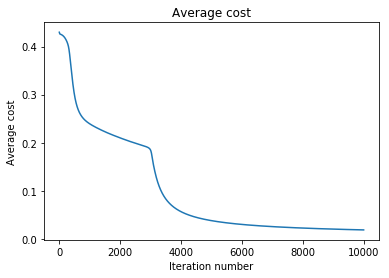

1
[0.98049971]
0
[0.0177237]
0
[0.01334434]
0
[0.03036433]
1
[0.98162985]
1
[0.97014782]


In [6]:
# 피드 포워도 코드에 신경망을 위한 역전파 일고리즘 추가

import numpy as np
import matplotlib.pyplot as plt


# 활성화 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 역전파 알고리즘 사용 시 활성화 함수의 1차 도함수가 필요
def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

# 피드포워드를 수행하는 함수
def feed_forward(x, W1, W2, b1, b2):
    
    # 입력 레이어
    a1 = x
    
    # 히든 레이어
    z2 = np.dot(W1, a1) + b1
    a2 = sigmoid(z2)
    
    # 출력 레이어
    # a3에 신경망의 출력이 저장
    z3 = np.dot(W2, a2) + b2
    a3 = sigmoid(z3)
    
    return a1, a2, a3, z2, z3

# 신경망을 구성하는 레이어의 노드 개수 지정
# 신경망은 총 3개의 레이어로 구성
# 입력 레이어 노드개수 3, 히든 레이어 3, 출력 레이어 1

node_size={
    'input_layer_size':3,
    'hidden_layer_size': 3,
    'output_layer_size': 1
}

# 학습률은 2.0 입니다.
learning_rate = 2.0

# 가중치와 편향을 무작위 값으로 초기화 생성
# 각 넘파이 배열 생성 시 아규먼트에 포함되는 레이어의 순서를 봐두면 좋다
W2 = np.random.random((node_size['output_layer_size'], node_size['hidden_layer_size']))
W1 = np.random.random((node_size['hidden_layer_size'], node_size['input_layer_size']))
b2 = np.random.random(node_size['output_layer_size'])
b1 = np.random.random(node_size['hidden_layer_size'])

# 학습 데이터 세트
# 특성 X, 라벨 Y
X = np.array([[1, 0, 0], [0, 0, 1], [1, 0, 1], [1, 1, 0], [0, 1, 0], [1, 1, 1]])
Y = np.array([1, 0, 0, 0, 1, 1, 0])

# 반복 횟수를 카운트하기 위해 사용
count = 0

# 학습 데이터 세트 전체에 대한 피드포워드와 역전파를 1000번 반복
max_iteration = 10000

# 학습 데이터 세트에 포함된 데이터의 개수
dataset_size = len(Y)

# 반복할 때마다 변하는 비용을 저장하기 위한 리스트
list_average_cost = []

# 정해놓은 max_iteration 만큼 반복
while count < max_iteration:
    
    # 역전파 알고리즘 적용 시 각 샘플별로 측정되는 값을 저장하기 위해 사용
    dW2 = np.zeros((node_size['output_layer_size'], node_size['hidden_layer_size']))
    dW1 = np.zeros((node_size['hidden_layer_size'], node_size['input_layer_size']))
    db2 = np.zeros((node_size['output_layer_size']))
    db1 = np.zeros((node_size['hidden_layer_size']))
    
    average_cost = 0
    
    # 학습 데이터 세트의 모든 샘플을 대상으로
    # 피드포워드와 역전파 알고리즘을 수행
    for x,y in zip(X, Y):
        # 피드포워드 실행
        a1, a2, a3, z2, z3 = feed_forward(x, W1, W2, b1, b2)

        # 특성과 가중치를 사용하여 피드포워드를 수행, 결과를 리턴
        # 6.13 에서 살펴볼 역전파 알고리즘에서 사용
#         a1, a2, a3, z2, z3 = feed_forward(x, W1, W2, b1, b2)

        # 역전파 알고리즘을 실행
        delta3 =-(y-a3) * sigmoid_derivative(z3)
        average_cost += np.linalg.norm((y-a3), 2) / dataset_size

        delta2 = np.dot(W2.T, delta3) * sigmoid_derivative(z2)
         
        dW2 += np.dot(delta3[:,np.newaxis], np.transpose(a2[:,np.newaxis]))/dataset_size
        db2 += delta3/dataset_size
        dW1 += np.dot(delta2[:,np.newaxis], np.transpose(a1[:,np.newaxis]))/dataset_size
        db1 += delta2/dataset_size

    # 역전파 알고리즘 실행 결과를 사용하여 신경망의 가중치와 편향을 업데이트
    W2 += -learning_rate * dW2
    b2 += -learning_rate * db2
    W1 += -learning_rate * dW1
    b1 += -learning_rate * db1
    
    # 매 반복 시 측정된 비용을 리스트에 저장
    list_average_cost.append(average_cost)
    
    # 100번 반복 시 비용 출력. 실행 시 비용이 감소하는 추이를 보는데 사용
    if count % 100 == 0:
        print('{}/{} cost: {}'.format(count, max_iteration, average_cost))
        
    count +=1
    
# 반복 횟수에 대비 비용 그래프를 그림
Figure, ax = plt.subplots(1,1)

ax.title.set_text('Average cost')
ax.plot(list_average_cost)

ax.set_ylabel('Average cost')
ax.set_xlabel('Iteration number')

plt.show()

# 간단하게 하기 위해 테스트 데이터 세트를 따로 사용하지 않고
# 학습 데이터 세트를 가지고 피드포워드 수행
# 학습 결과 네트워크 출력과 라벨 비교

for x,y in zip(X,Y):
    
    # 피드 포워드 실행
    a1, a2, a3, z2, z3 = feed_forward(x, W1, W2, b1, b2)
    print(y)
    print(a3)


[5.8 2.8 5.1 2.4]
[0. 0. 1.]
0/1000 cost: 1.3993471461355802, Prediction accuracy: 33.33333333333333%
100/1000 cost: 0.9623462607232139, Prediction accuracy: 33.33333333333333%
200/1000 cost: 0.710083434104446, Prediction accuracy: 67.5%
300/1000 cost: 0.6213210667009127, Prediction accuracy: 67.5%
400/1000 cost: 0.5742873018070713, Prediction accuracy: 67.5%
500/1000 cost: 0.5414607032547569, Prediction accuracy: 76.66666666666667%
600/1000 cost: 0.507983472053262, Prediction accuracy: 92.5%
700/1000 cost: 0.46585262675590416, Prediction accuracy: 96.66666666666667%
800/1000 cost: 0.41845381377014385, Prediction accuracy: 97.5%
900/1000 cost: 0.37366598347457597, Prediction accuracy: 97.5%


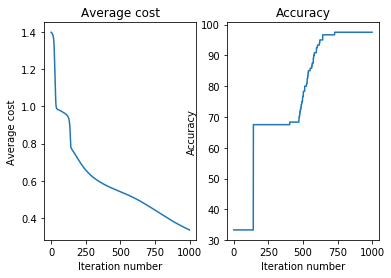

Prediction accuracy: 33.33333333333333%


In [5]:
# 붓꽃 분류 문제
# https://www.kaggle.com/uciml/iris

# 붓꽃 분류 데이터 세트는 150개 샘플, 6개의 열로 구성
# 특성으로 4개의 열, 꽃받침의 길이, 꽃받침의 너비, 꽃잎의 길이, 꽃잎의 너비 를 사용
# 라벨로 1개의 열, 품종을 사용
# 품종 이름으로 Iris-setosa, Iris-versicolor, Iris-virginica 중 하나를 값으로 가짐

import numpy as np
import matplotlib.pyplot as plt
import csv

# 숫자로 주어지는 y값을 길이 vector_length인 one-hot 벡터로 변환
def convert_y_to_one_hot_vector(y, vector_length):
    
    y_vect = np.zeros((len(y), vector_length))
    
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
        
    return y_vect

# 학습 데이터 세트 개수에서 라벨과 신경망 결과가 일치하지 않는 경우를 빼서 정확성 계산
def compute_accuracy(y_test, y_pred):
    
    size = y_test.shape[0]
    
    count = 0
    for i in range(size):
        diff = abs(np.argmax(y_test[i,:]) - np.argmax(y_pred[i,:]))
        
        if diff != 0:
            count += 1
    
    return 100 - count * 100.0 / size

# 활성화 함수로 sigmoid 사용
def sigmoid(x):
    return 1 / (1+np.exp(-x))

# 역전파 알고리즘 사용 시 활성화 함수의 1차 도함수가 필요
def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))


# 피드포워드를 수행
def feed_forward(x, W1, W2, b1, b2):
    
    # 입력 레이어
    a1 = x
    
    # 히든 레이어
    z2 = np.dot(W1, a1) + b1
    a2 = sigmoid(z2)
    
    # 출력 레이어
    # a3에 신경망의 출력이 저장
    z3 = np.dot(W2, a2) + b2
    a3 = sigmoid(z3)
    
    return a1, a2, a3, z2, z3

# 신경망을 학습시키는 함수
def train(X, Y, node_size, max_iteration, learning_rate):

    
    # 초기 가중치 값으로 무작위 값을 사용
    W2 = np.random.random((node_size['output_layer_size'], node_size['hidden_layer_size']))
    W1 = np.random.random((node_size['hidden_layer_size'], node_size['input_layer_size']))
    b2 = np.random.random((node_size['output_layer_size']))
    b1 = np.random.random((node_size['hidden_layer_size']))
    
    
    # 학습 데이터 세트에 포함된 데이터의 개수
    dataset_size = len(Y)
    # 반복할 때마다 변하는 비용을 저장하기 위한 리스트
    list_average_cost = []
    list_accuracy = []
    count = 0
    
    # 정해놓은 max_iteration 만큼 반복
    while count < max_iteration:

        # 역전파 알고리즘 적용 시 각 샘플별로 측정되는 값을 저장하기 위해 사용
        dW2 = np.zeros((node_size['output_layer_size'], node_size['hidden_layer_size']))
        dW1 = np.zeros((node_size['hidden_layer_size'], node_size['input_layer_size']))
        db2 = np.zeros((node_size['output_layer_size']))
        db1 = np.zeros((node_size['hidden_layer_size']))

        average_cost = 0
        
        # 학습 데이터 세트의 모든 샘플을 대상으로
        # 피드포워드와 역전파 알고리즘을 수행
        for x,y in zip(X, Y):
            # 피드포워드 실행
            a1, a2, a3, z2, z3 = feed_forward(x, W1, W2, b1, b2)

            # 역전파 알고리즘을 실행
            output_layer_error = y-a3
            
            delta3 =-(output_layer_error) * sigmoid_derivative(z3)
            average_cost += np.linalg.norm((output_layer_error), 2) / dataset_size

            delta2 = np.dot(W2.T, delta3) * sigmoid_derivative(z2)
            dW2 += np.dot(delta3[:,np.newaxis], np.transpose(a2[:,np.newaxis]))/dataset_size
            db2 += delta3/dataset_size
            dW1 += np.dot(delta2[:,np.newaxis], np.transpose(a1[:,np.newaxis]))/dataset_size
            db1 += delta2/dataset_size
        
        # 역전파 알고리즘 실행 결과를 사용하여 신경망의 가중치와 편향을 업데이트
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        
        # 예측을 해보고 정확도 측정
        y_pred = predict_y(X, W1, W2, b1, b2)
        accuracy = compute_accuracy(Y, y_pred)
        
        # 반복시마다 측정된 비용을 리스트 저장
        list_accuracy.append(accuracy)
        list_average_cost.append(average_cost)
        
        # 100번 반복 시 비용과 정확도 출력
        # 실행 시 비용과 정확도는 추이를 보는데 사용
        if count % 100 == 0:
            print('{}/{} cost: {}, Prediction accuracy: {}%'.format(count, max_iteration, average_cost, accuracy))

        count +=1
        
    return W1, W2, b1, b2, list_average_cost, list_accuracy

# 주어진 테스트 데이터 세트와 가중치, 편향을 사용하여 신경망의 출력을 리턴
def predict_y(X, W1, W2, b1, b2):
    
    dataset_size=X.shape[0]
    
    y = np.zeros((dataset_size, 3))
    
    for i in range(dataset_size):
        a1, a2, a3, z2, z3 = feed_forward(X[i,:], W1, W2, b1, b2)
        y[i] = a3
    return y


    

# 붓꽃 품종을 딕셔너리로 정의하여 문자열로 된 라벨을 숫자값 라벨로 변환하는데 사용
Species_Dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# 특성 (X)와 라벨(Y) 를 저장하는 데 사용
X = []
Y = []

# csv 파일을 열어서 한 줄 씩 가져옵니다
with open('Iris.csv', newline='') as file:
    reader = csv.reader(file)
    
    try:
        for i, row in enumerate(reader):
            if i > 0:
                # csv로 부터 읽어온 데이터를 특성과 라벨로 나누어 리스트에 저장
                X.append(np.array(row[1:5], dtype='float64'))
                # 앞에서 정의한 딕셔너리를 이용하여 문자열 라벨을 숫자 라벨로 변환
                Y.append(Species_Dict[row[-1]])

        # 데이터가 저장된 리스트를 넘파일 배열로 변환
        X = np.array(X)
        Y = np.array(Y)
        
    except csv.Error as e:
        sys.exit('file {}, line {}: {}'.format(filename, reader.line_num, e))
        
# {0, 1, 2} 값을 가지는 라벨을 one-hot 인코딩하여 {0 0 1, 0 1 0, 1 0 0}로 변환
Y = convert_y_to_one_hot_vector(Y, vector_length=3)

# 데이터 세트를 무작위로 섞는다
s = np.arange(Y.shape[0])
np.random.seed(0)
np.random.shuffle(s)

Y = Y[s]
X = X[s]

# 학습용 데이터 (X_train, Y_train)와 테스트용 데이터 (X_test, Y_test) 를 8:2 비율로 사용
size = len(Y)
p = int(size * 0.8)

X_train = X[0:p]
Y_train = Y[0:p]
X_test = X[p:]
Y_test = X[p:]

# 학습용 데이터를 시험 삼아 출력
print(X_train[0])
print(Y_train[0])

# 신경망을 구성하는 레이어 노드의 개수
node_size={
    'input_layer_size': 4,
    'hidden_layer_size': 8,
    'output_layer_size': 3
}

# 역전파 알고리즘에서 사용하는 학습률
learning_rate = 0.5

# 신경망을 학습시켜서 가중치와 편향을 리턴
W1, W2, b1, b2, list_avg_cost, list_accuracy = train(X_train, Y_train, node_size=node_size, max_iteration=1000, learning_rate=learning_rate)

# 비용과 정확도를 그래프로 그림
Figure, ax = plt.subplots(1, 2)

ax[0].title.set_text('Average cost')
ax[1].title.set_text('Accuracy')

ax[0].plot(list_avg_cost)
ax[1].plot(list_accuracy)

ax[0].set_ylabel('Average cost')
ax[0].set_xlabel('Iteration number')

ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Iteration number')

plt.show()

# 테스트 데이터 세트를 사용하여 예측 정확성을 테스트
y_pred = predict_y(X_test, W1, W2, b1, b2)

print('Prediction accuracy: {}%'.format(compute_accuracy(Y_test, y_pred)))